In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Data

In [413]:
data = pd.read_csv('train_hp.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [414]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [415]:
cols_na = [col for col in data.columns if(data[col].isnull().mean()>0)]
cols_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [416]:
data[cols_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [417]:
data[cols_na].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

### Funciones


In [418]:
def plotDistBoxQQ(dataset, col):
     '''
     Descripcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers 
     Input: dataset-> pandas dataframe, col->string con nombre de columna
     output: visualiuzación de plots.
     '''
     plt.figure(figsize=(20, 6))
     plt.subplot(1, 3, 1)
     sns.distplot(dataset[col], bins=30)
     plt.title("Histograma y Densisdad")
 
     plt.subplot(1, 3, 2)
     sns.boxplot(y=dataset[col])
     plt.title("Boxplot")
 
     plt.subplot(1, 3, 3)
     stats.probplot(dataset[col], dist="norm", plot=plt)
     plt.title("Q-Q Plot")

In [419]:
def snsPlotVsSalesPrice(dataset, col):
    plt.subplots(figsize=(18,6))
    sns.boxplot(x=dataset[col], y=dataset['SalePrice'])
    plt.xticks(rotation=90)

In [442]:
def getColumnTypes(dataset):
     ''' Descripcion: Esta función extrae el tipo de dominio de las columnas de un dataset.
         Entradas: Pandas Dataframe  
         Salida: Tupla con arreglo que contine nombres de las columnas. '''
     
     continuas = []
     discretas = []
     categoricas = []
     for col in dataset.columns:
          if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
               if(len(dataset[col].unique()) > 30): #criterio para discretas o continuas
                    continuas.append(col)
               else:
                    discretas.append(col)
          else:
               categoricas.append(col)
 
     return continuas, discretas, categoricas

In [443]:
def detectOutliersLimits(dataset, col):
     '''
     Descripción: Calcula los limites superiores e inferiores para detección de outliers.
     Input: dataset-> pandas dataframe, col -> string nombre de columna
     Output: tupla de floats con los limites superior e inferior
     '''
     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)
     
     return LI, LS

### Eliminamos columnas con alto porcentaje de NA's faltantes (arriba del 20%)

In [420]:
cols_na_altos = [col for col in data.columns if(data[col].isnull().mean()>0.2)]
cols_na_altos

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [421]:
dataFinal = data.drop(cols_na_altos, axis=1)
dataFinal

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ...             0         0           0   
1            Lvl    AllPub       FR2  ...             0         0           0   
2            Lvl    AllPub    Inside  ...             0         0           0   
3            Lvl    AllPub    Corner  ...           272         0           0   
4            Lvl    AllPub       FR2  ...             0         0           0   
...          ...       ...       ...  ...           ...       ...         ...   
1455         Lvl    AllPub    Inside  ...             0         0           0   
1456         Lvl    AllPub    Inside  ...             0         0           0   
1457         Lvl    AllPub    Inside  ...             0         0           0   
1458         Lvl    AllPub    Inside  ...           112         0           0   
1459         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           0       0      2    2008        WD         Normal     208500  
1           0       0      5    2007        WD         Normal     181500  
2           0       0      9    2008        WD         Normal     223500  
3           0       0      2    2006        WD        Abnorml     140000  
4           0       0     12    2008        WD         Normal     250000  
...       ...     ...    ...     ...       ...            ...        ...  
1455        0       0      8    2007        WD         Normal     175000  
1456        0       0      2    2010        WD         Normal     210000  
1457        0    2500      5    2010        WD         Normal     266500  
1458        0       0      4    2010        WD         Normal     142125  
1459        0       0      6    2008        WD         Normal     147500  

[1460 rows x 76 columns]

In [422]:
cols_na = [col for col in dataFinal.columns if(dataFinal[col].isnull().mean()>0)]
cols_na

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

### Imputacion numerica

In [423]:
dataFinal['LotFrontage'] = np.round(dataFinal['LotFrontage'].fillna(dataFinal['LotFrontage'].mean()))
dataFinal['MasVnrArea'] = np.round(dataFinal['MasVnrArea'].fillna(dataFinal['MasVnrArea'].mean()))
dataFinal['GarageYrBlt'] = np.round(dataFinal['GarageYrBlt'].fillna(dataFinal['GarageYrBlt'].mean()))

In [424]:
cols_na = [col for col in dataFinal.columns if(dataFinal[col].isnull().mean()>0)]
cols_na

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [425]:
temp = pd.concat([
    data['LotFrontage'], dataFinal['LotFrontage'],
    data['MasVnrArea'], dataFinal['MasVnrArea'],
    data['GarageYrBlt'], dataFinal['GarageYrBlt']
], axis=1)

temp.sample(n=10)

LotFrontage  LotFrontage  MasVnrArea  MasVnrArea  GarageYrBlt  \
795          70.0         70.0       130.0       130.0       1980.0   
302         118.0        118.0       150.0       150.0       2001.0   
1406         70.0         70.0         0.0         0.0       1988.0   
837          21.0         21.0       158.0       158.0       1973.0   
5            85.0         85.0         0.0         0.0       1993.0   
1305        108.0        108.0       300.0       300.0       2006.0   
1279         60.0         60.0         0.0         0.0       1980.0   
1381          NaN         70.0         0.0         0.0       1970.0   
885          50.0         50.0        60.0        60.0       1999.0   
226          82.0         82.0       290.0       290.0       1995.0   

      GarageYrBlt  
795        1980.0  
302        2001.0  
1406       1988.0  
837        1973.0  
5          1993.0  
1305       2006.0  
1279       1980.0  
1381       1970.0  
885        1999.0  
226        1995.0

C:\Users\Anthony\AppData\Local\Temp\ipykernel_9408\3224949875.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\Anthony\AppData\Local\Temp\ipykernel_9408\3224949875.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\Anthony\AppDa

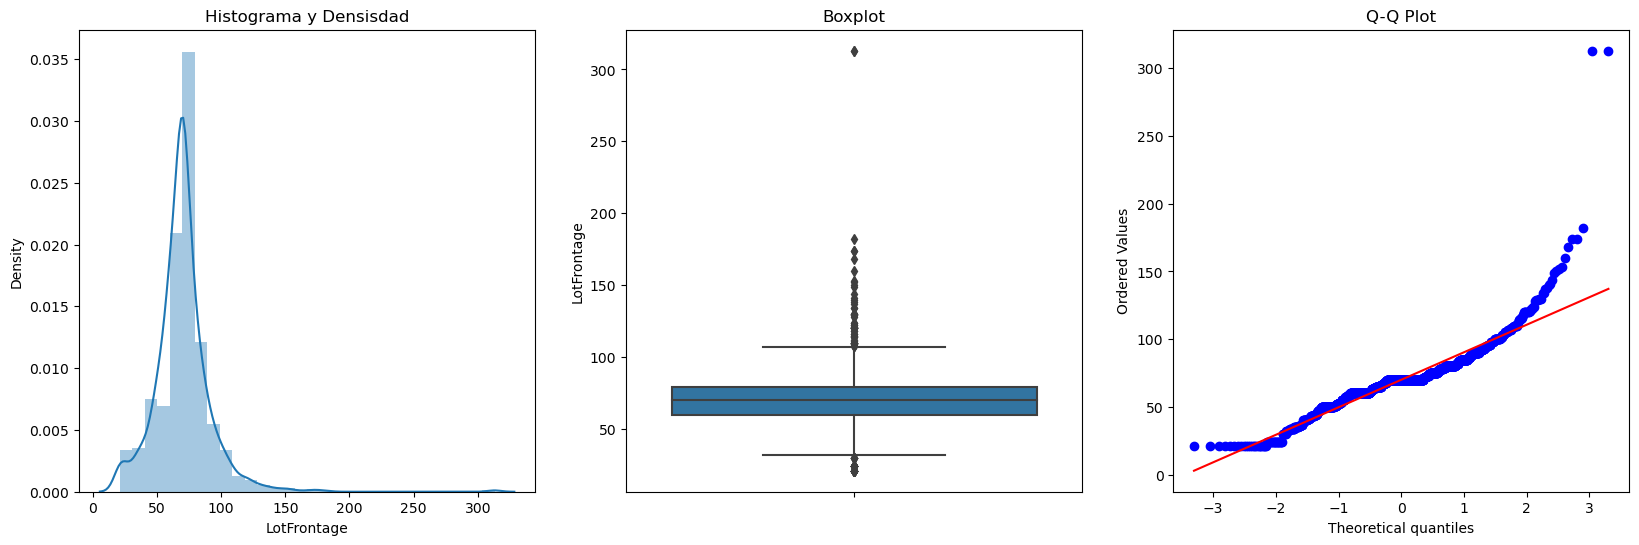

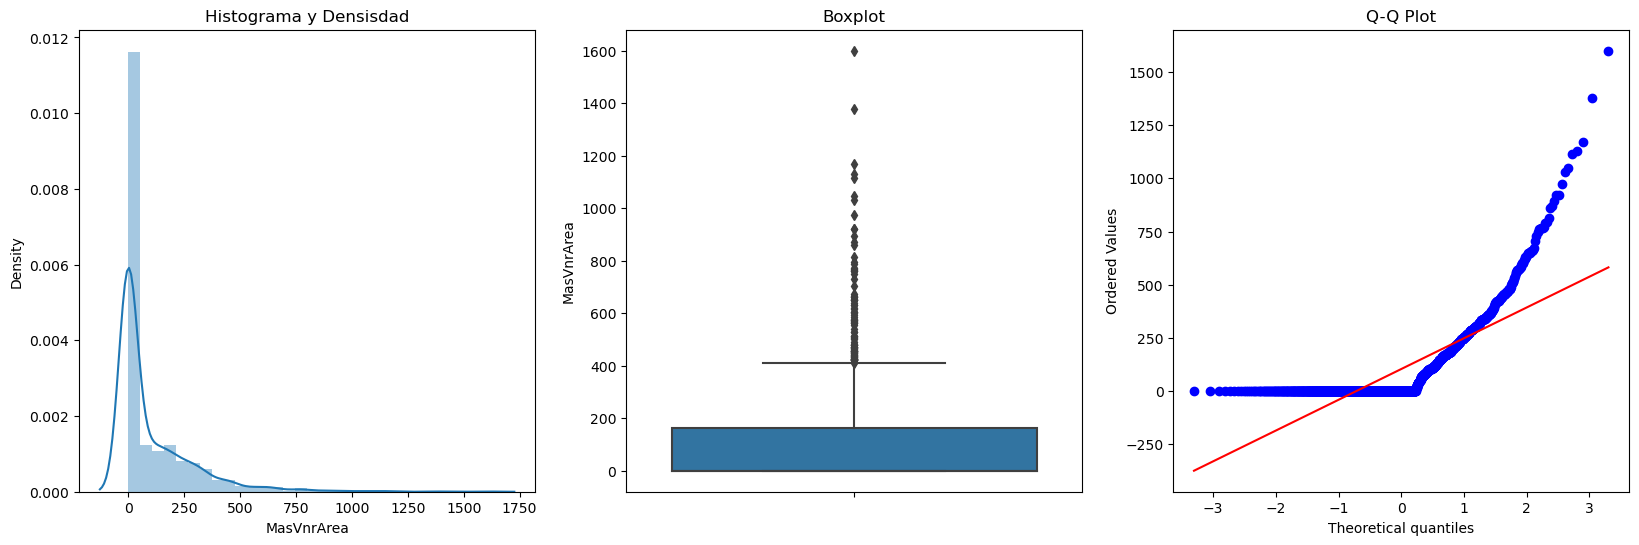

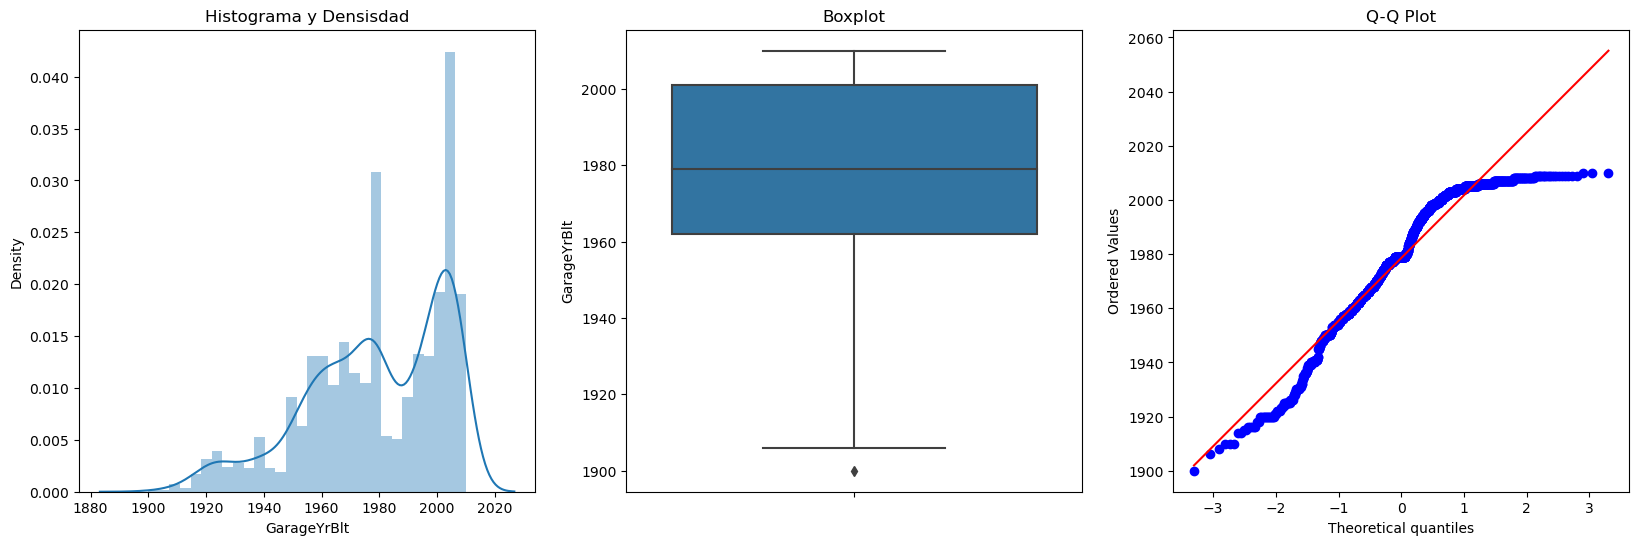

In [426]:
for cols in dataFinal[['LotFrontage','MasVnrArea','GarageYrBlt']]:
    plotDistBoxQQ(dataFinal, cols)

### Imputacion categorica

In [427]:
cols_na

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

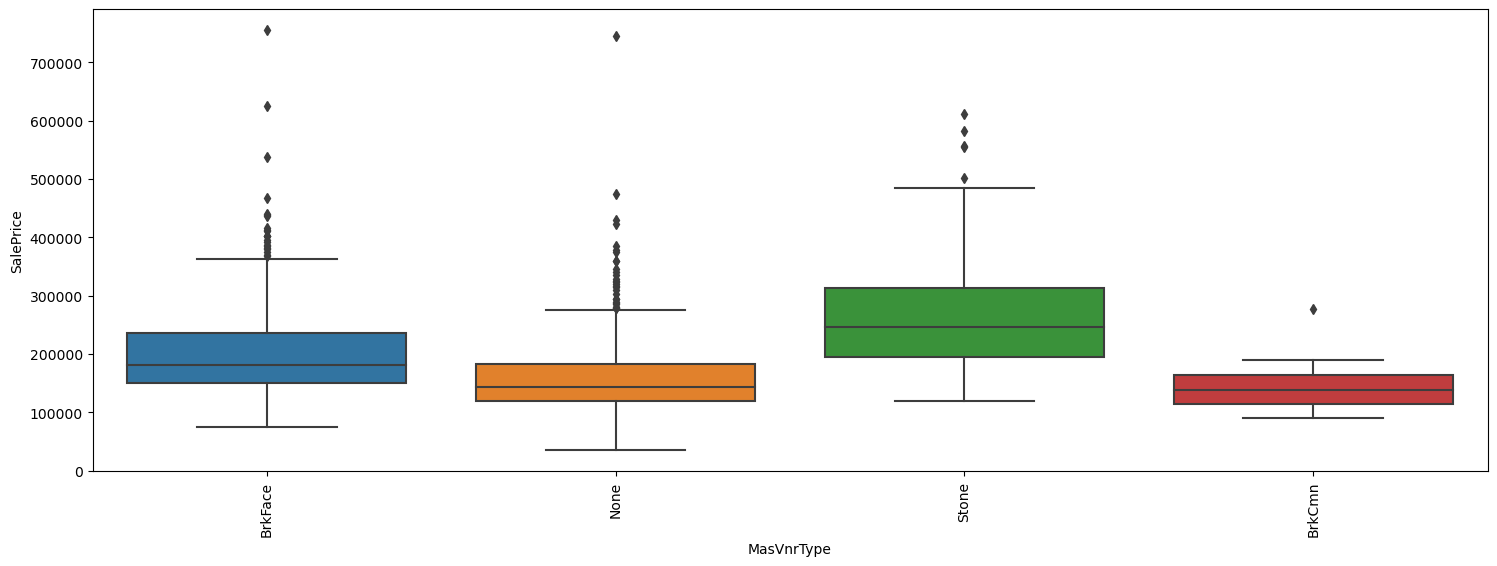

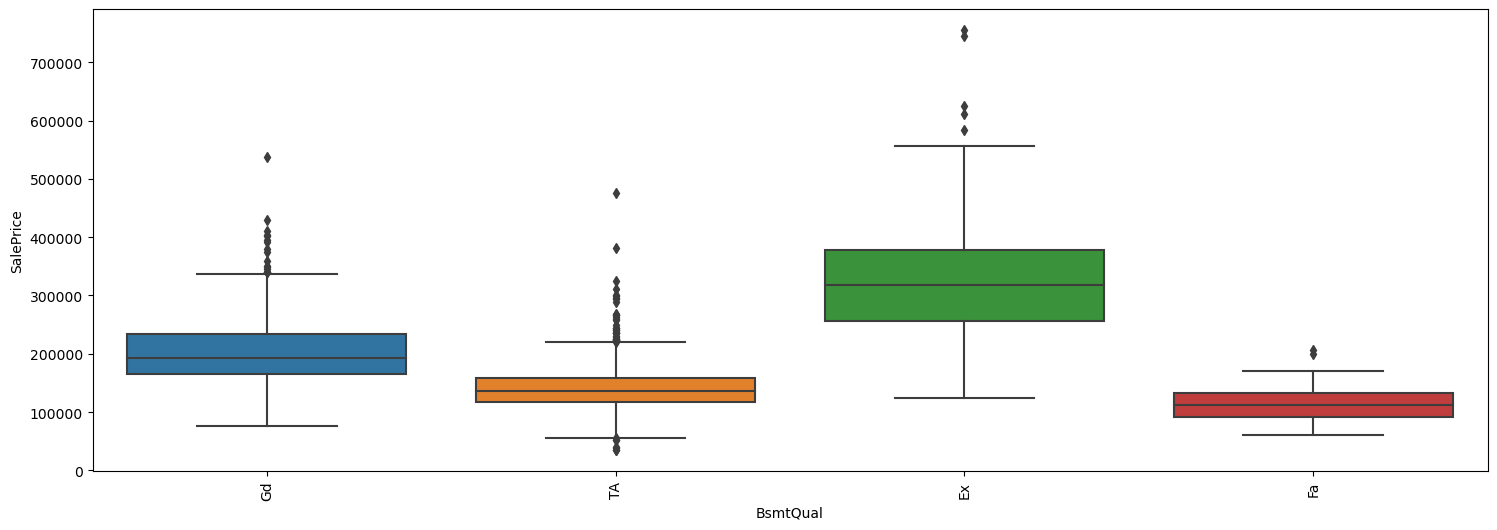

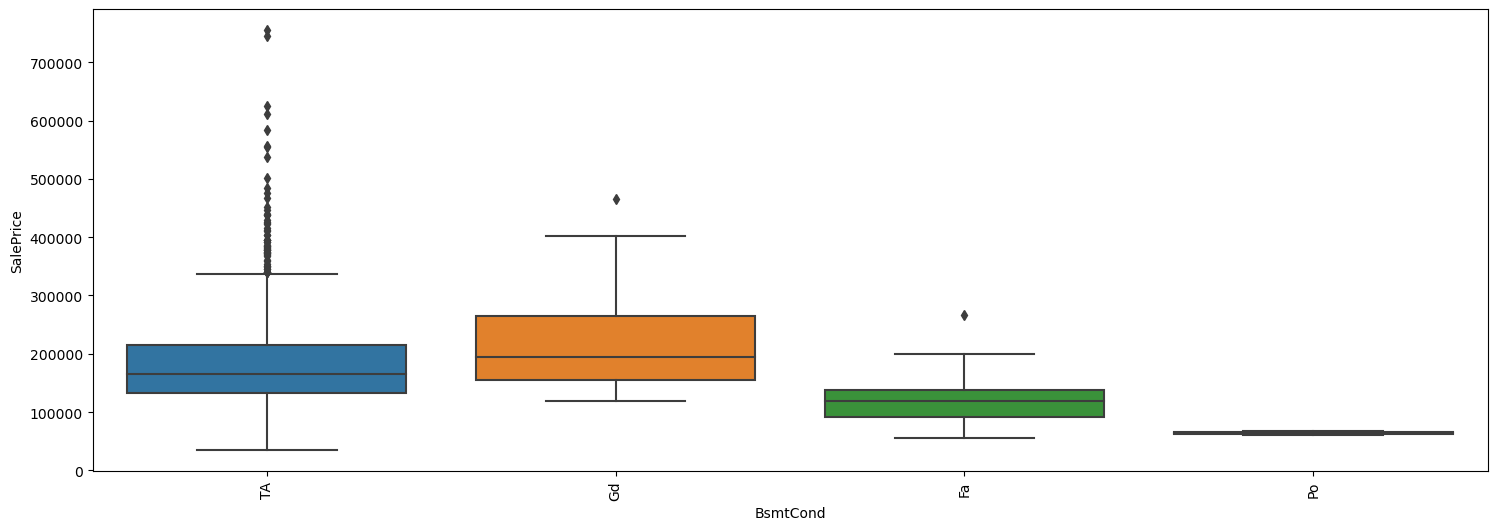

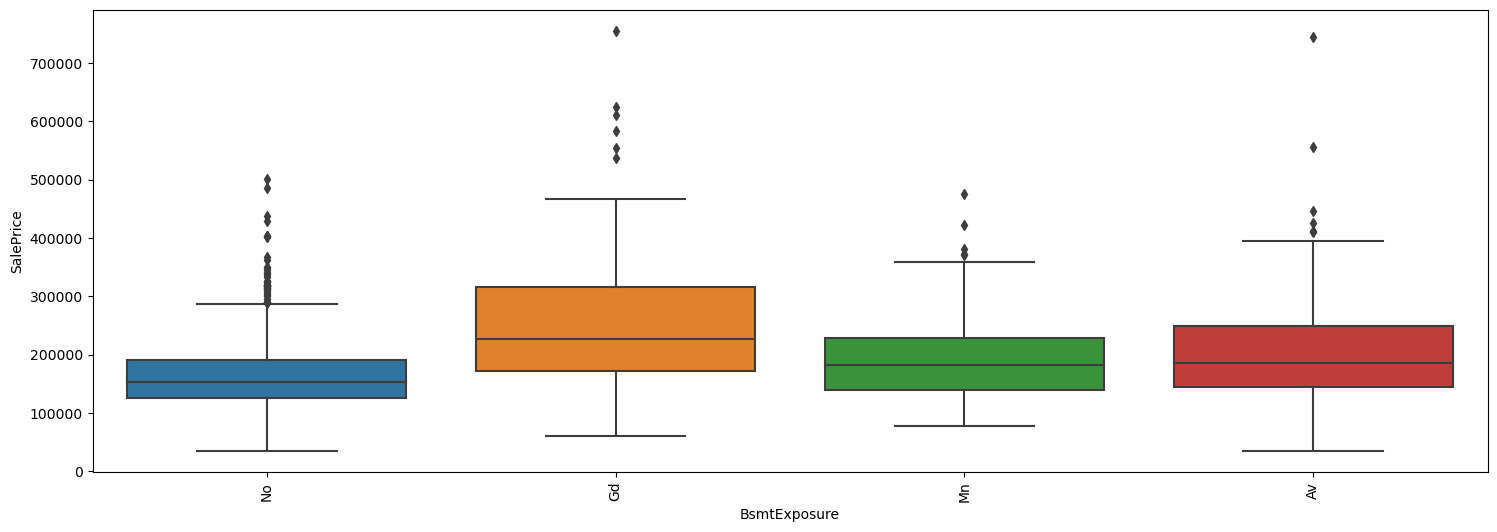

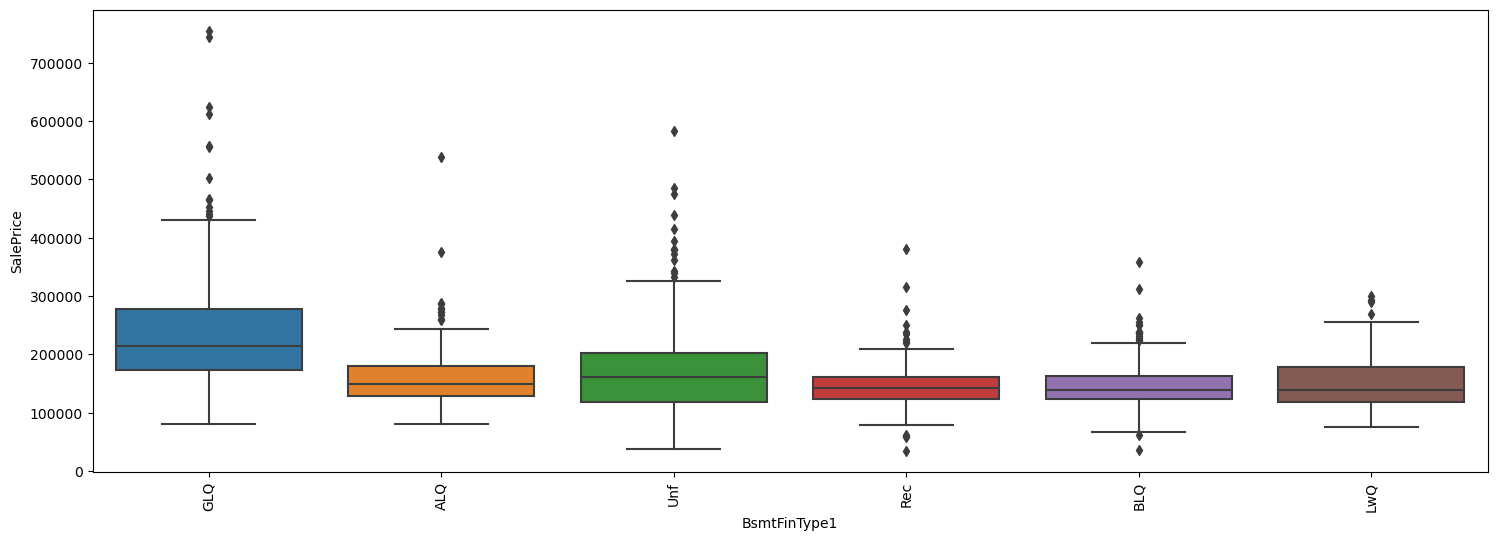

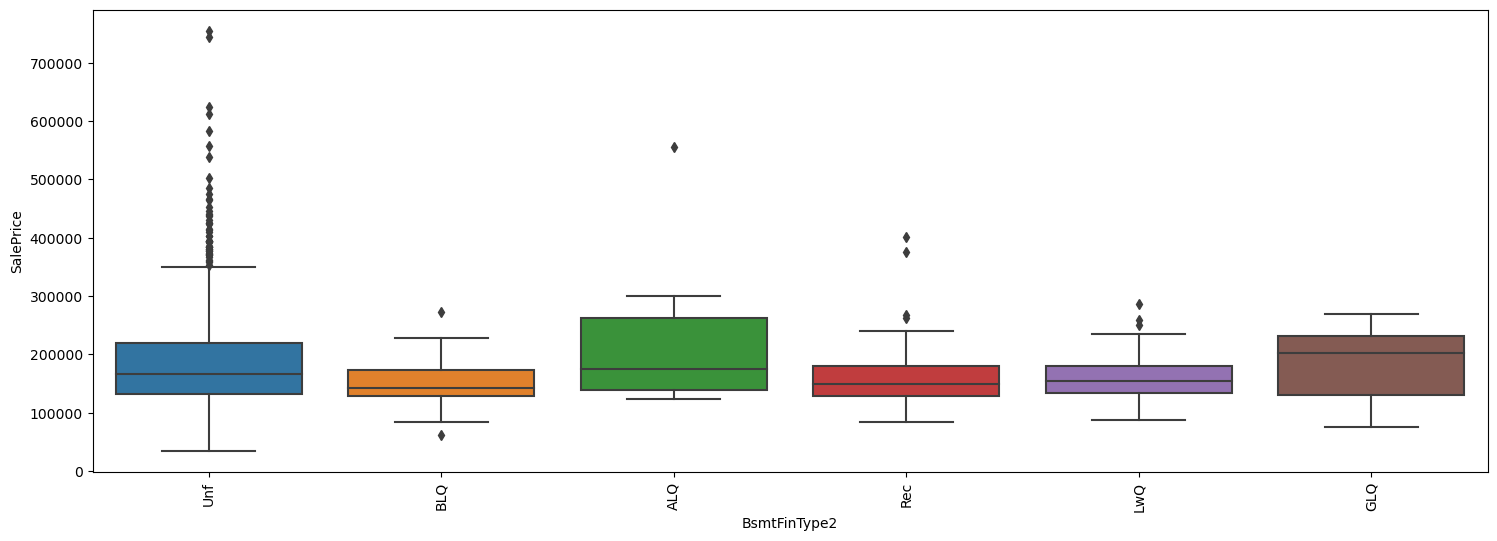

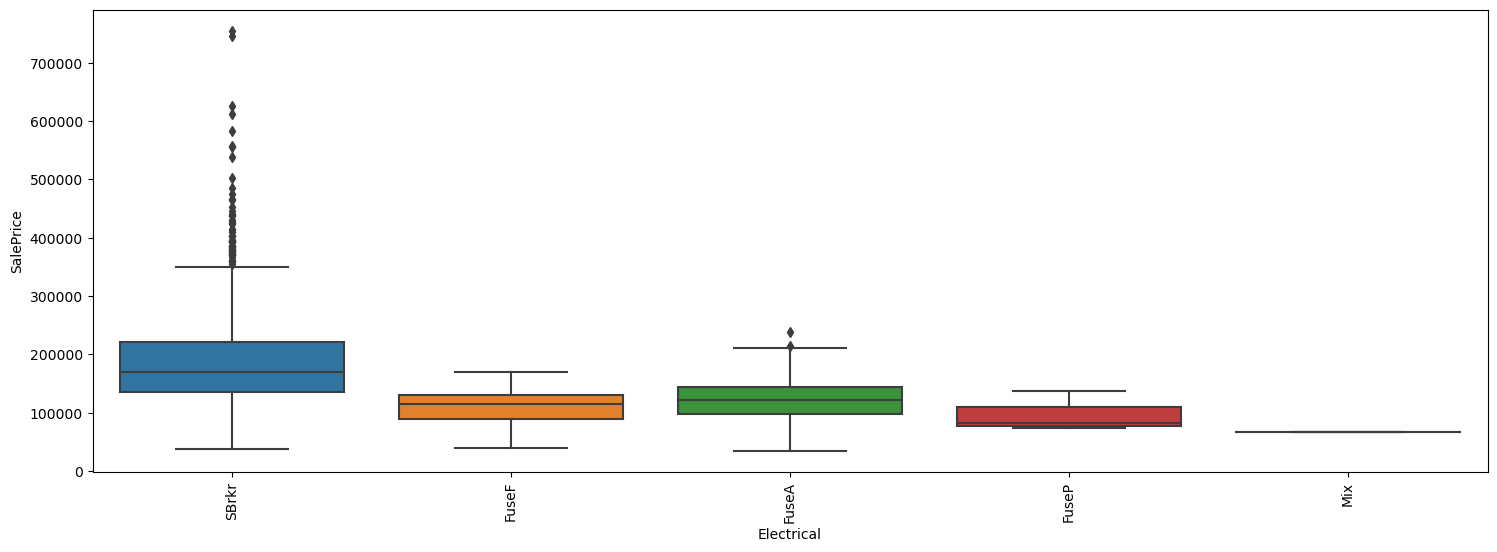

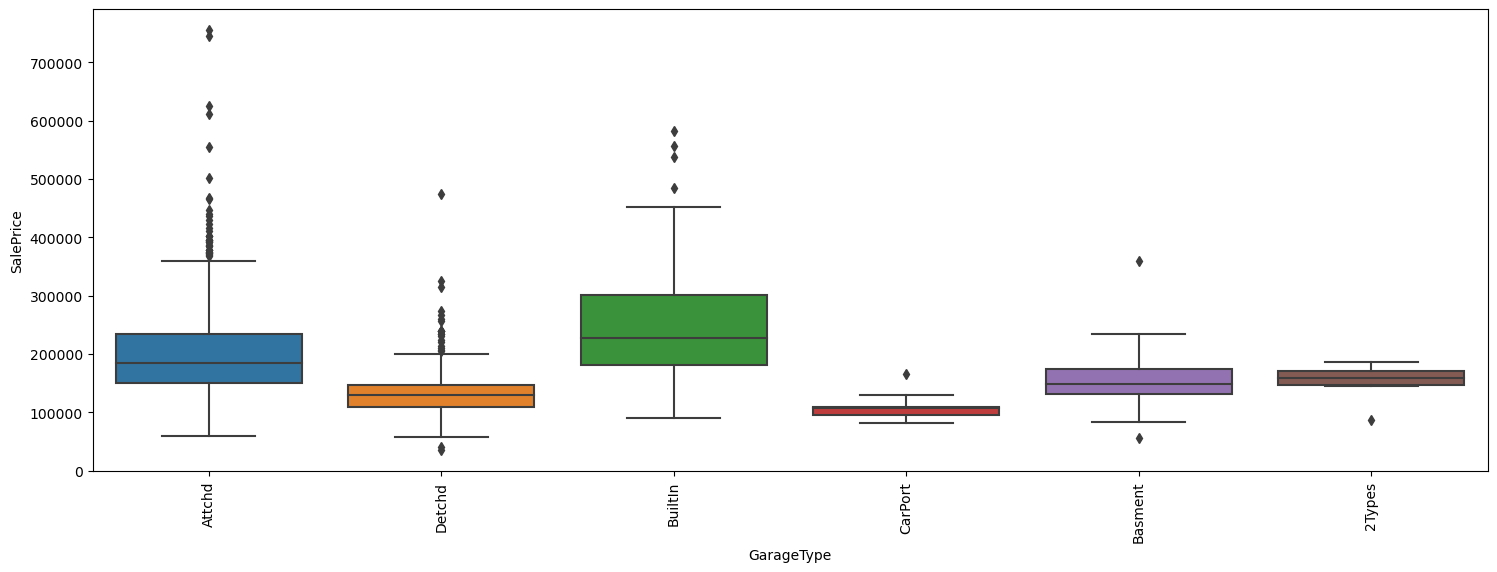

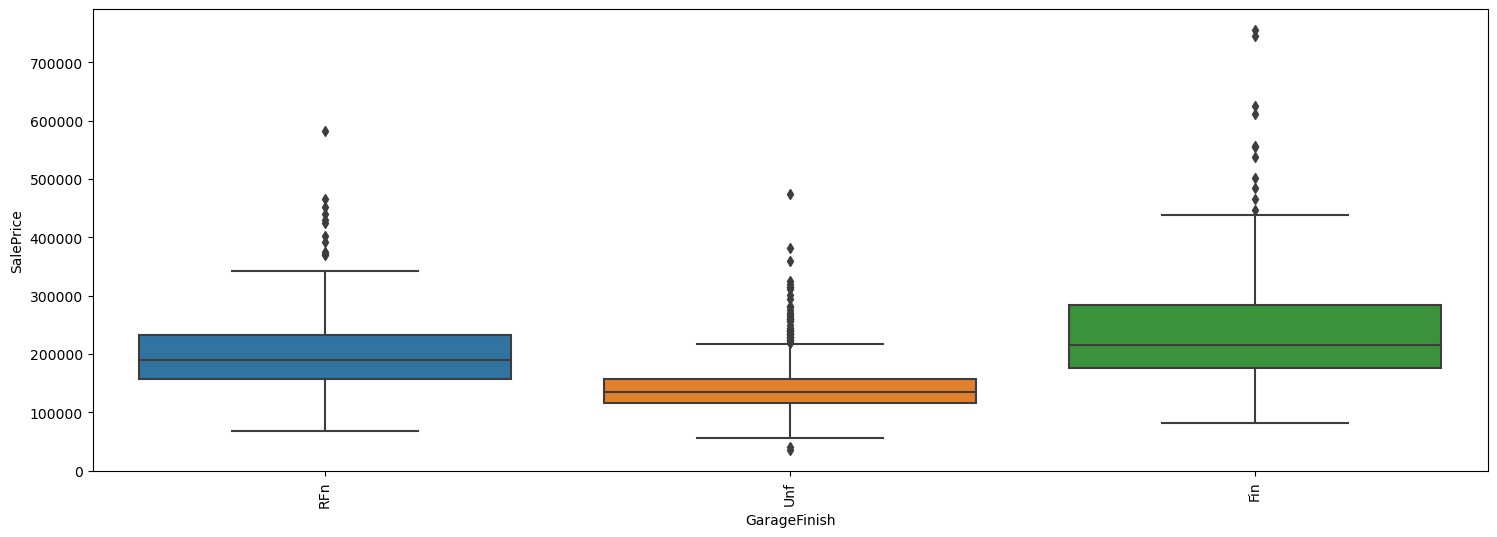

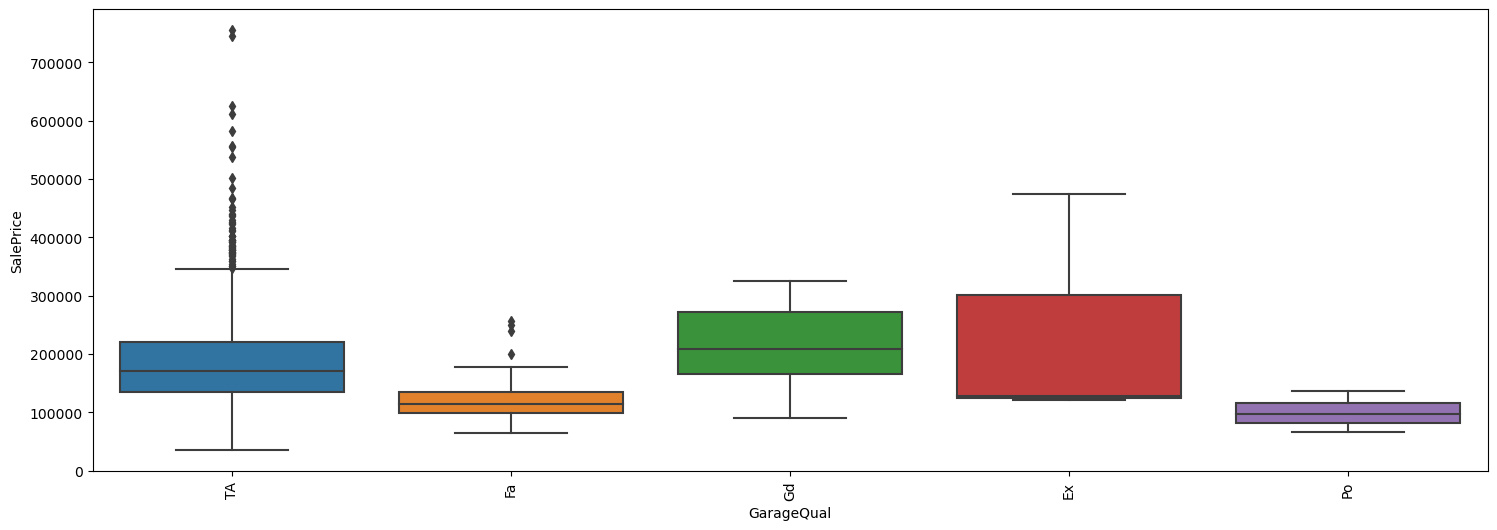

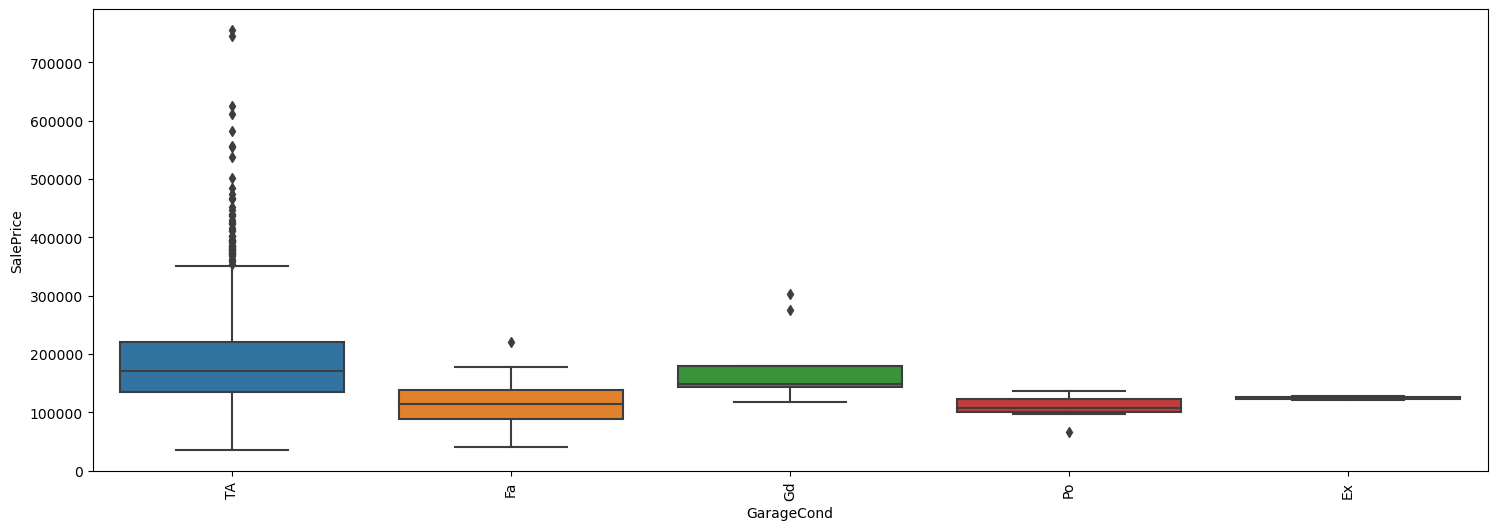

In [428]:
for cols in dataFinal[cols_na]:
    snsPlotVsSalesPrice(dataFinal, cols)

In [429]:
for cols in dataFinal[cols_na]:
    tempList = dataFinal[cols].unique()
    print(cols,tempList)

MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


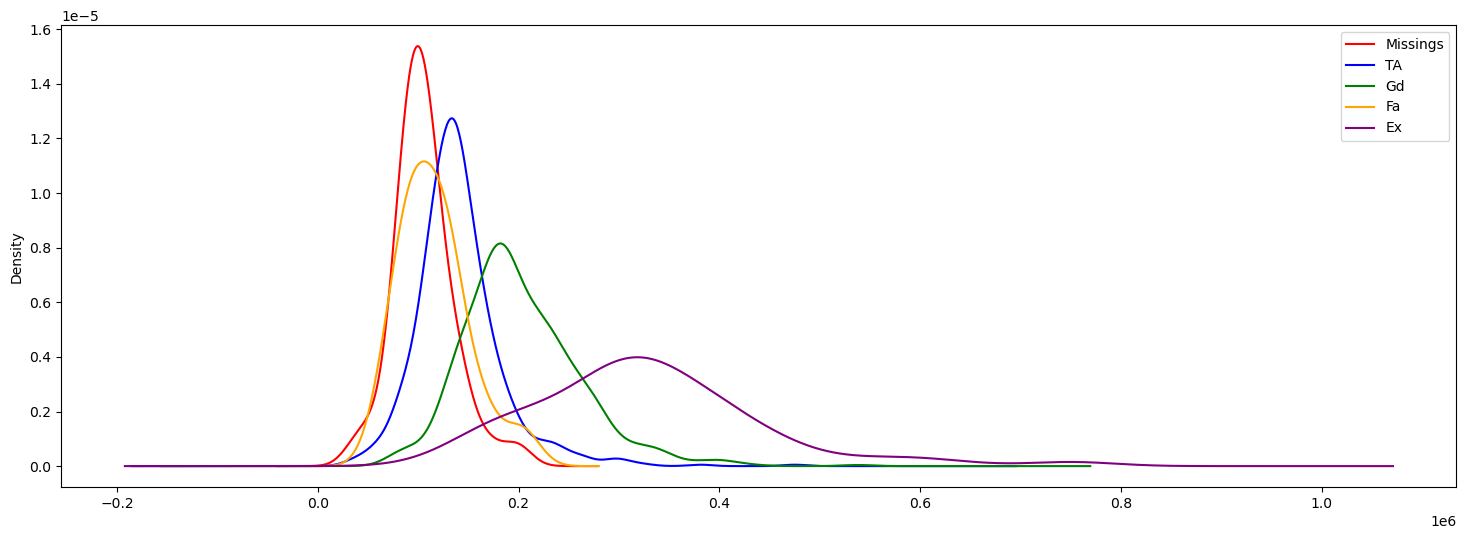

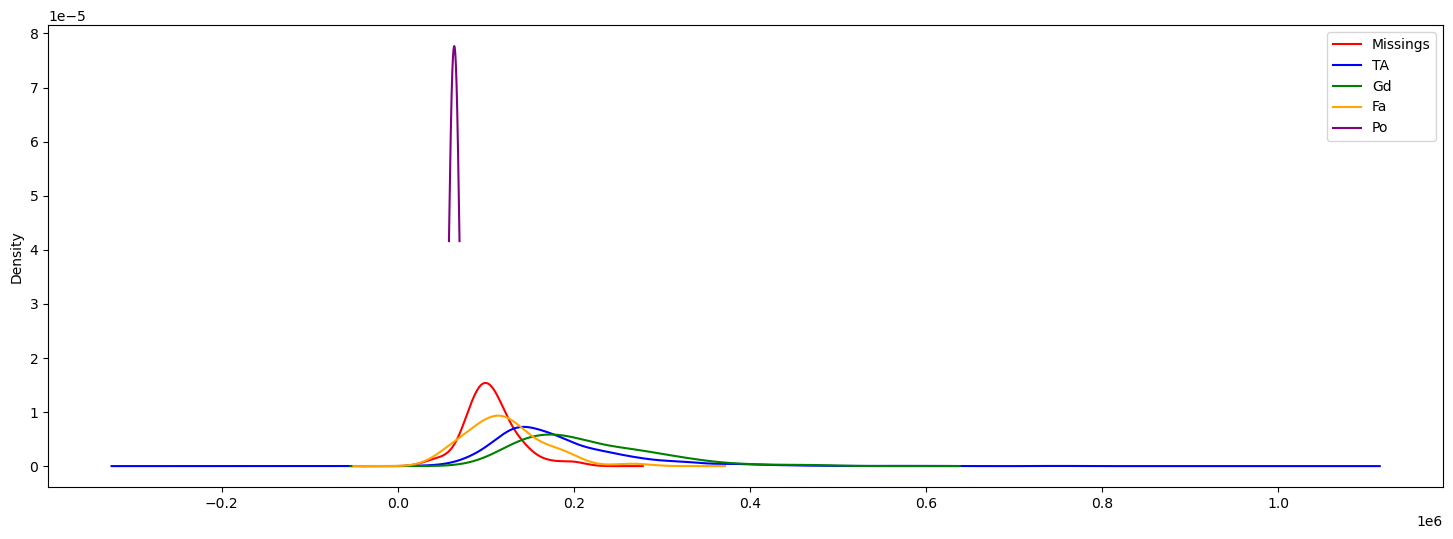

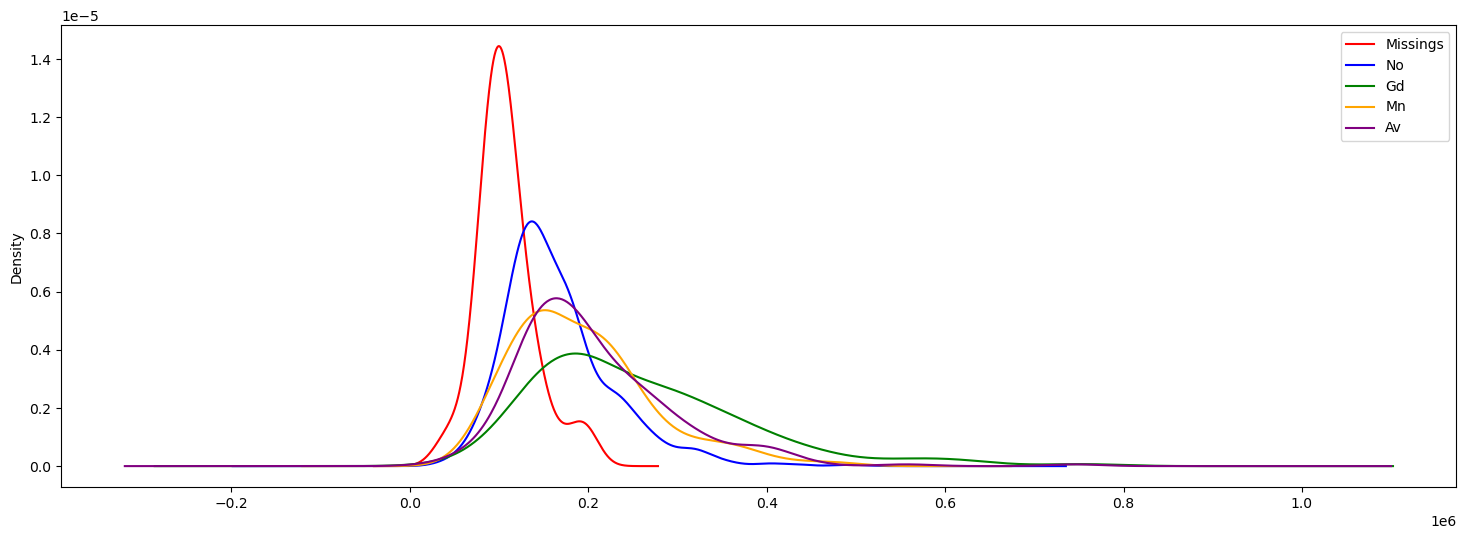

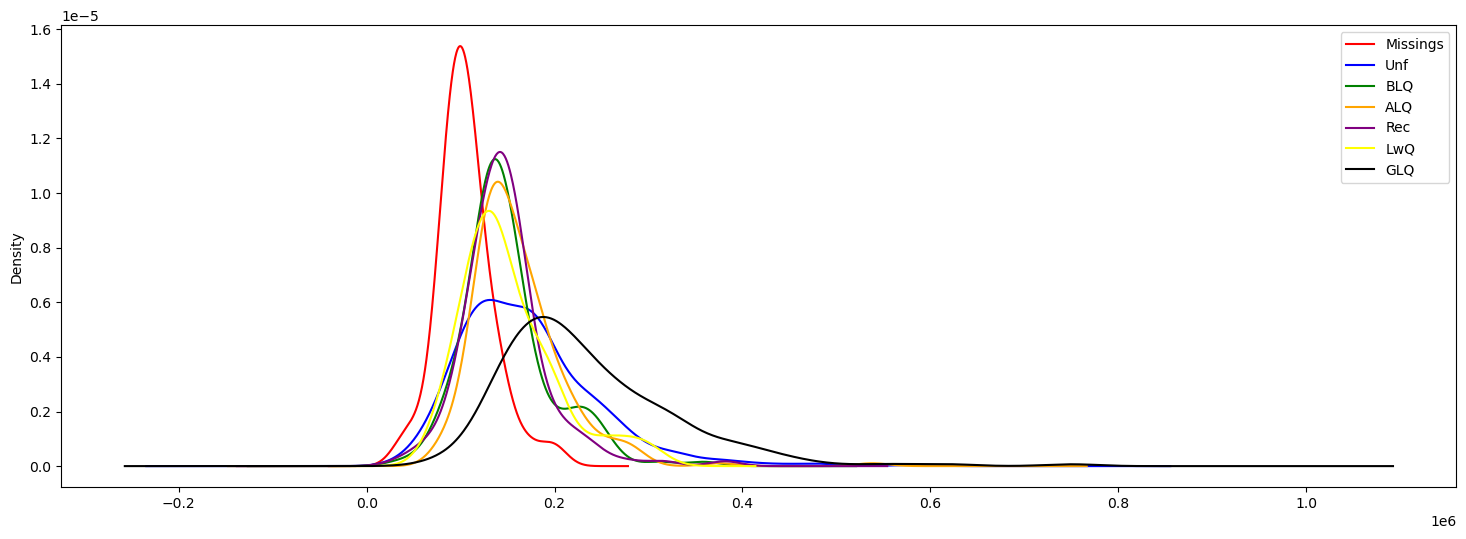

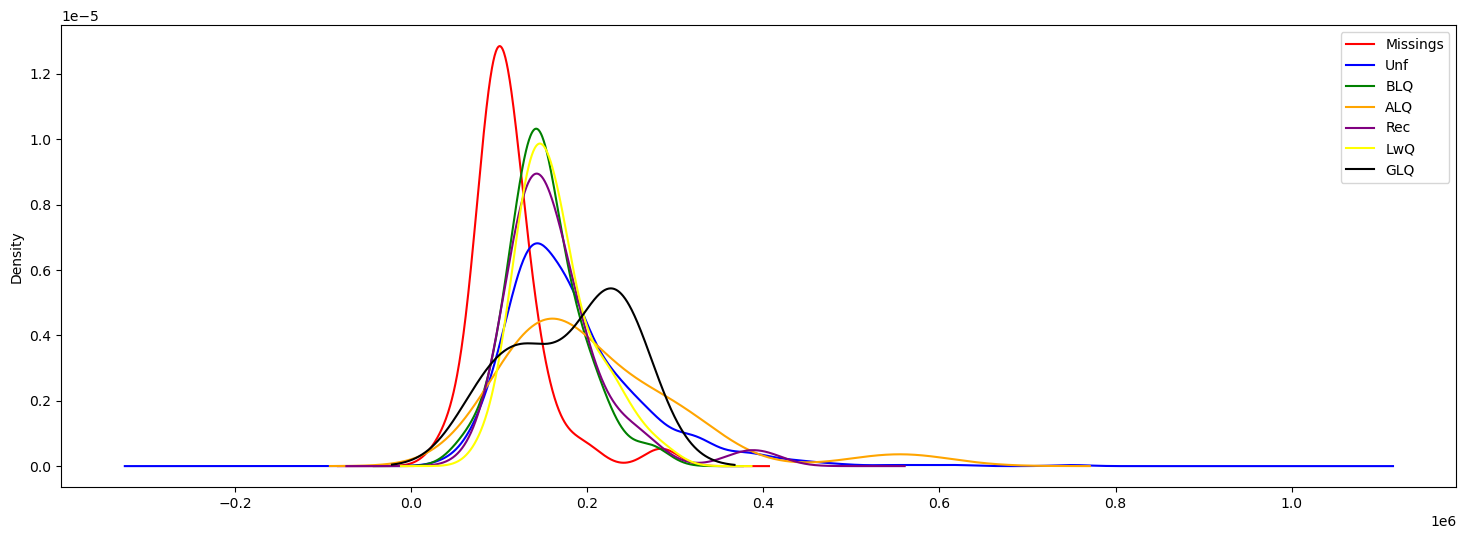

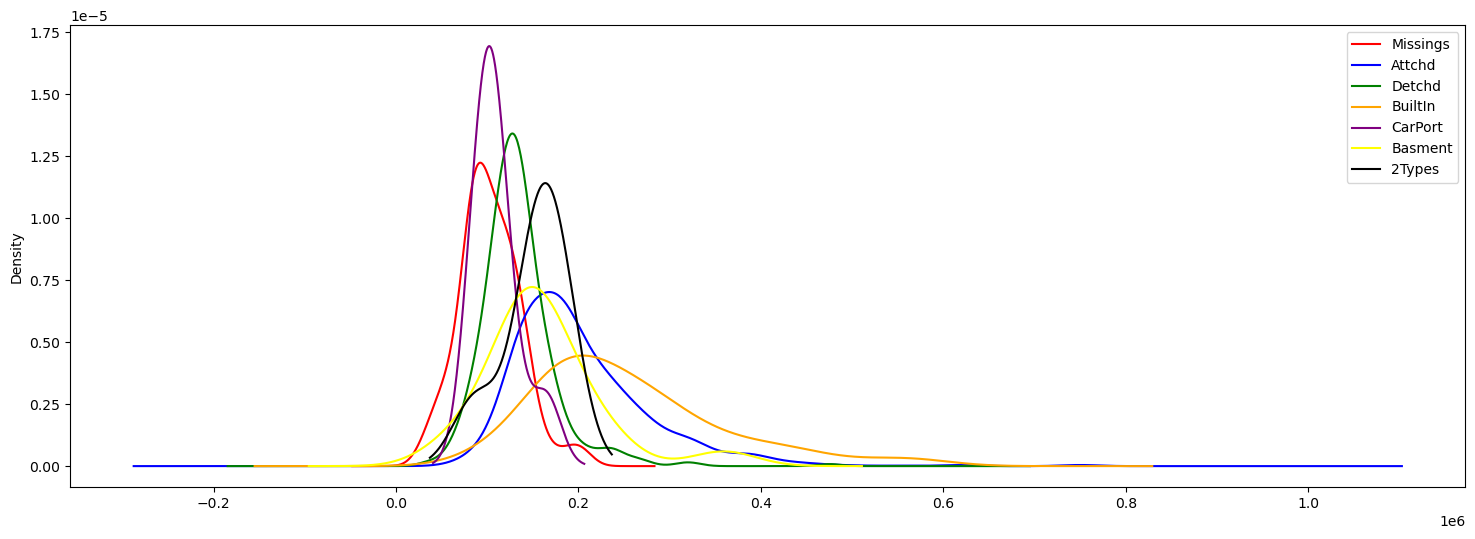

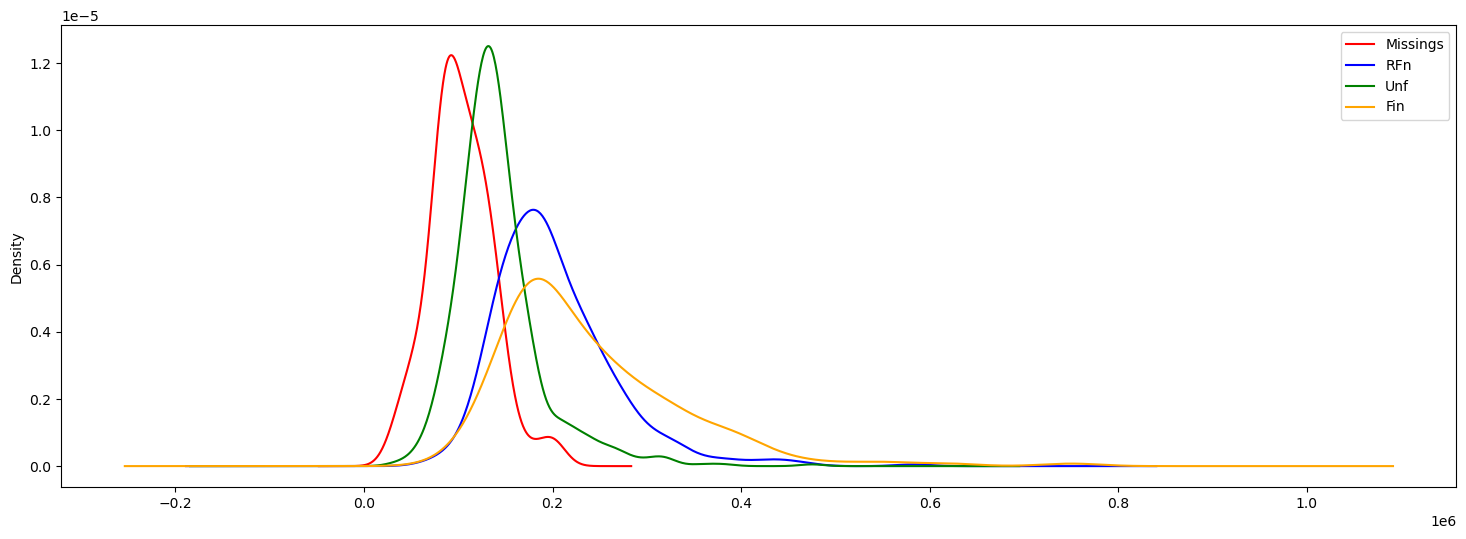

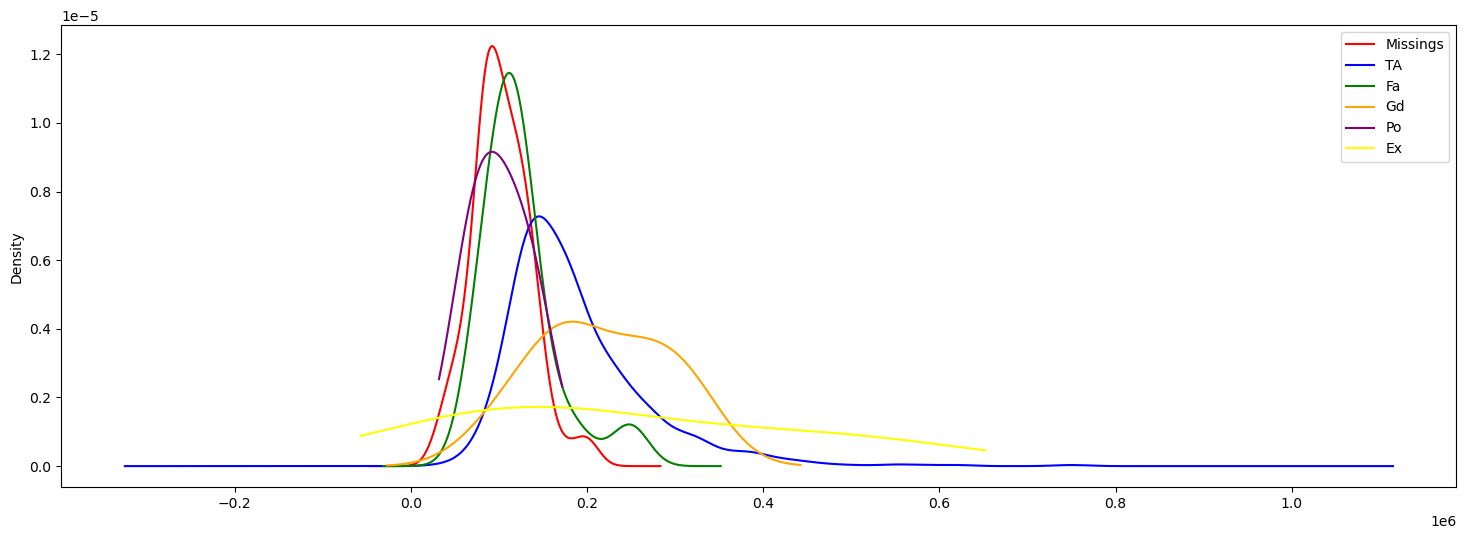

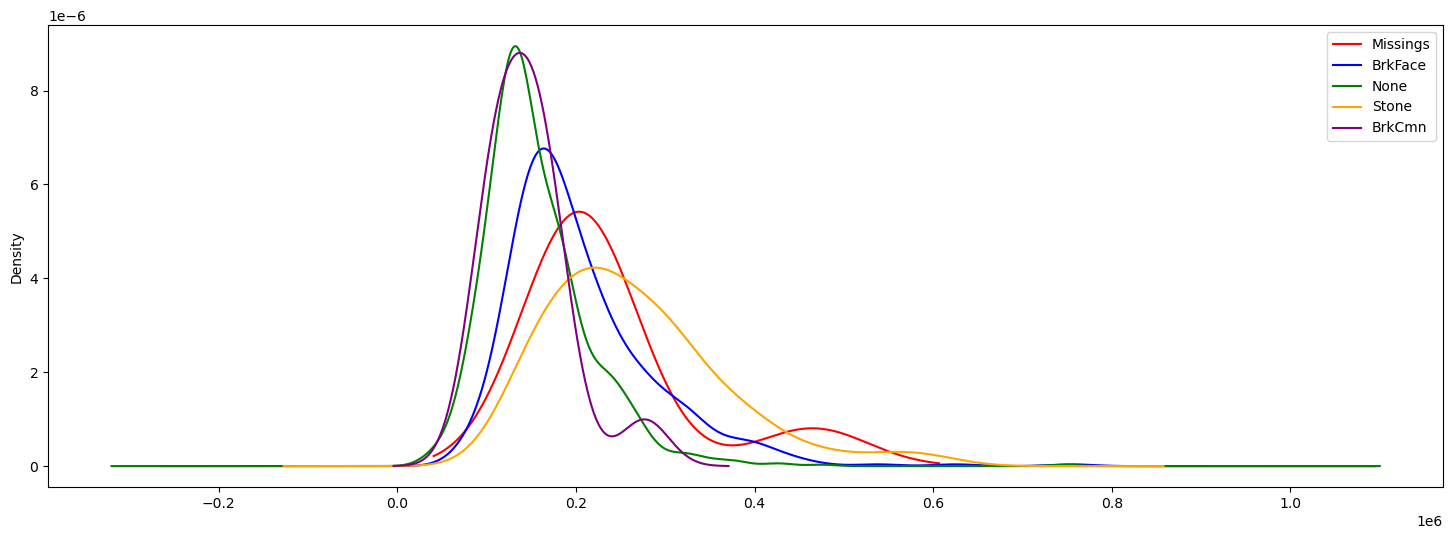

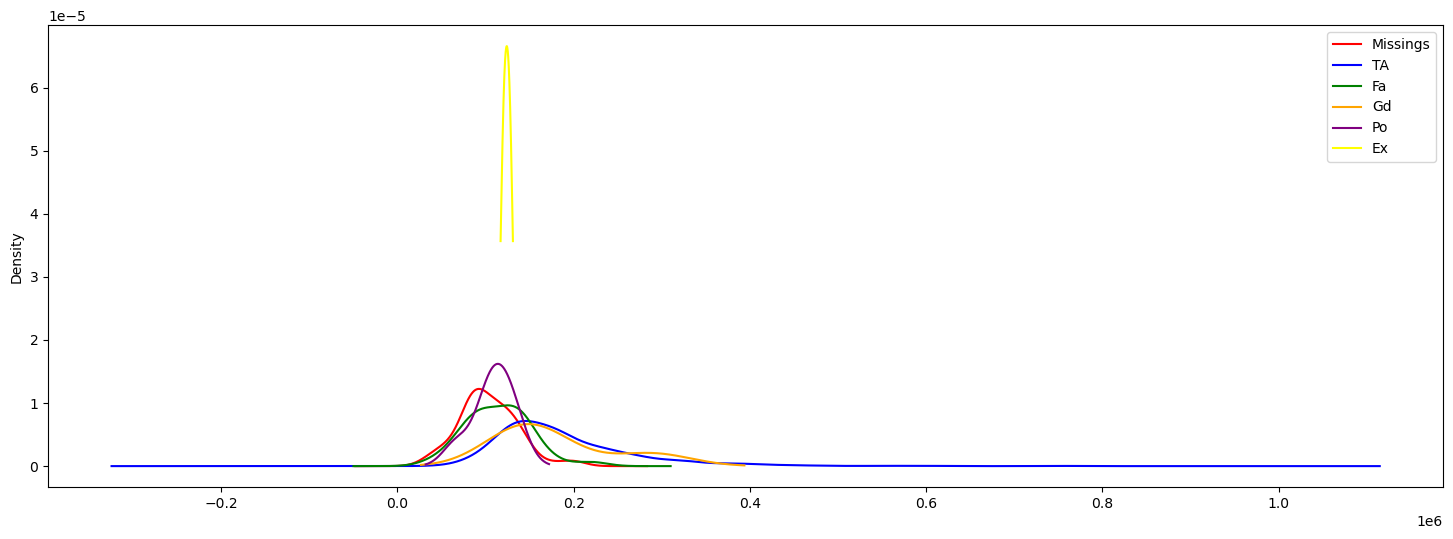

In [430]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'BsmtQual'
dataFinal[dataFinal[col].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataFinal[dataFinal[col] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataFinal[dataFinal[col] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataFinal[dataFinal[col] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
dataFinal[dataFinal[col] == 'Ex']['SalePrice'].plot(kind="kde", color="purple", label="Ex")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'BsmtCond'
dataFinal[dataFinal[col].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataFinal[dataFinal[col] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataFinal[dataFinal[col] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataFinal[dataFinal[col] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
dataFinal[dataFinal[col] == 'Po']['SalePrice'].plot(kind="kde", color="purple", label="Po")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'BsmtExposure'
dataFinal[dataFinal[col].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataFinal[dataFinal[col] == 'No']['SalePrice'].plot(kind="kde", color="blue", label="No")
dataFinal[dataFinal[col] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataFinal[dataFinal[col] == 'Mn']['SalePrice'].plot(kind="kde", color="orange", label="Mn")
dataFinal[dataFinal[col] == 'Av']['SalePrice'].plot(kind="kde", color="purple", label="Av")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'BsmtFinType1'
dataFinal[dataFinal[col].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataFinal[dataFinal[col] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataFinal[dataFinal[col] == 'BLQ']['SalePrice'].plot(kind="kde", color="green", label="BLQ")
dataFinal[dataFinal[col] == 'ALQ']['SalePrice'].plot(kind="kde", color="orange", label="ALQ")
dataFinal[dataFinal[col] == 'Rec']['SalePrice'].plot(kind="kde", color="purple", label="Rec")
dataFinal[dataFinal[col] == 'LwQ']['SalePrice'].plot(kind="kde", color="yellow", label="LwQ")
dataFinal[dataFinal[col] == 'GLQ']['SalePrice'].plot(kind="kde", color="black", label="GLQ")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'BsmtFinType2'
dataFinal[dataFinal[col].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataFinal[dataFinal[col] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataFinal[dataFinal[col] == 'BLQ']['SalePrice'].plot(kind="kde", color="green", label="BLQ")
dataFinal[dataFinal[col] == 'ALQ']['SalePrice'].plot(kind="kde", color="orange", label="ALQ")
dataFinal[dataFinal[col] == 'Rec']['SalePrice'].plot(kind="kde", color="purple", label="Rec")
dataFinal[dataFinal[col] == 'LwQ']['SalePrice'].plot(kind="kde", color="yellow", label="LwQ")
dataFinal[dataFinal[col] == 'GLQ']['SalePrice'].plot(kind="kde", color="black", label="GLQ")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'GarageType'
dataFinal[dataFinal[col].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataFinal[dataFinal[col] == 'Attchd']['SalePrice'].plot(kind="kde", color="blue", label="Attchd")
dataFinal[dataFinal[col] == 'Detchd']['SalePrice'].plot(kind="kde", color="green", label="Detchd")
dataFinal[dataFinal[col] == 'BuiltIn']['SalePrice'].plot(kind="kde", color="orange", label="BuiltIn")
dataFinal[dataFinal[col] == 'CarPort']['SalePrice'].plot(kind="kde", color="purple", label="CarPort")
dataFinal[dataFinal[col] == 'Basment']['SalePrice'].plot(kind="kde", color="yellow", label="Basment")
dataFinal[dataFinal[col] == '2Types']['SalePrice'].plot(kind="kde", color="black", label="2Types")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'GarageFinish'
dataFinal[dataFinal[col].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataFinal[dataFinal[col] == 'RFn']['SalePrice'].plot(kind="kde", color="blue", label="RFn")
dataFinal[dataFinal[col] == 'Unf']['SalePrice'].plot(kind="kde", color="green", label="Unf")
dataFinal[dataFinal[col] == 'Fin']['SalePrice'].plot(kind="kde", color="orange", label="Fin")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'GarageQual'
dataFinal[dataFinal[col].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataFinal[dataFinal[col] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataFinal[dataFinal[col] == 'Fa']['SalePrice'].plot(kind="kde", color="green", label="Fa")
dataFinal[dataFinal[col] == 'Gd']['SalePrice'].plot(kind="kde", color="orange", label="Gd")
dataFinal[dataFinal[col] == 'Po']['SalePrice'].plot(kind="kde", color="purple", label="Po")
dataFinal[dataFinal[col] == 'Ex']['SalePrice'].plot(kind="kde", color="yellow", label="Ex")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'MasVnrType'
dataFinal[dataFinal[col].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataFinal[dataFinal[col] == 'BrkFace']['SalePrice'].plot(kind="kde", color="blue", label="BrkFace")
dataFinal[dataFinal[col] == 'None']['SalePrice'].plot(kind="kde", color="green", label="None")
dataFinal[dataFinal[col] == 'Stone']['SalePrice'].plot(kind="kde", color="orange", label="Stone")
dataFinal[dataFinal[col] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="purple", label="BrkCmn")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'GarageCond'
dataFinal[dataFinal[col].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataFinal[dataFinal[col] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataFinal[dataFinal[col] == 'Fa']['SalePrice'].plot(kind="kde", color="green", label="Fa")
dataFinal[dataFinal[col] == 'Gd']['SalePrice'].plot(kind="kde", color="orange", label="Gd")
dataFinal[dataFinal[col] == 'Po']['SalePrice'].plot(kind="kde", color="purple", label="Po")
dataFinal[dataFinal[col] == 'Ex']['SalePrice'].plot(kind="kde", color="yellow", label="Ex")
ax.legend()
plt.show()

In [431]:
dataFinal['MasVnrType'].fillna('Stone', inplace=True)
dataFinal['BsmtQual'].fillna('Fa', inplace=True)
dataFinal['BsmtCond'].fillna('Fa', inplace=True)
dataFinal['BsmtExposure'].fillna('No', inplace=True)
dataFinal['BsmtFinType1'].fillna('Rec', inplace=True)
dataFinal['BsmtFinType2'].fillna('BLQ', inplace=True)
dataFinal['GarageType'].fillna('CarPort', inplace=True)
dataFinal['GarageFinish'].fillna('Unf', inplace=True)
dataFinal['GarageQual'].fillna('Po', inplace=True)
dataFinal['GarageCond'].fillna('Fa', inplace=True)

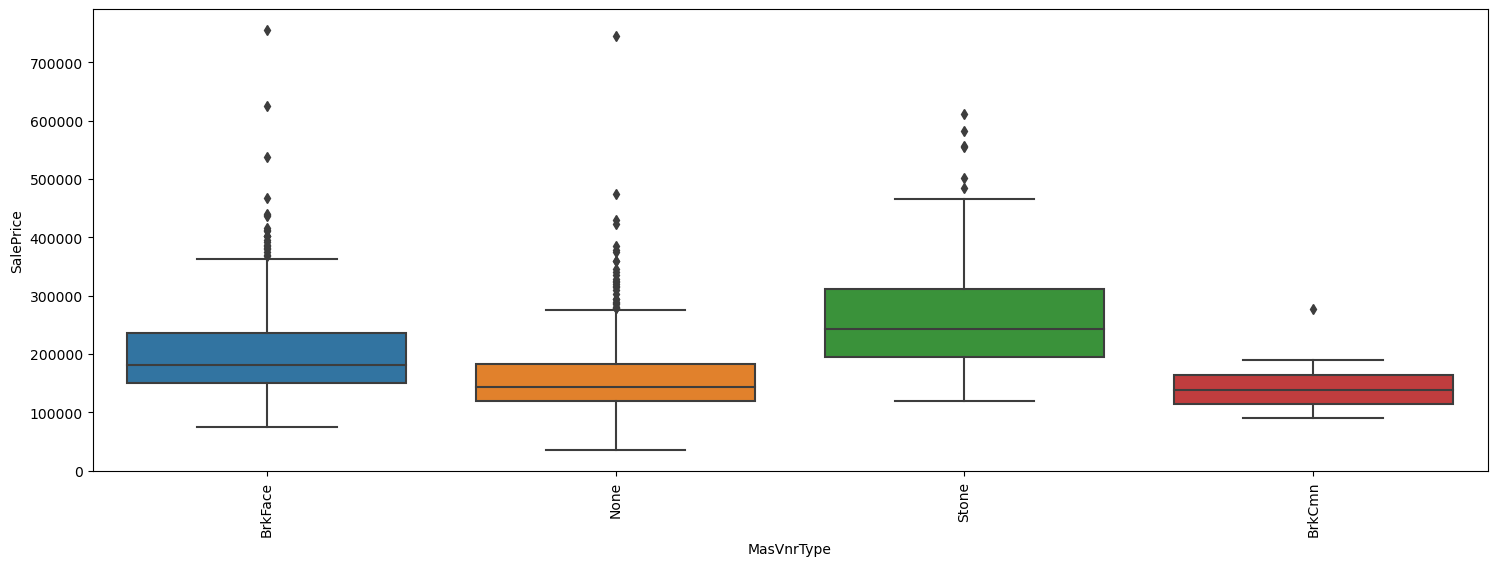

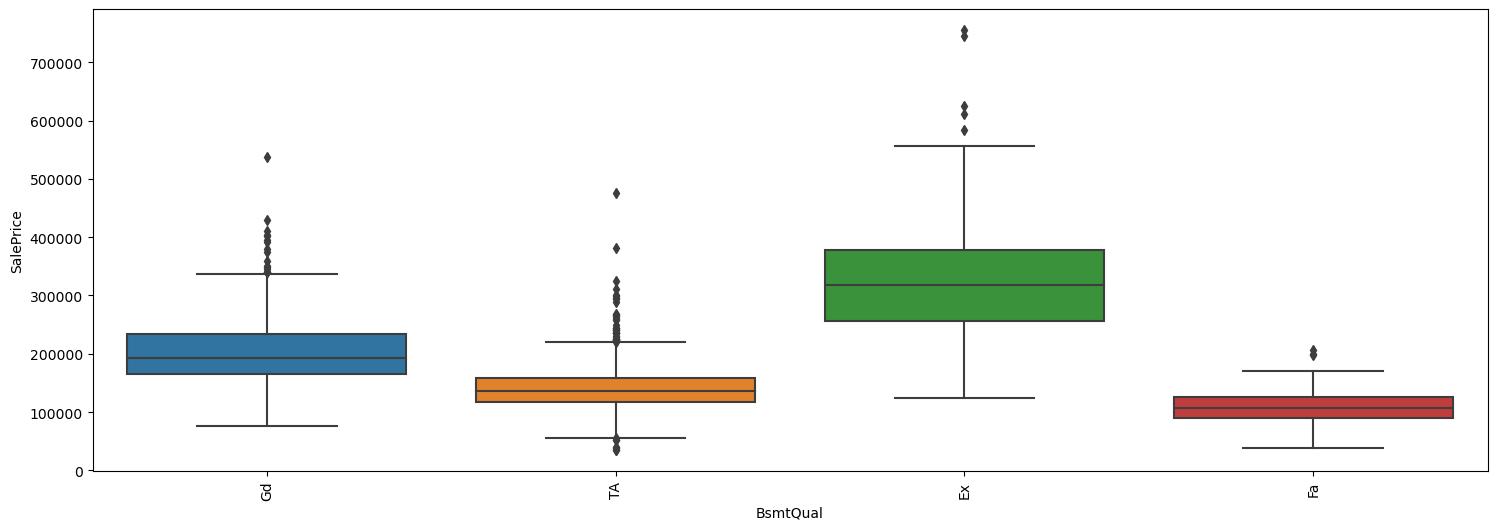

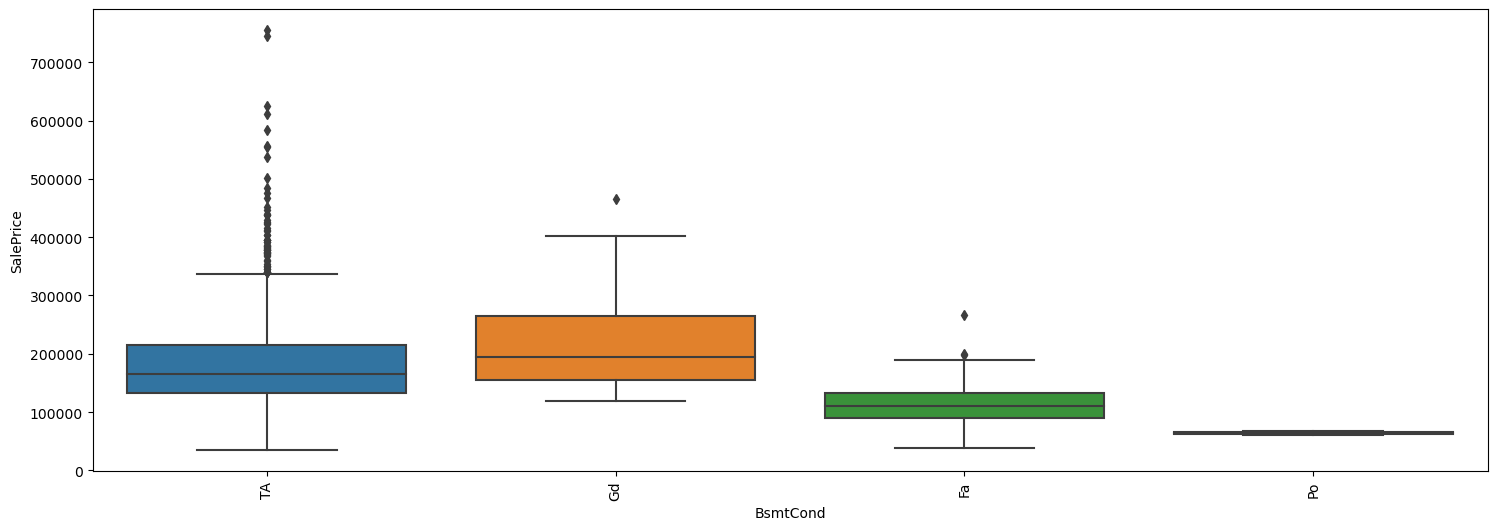

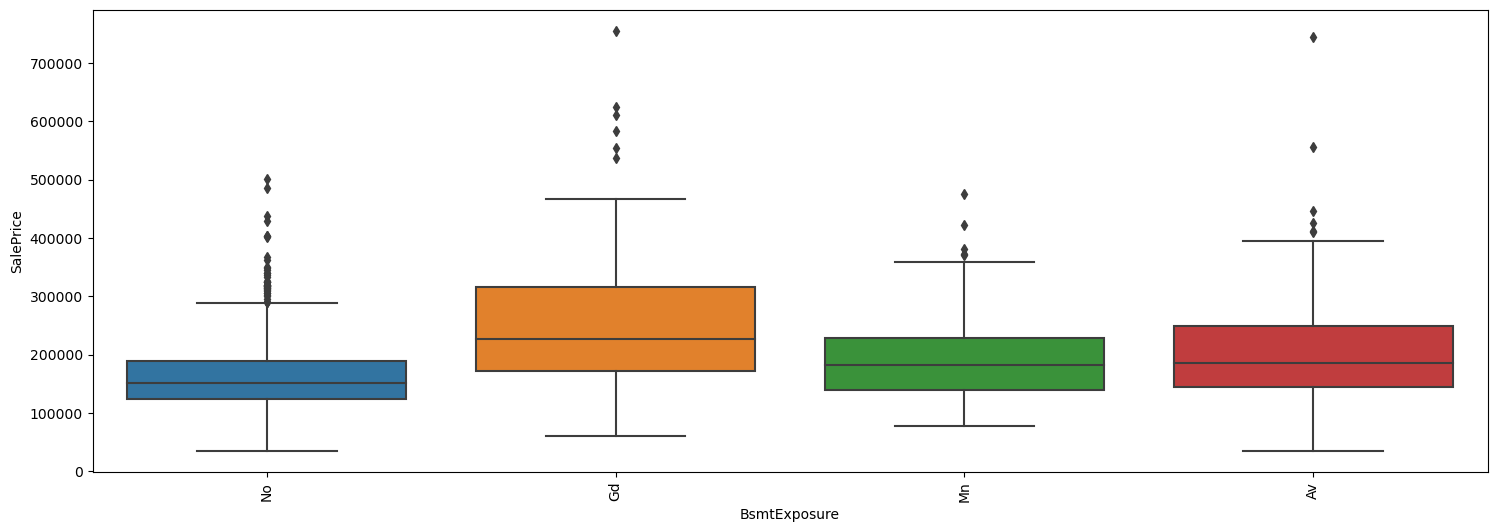

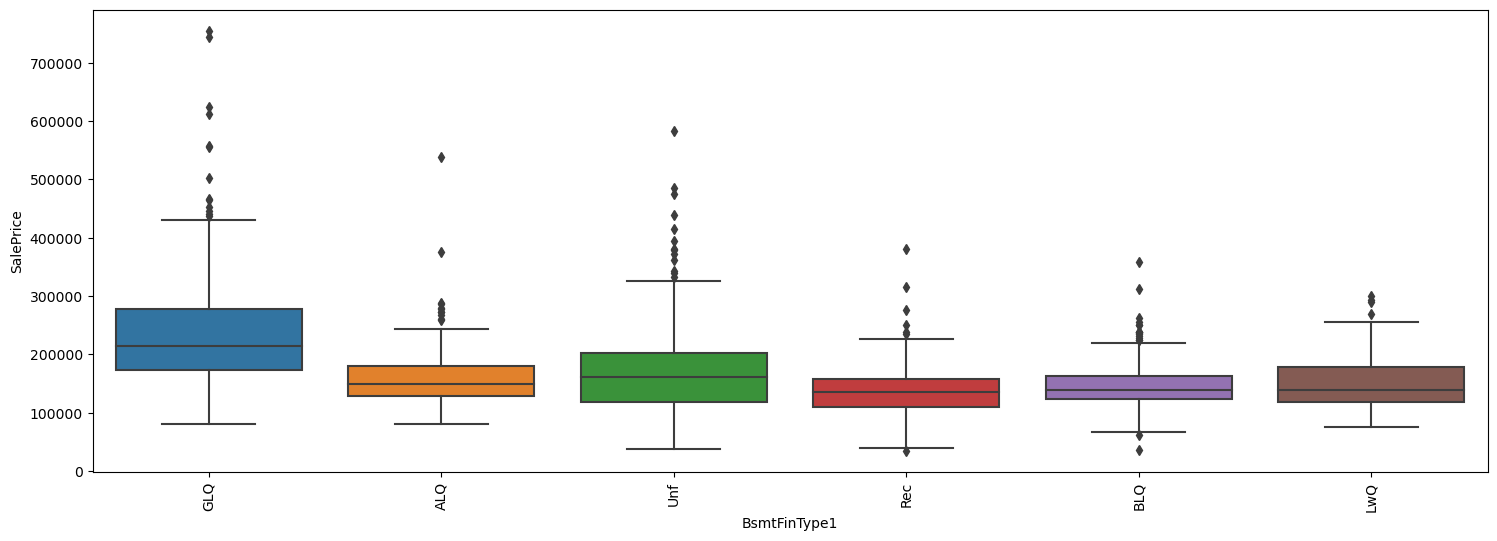

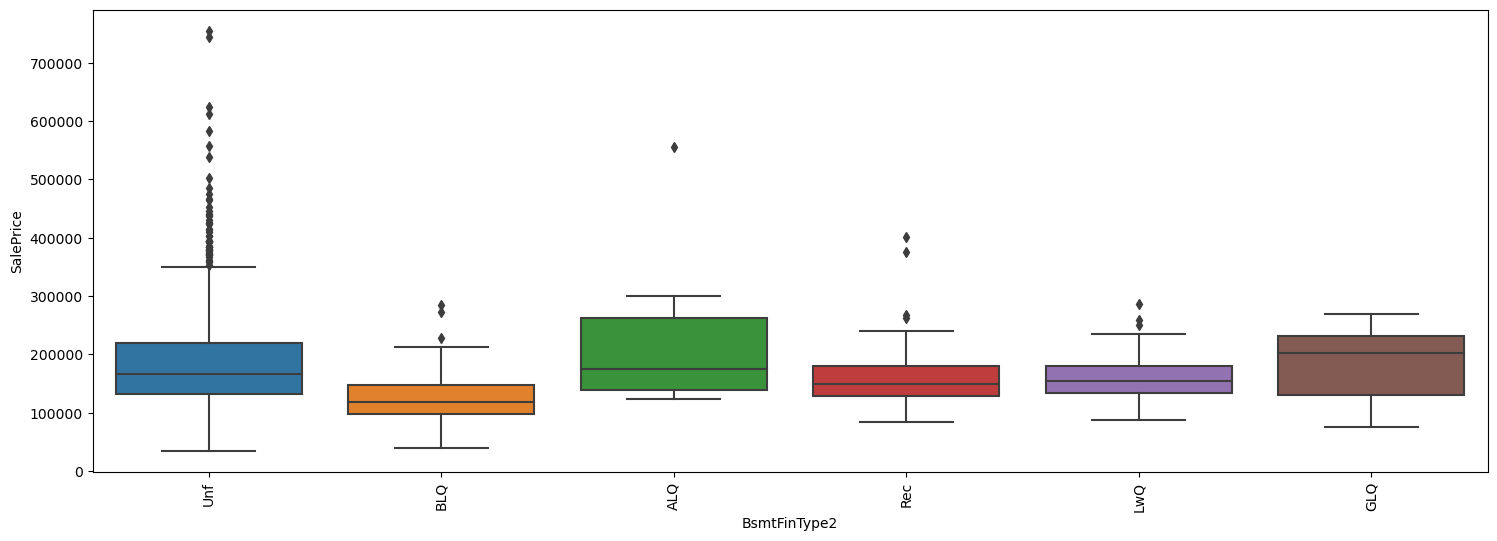

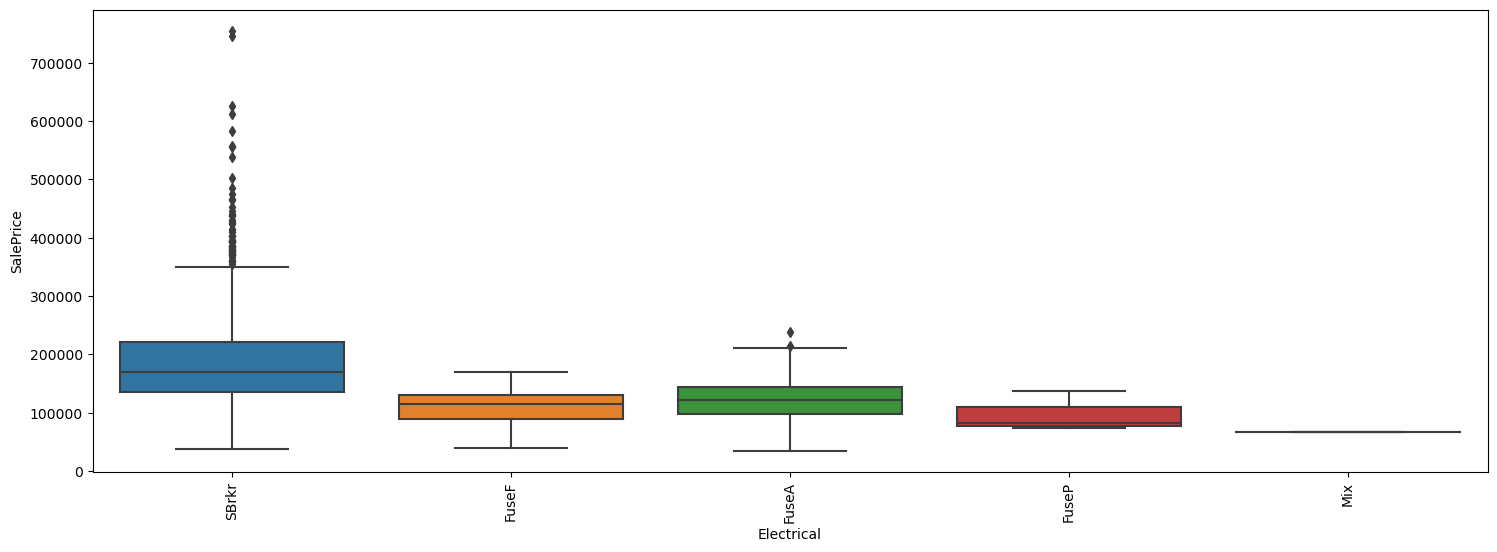

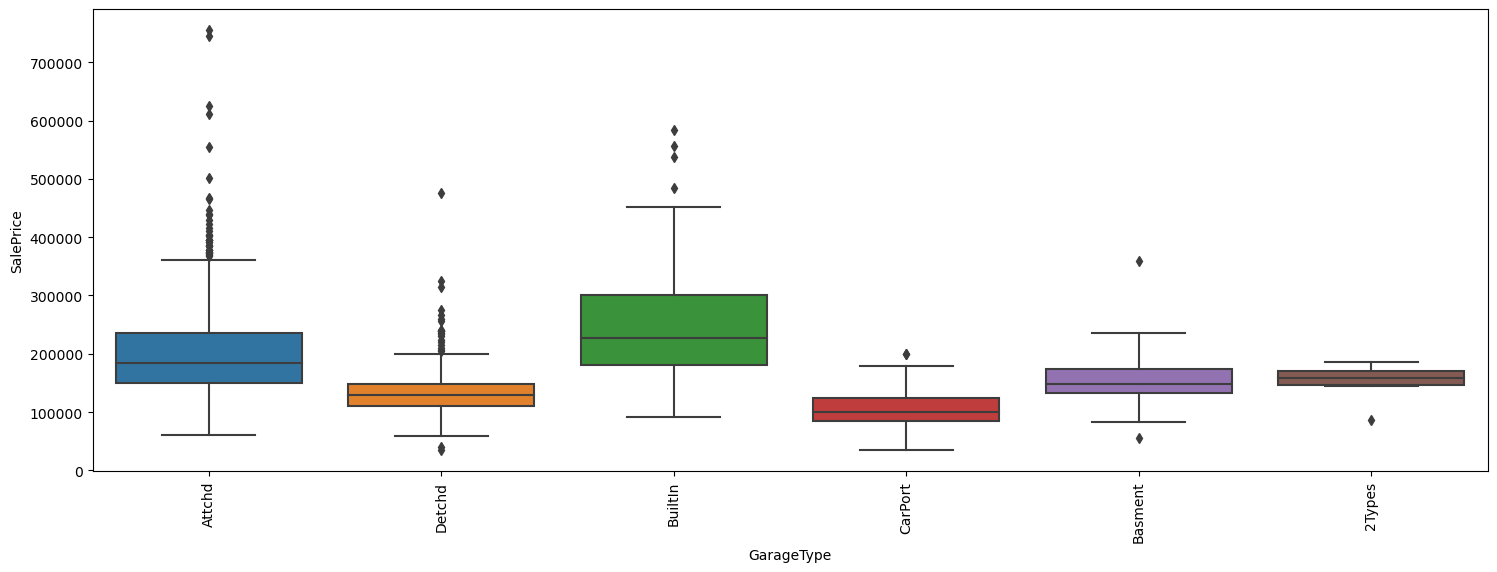

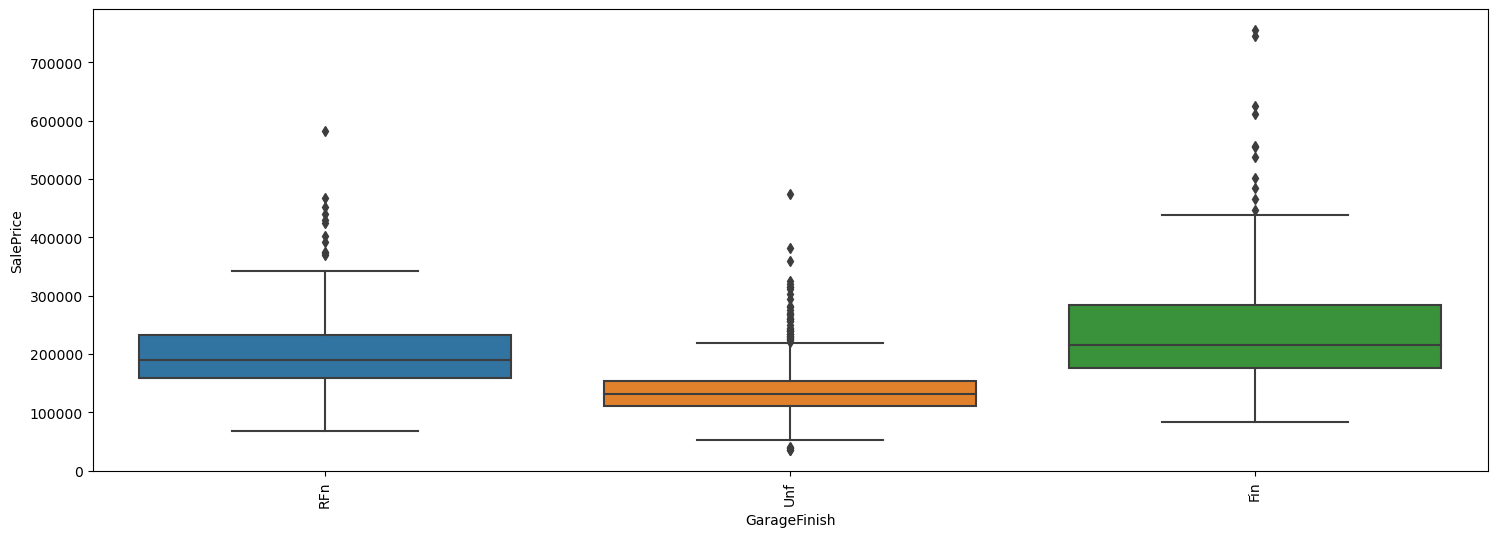

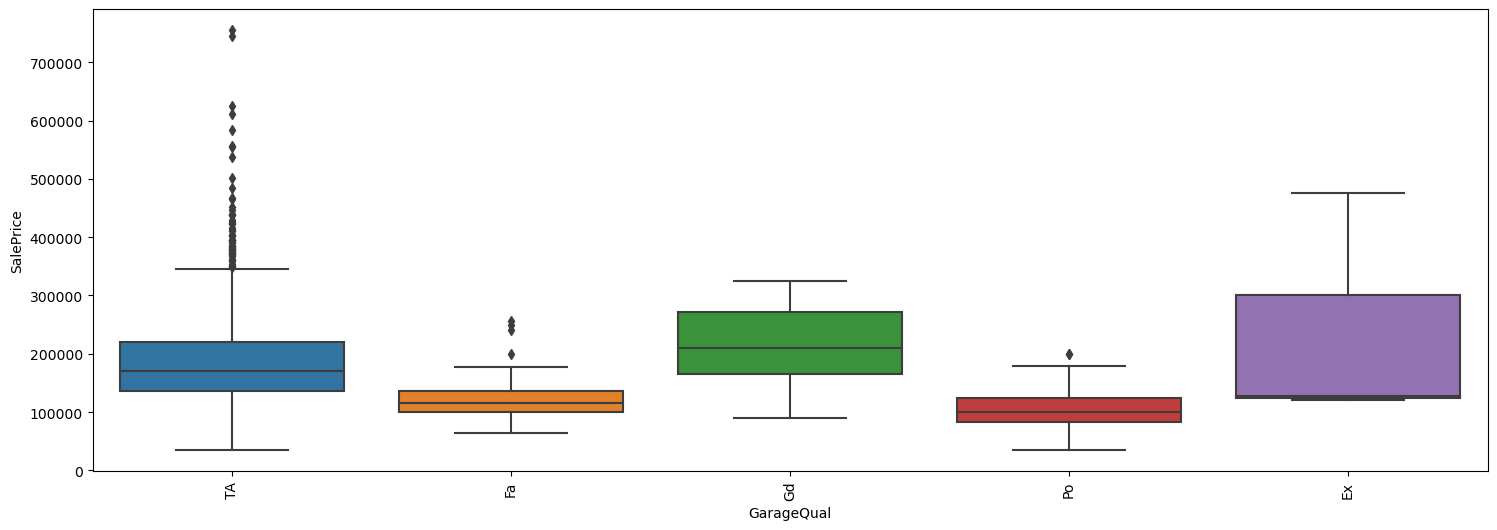

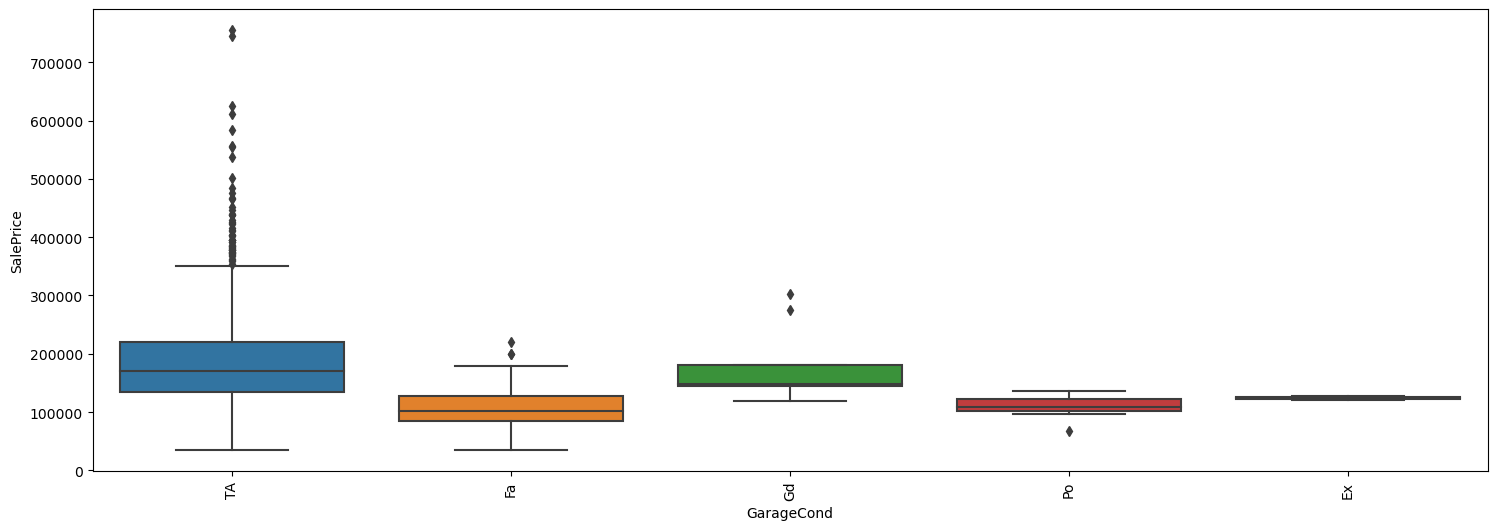

In [432]:
for cols in dataFinal[cols_na]:
    snsPlotVsSalesPrice(dataFinal, cols)

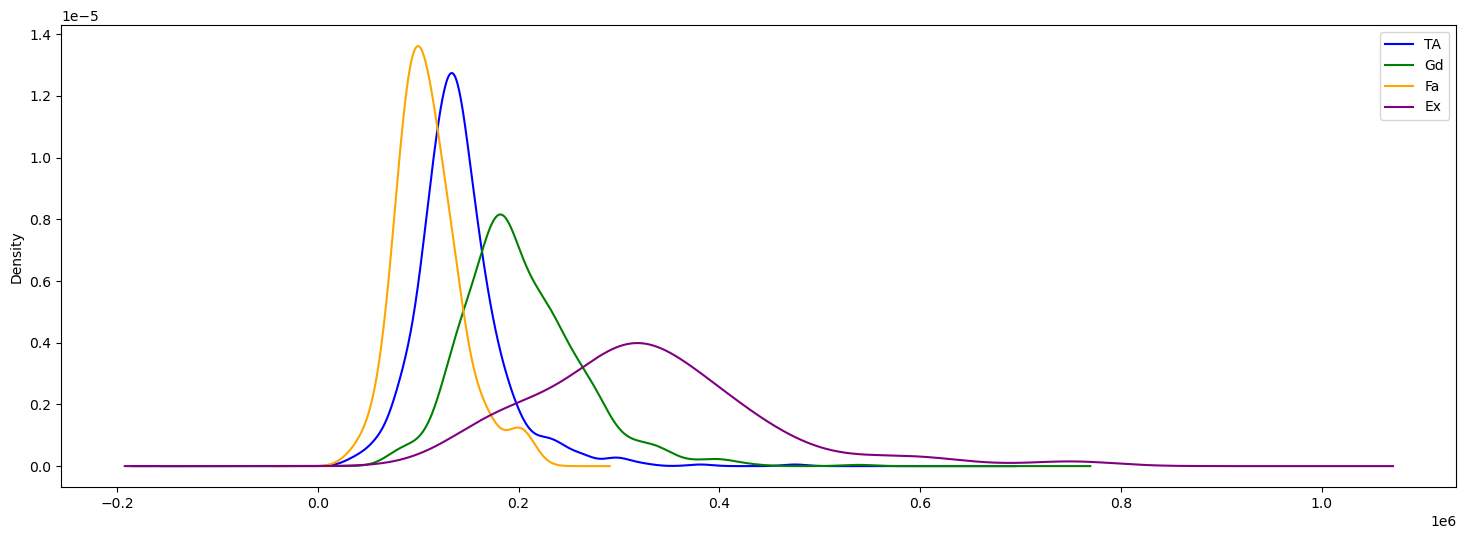

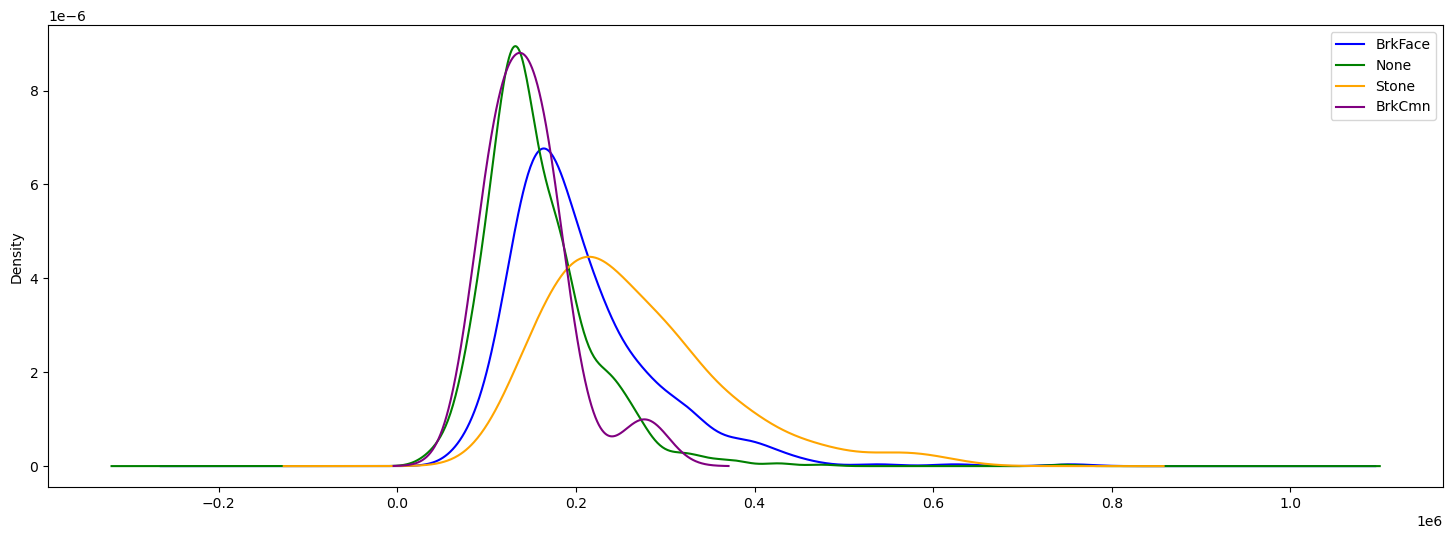

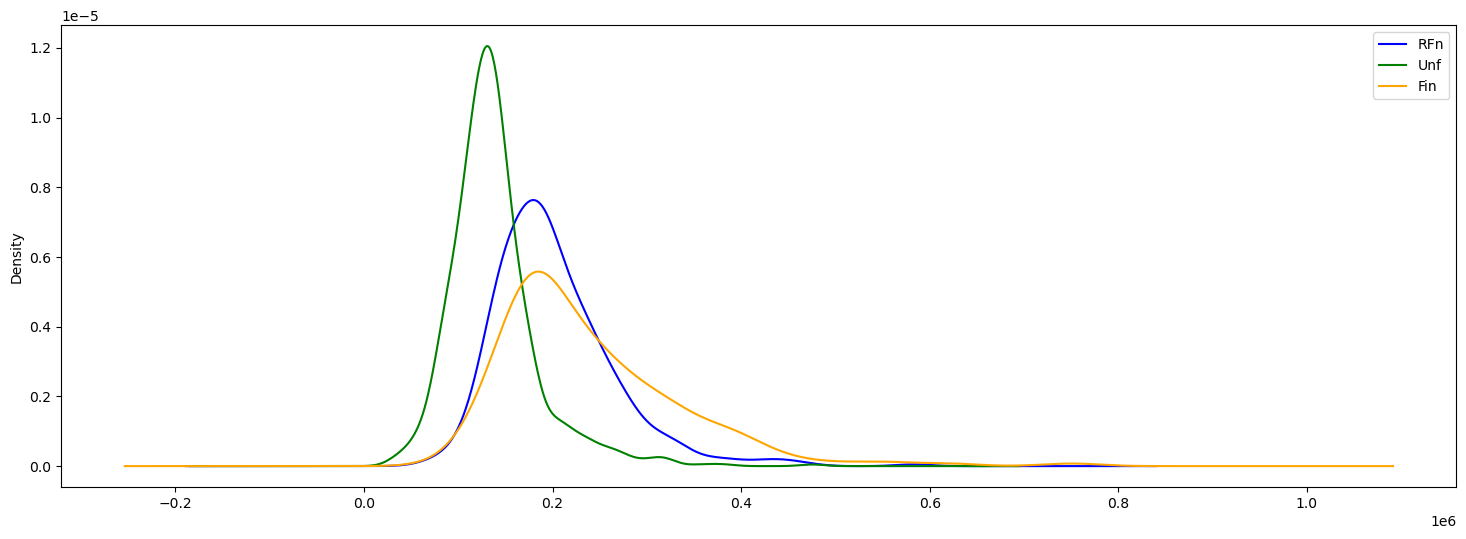

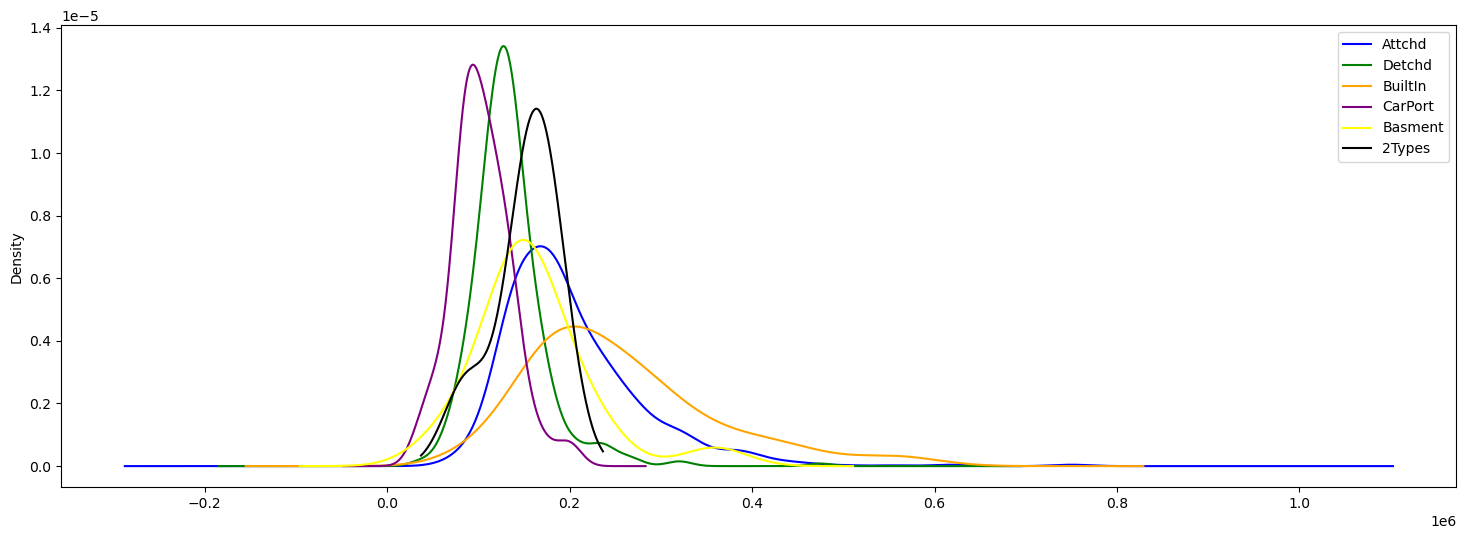

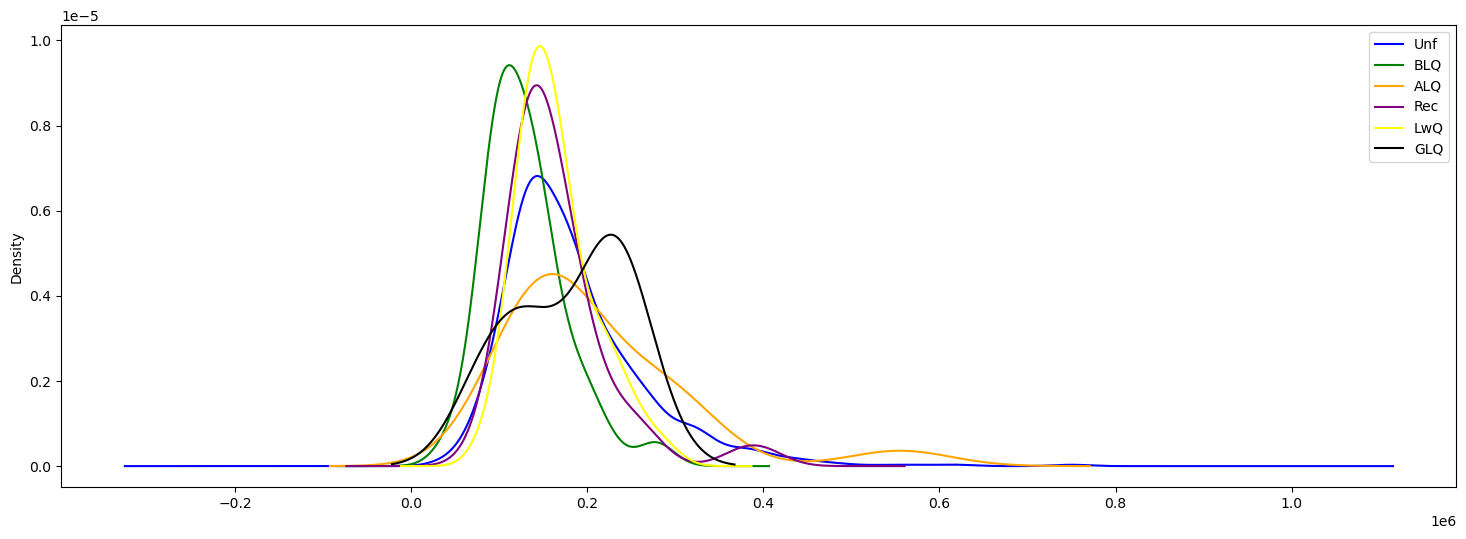

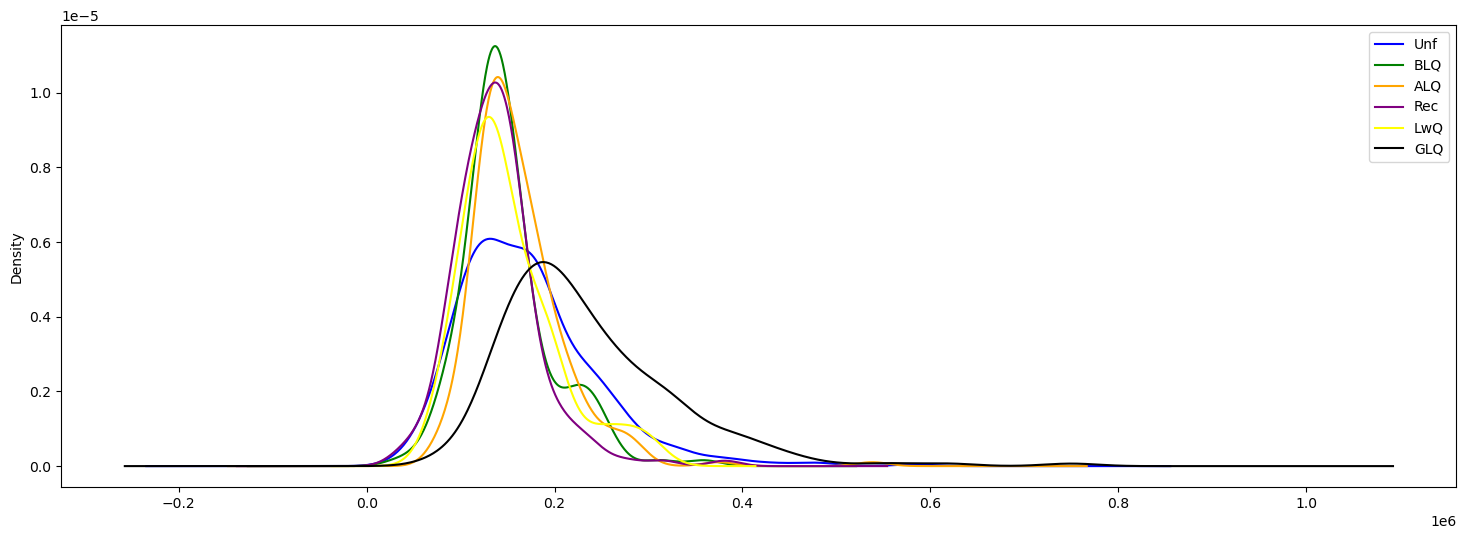

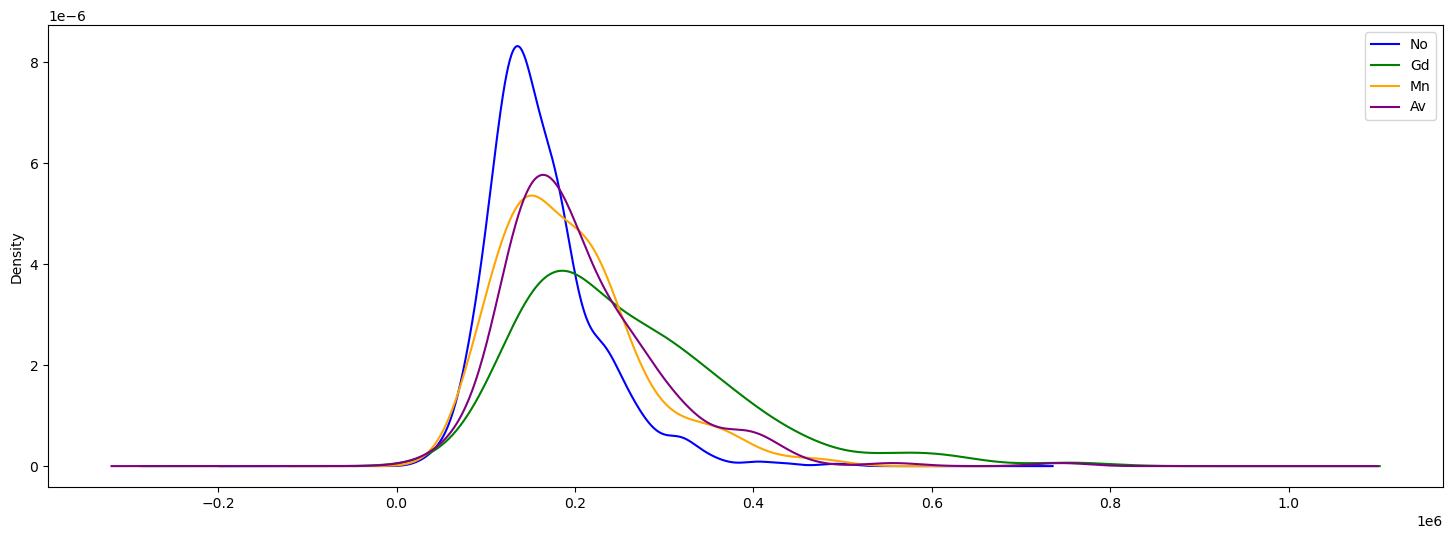

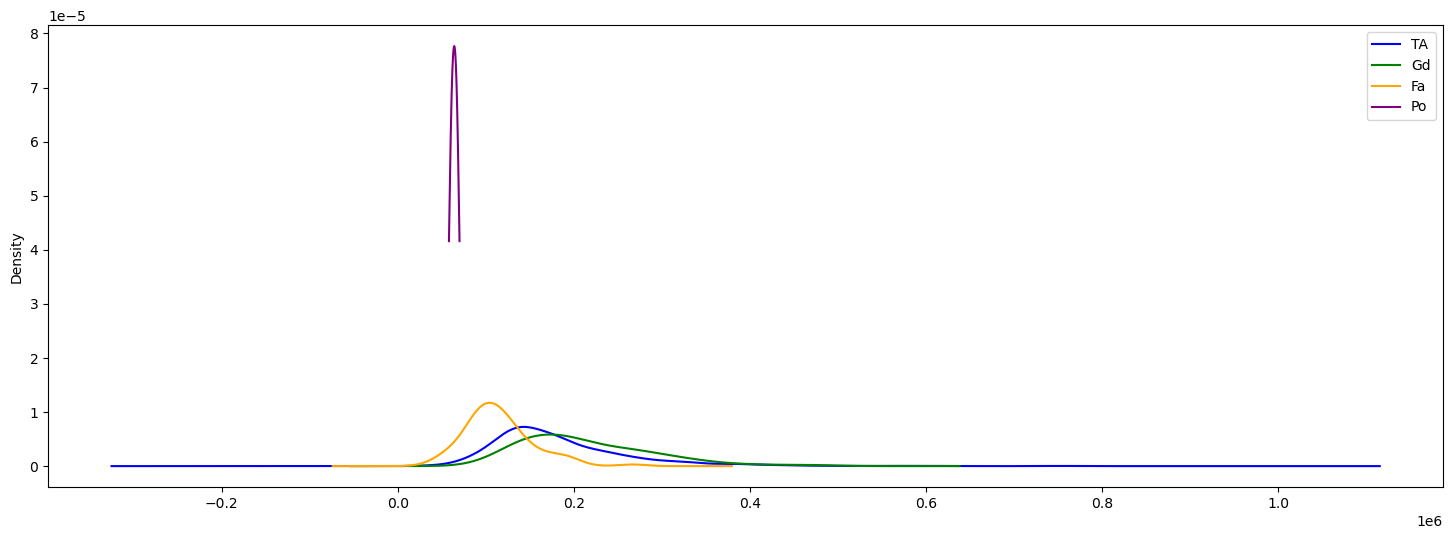

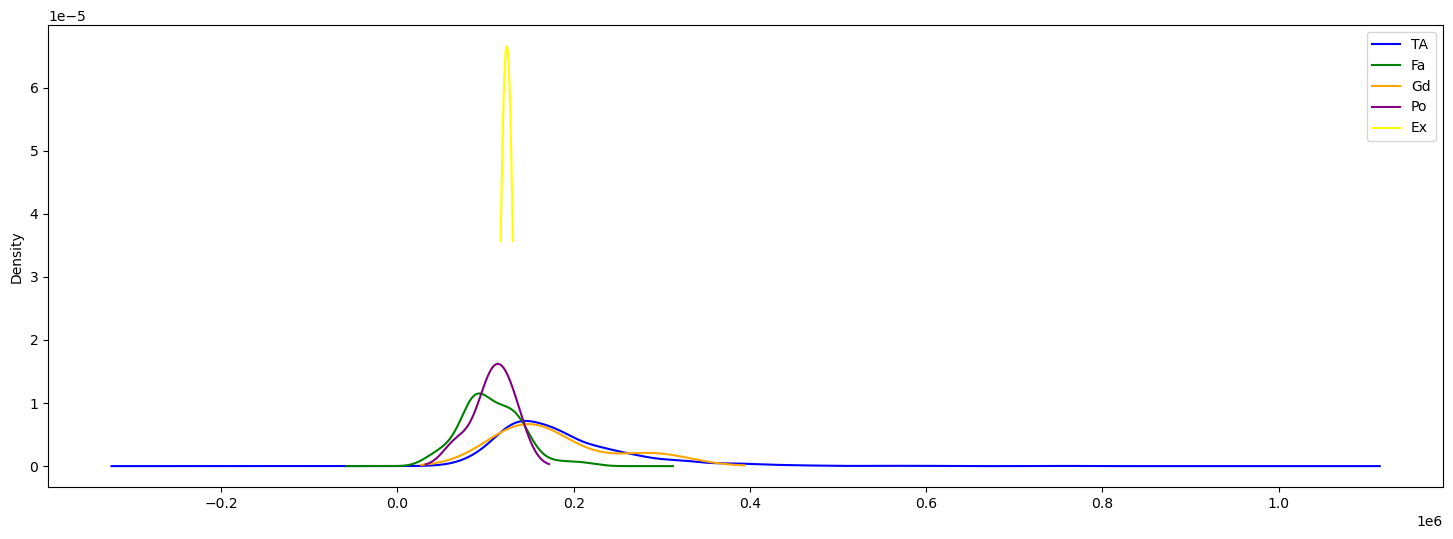

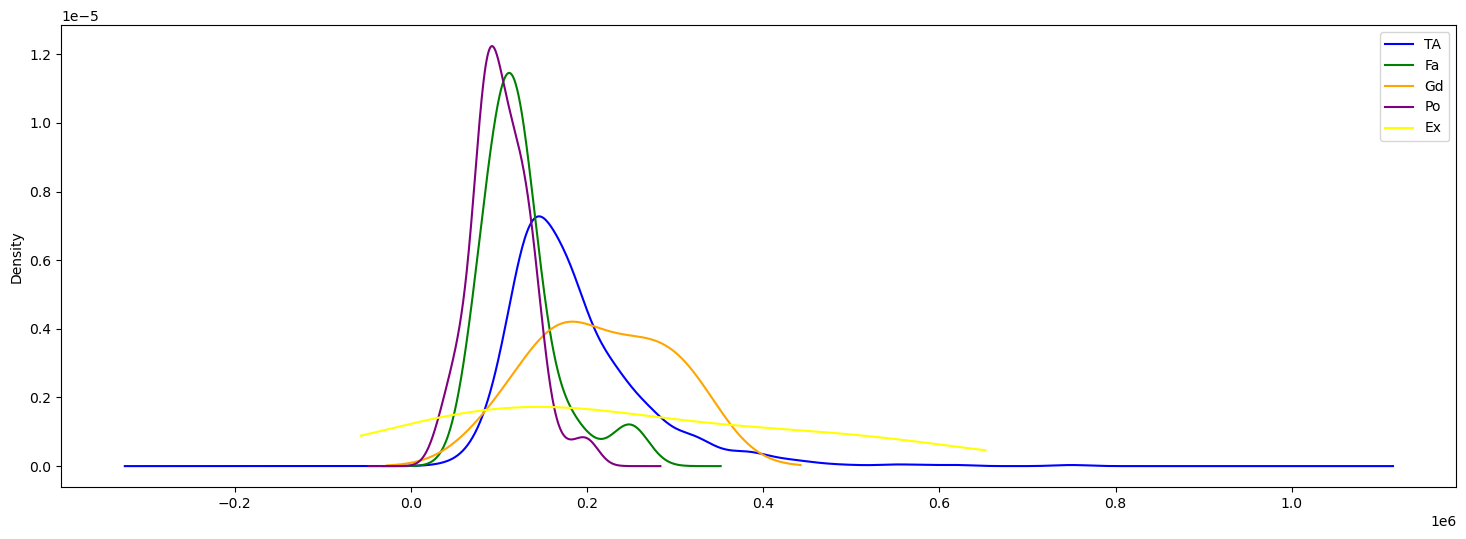

In [433]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'BsmtQual'
dataFinal[dataFinal[col] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataFinal[dataFinal[col] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataFinal[dataFinal[col] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
dataFinal[dataFinal[col] == 'Ex']['SalePrice'].plot(kind="kde", color="purple", label="Ex")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'MasVnrType'
dataFinal[dataFinal[col] == 'BrkFace']['SalePrice'].plot(kind="kde", color="blue", label="BrkFace")
dataFinal[dataFinal[col] == 'None']['SalePrice'].plot(kind="kde", color="green", label="None")
dataFinal[dataFinal[col] == 'Stone']['SalePrice'].plot(kind="kde", color="orange", label="Stone")
dataFinal[dataFinal[col] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="purple", label="BrkCmn")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'GarageFinish'
dataFinal[dataFinal[col] == 'RFn']['SalePrice'].plot(kind="kde", color="blue", label="RFn")
dataFinal[dataFinal[col] == 'Unf']['SalePrice'].plot(kind="kde", color="green", label="Unf")
dataFinal[dataFinal[col] == 'Fin']['SalePrice'].plot(kind="kde", color="orange", label="Fin")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'GarageType'
dataFinal[dataFinal[col] == 'Attchd']['SalePrice'].plot(kind="kde", color="blue", label="Attchd")
dataFinal[dataFinal[col] == 'Detchd']['SalePrice'].plot(kind="kde", color="green", label="Detchd")
dataFinal[dataFinal[col] == 'BuiltIn']['SalePrice'].plot(kind="kde", color="orange", label="BuiltIn")
dataFinal[dataFinal[col] == 'CarPort']['SalePrice'].plot(kind="kde", color="purple", label="CarPort")
dataFinal[dataFinal[col] == 'Basment']['SalePrice'].plot(kind="kde", color="yellow", label="Basment")
dataFinal[dataFinal[col] == '2Types']['SalePrice'].plot(kind="kde", color="black", label="2Types")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'BsmtFinType2'
dataFinal[dataFinal[col] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataFinal[dataFinal[col] == 'BLQ']['SalePrice'].plot(kind="kde", color="green", label="BLQ")
dataFinal[dataFinal[col] == 'ALQ']['SalePrice'].plot(kind="kde", color="orange", label="ALQ")
dataFinal[dataFinal[col] == 'Rec']['SalePrice'].plot(kind="kde", color="purple", label="Rec")
dataFinal[dataFinal[col] == 'LwQ']['SalePrice'].plot(kind="kde", color="yellow", label="LwQ")
dataFinal[dataFinal[col] == 'GLQ']['SalePrice'].plot(kind="kde", color="black", label="GLQ")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'BsmtFinType1'
dataFinal[dataFinal[col] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataFinal[dataFinal[col] == 'BLQ']['SalePrice'].plot(kind="kde", color="green", label="BLQ")
dataFinal[dataFinal[col] == 'ALQ']['SalePrice'].plot(kind="kde", color="orange", label="ALQ")
dataFinal[dataFinal[col] == 'Rec']['SalePrice'].plot(kind="kde", color="purple", label="Rec")
dataFinal[dataFinal[col] == 'LwQ']['SalePrice'].plot(kind="kde", color="yellow", label="LwQ")
dataFinal[dataFinal[col] == 'GLQ']['SalePrice'].plot(kind="kde", color="black", label="GLQ")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'BsmtExposure'
dataFinal[dataFinal[col] == 'No']['SalePrice'].plot(kind="kde", color="blue", label="No")
dataFinal[dataFinal[col] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataFinal[dataFinal[col] == 'Mn']['SalePrice'].plot(kind="kde", color="orange", label="Mn")
dataFinal[dataFinal[col] == 'Av']['SalePrice'].plot(kind="kde", color="purple", label="Av")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'BsmtCond'
dataFinal[dataFinal[col] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataFinal[dataFinal[col] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataFinal[dataFinal[col] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
dataFinal[dataFinal[col] == 'Po']['SalePrice'].plot(kind="kde", color="purple", label="Po")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'GarageCond'
dataFinal[dataFinal[col] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataFinal[dataFinal[col] == 'Fa']['SalePrice'].plot(kind="kde", color="green", label="Fa")
dataFinal[dataFinal[col] == 'Gd']['SalePrice'].plot(kind="kde", color="orange", label="Gd")
dataFinal[dataFinal[col] == 'Po']['SalePrice'].plot(kind="kde", color="purple", label="Po")
dataFinal[dataFinal[col] == 'Ex']['SalePrice'].plot(kind="kde", color="yellow", label="Ex")
ax.legend()
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
col = 'GarageQual'
dataFinal[dataFinal[col] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataFinal[dataFinal[col] == 'Fa']['SalePrice'].plot(kind="kde", color="green", label="Fa")
dataFinal[dataFinal[col] == 'Gd']['SalePrice'].plot(kind="kde", color="orange", label="Gd")
dataFinal[dataFinal[col] == 'Po']['SalePrice'].plot(kind="kde", color="purple", label="Po")
dataFinal[dataFinal[col] == 'Ex']['SalePrice'].plot(kind="kde", color="yellow", label="Ex")
ax.legend()
plt.show()

Columna 'Electrical'

In [434]:
dataFinal[dataFinal['Electrical'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1379  1380          80       RL         73.0     9735   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1379         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1379        0       0      5    2008        WD         Normal     167500  

[1 rows x 76 columns]

In [435]:
#ya que 'Electrical' tiene solo un valor null, le asignamos un valor seleccionado por nosotros ya que no afectara mucho la data
dataFinal['Electrical'].fillna('FuseA', inplace=True)

### Verificacion que no tengamos valores NA's

In [436]:
cols_na_final = [col for col in dataFinal.columns if(dataFinal[col].isnull().mean()>0)]
cols_na_final

[]

### Codificacion de variables categoricas

In [437]:
dataFinal

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ...             0         0           0   
1            Lvl    AllPub       FR2  ...             0         0           0   
2            Lvl    AllPub    Inside  ...             0         0           0   
3            Lvl    AllPub    Corner  ...           272         0           0   
4            Lvl    AllPub       FR2  ...             0         0           0   
...          ...       ...       ...  ...           ...       ...         ...   
1455         Lvl    AllPub    Inside  ...             0         0           0   
1456         Lvl    AllPub    Inside  ...             0         0           0   
1457         Lvl    AllPub    Inside  ...             0         0           0   
1458         Lvl    AllPub    Inside  ...           112         0           0   
1459         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           0       0      2    2008        WD         Normal     208500  
1           0       0      5    2007        WD         Normal     181500  
2           0       0      9    2008        WD         Normal     223500  
3           0       0      2    2006        WD        Abnorml     140000  
4           0       0     12    2008        WD         Normal     250000  
...       ...     ...    ...     ...       ...            ...        ...  
1455        0       0      8    2007        WD         Normal     175000  
1456        0       0      2    2010        WD         Normal     210000  
1457        0    2500      5    2010        WD         Normal     266500  
1458        0       0      4    2010        WD         Normal     142125  
1459        0       0      6    2008        WD         Normal     147500  

[1460 rows x 76 columns]

In [438]:
count_columns = 0
for colname in dataFinal.columns:
    if len(dataFinal[colname].unique()) <= 4 and dataFinal[colname].dtypes != 'int64':
        count_columns += len(dataFinal[colname].unique())-1
        print(colname,':',len(dataFinal[colname].unique()),' Col tipe:',dataFinal[colname].dtypes,' Col number:',count_columns)

Street : 2  Col tipe: object  Col number: 1
LotShape : 4  Col tipe: object  Col number: 4
LandContour : 4  Col tipe: object  Col number: 7
Utilities : 2  Col tipe: object  Col number: 8
LandSlope : 3  Col tipe: object  Col number: 10
MasVnrType : 4  Col tipe: object  Col number: 13
ExterQual : 4  Col tipe: object  Col number: 16
BsmtQual : 4  Col tipe: object  Col number: 19
BsmtCond : 4  Col tipe: object  Col number: 22
BsmtExposure : 4  Col tipe: object  Col number: 25
CentralAir : 2  Col tipe: object  Col number: 26
KitchenQual : 4  Col tipe: object  Col number: 29
GarageFinish : 3  Col tipe: object  Col number: 31
PavedDrive : 3  Col tipe: object  Col number: 33


In [439]:
#la siguiente data don las variables con la funcion dummy que se separen en menos de 4 categorias, para mantener un numero de columnas bajo se utilizara frequency encoding para la data final pero este es un aproach valido 
ohe_data = pd.get_dummies(dataFinal[['Street','LotShape','LandContour','Utilities','LandSlope','MasVnrType','ExterQual','BsmtQual','BsmtCond','BsmtExposure','CentralAir','KitchenQual','GarageFinish','PavedDrive']],drop_first=True)
ohe_data

Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0               1             0             0             1                0   
1               1             0             0             1                0   
2               1             0             0             0                0   
3               1             0             0             0                0   
4               1             0             0             0                0   
...           ...           ...           ...           ...              ...   
1455            1             0             0             1                0   
1456            1             0             0             1                0   
1457            1             0             0             1                0   
1458            1             0             0             1                0   
1459            1             0             0             1                0   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LandSlope_Mod  \
0                   0                1                 0              0   
1                   0                1                 0              0   
2                   0                1                 0              0   
3                   0                1                 0              0   
4                   0                1                 0              0   
...               ...              ...               ...            ...   
1455                0                1                 0              0   
1456                0                1                 0              0   
1457                0                1                 0              0   
1458                0                1                 0              0   
1459                0                1                 0              0   

      LandSlope_Sev  ...  BsmtExposure_Mn  BsmtExposure_No  CentralAir_Y  \
0                 0  ...                0                1             1   
1                 0  ...                0                0             1   
2                 0  ...                1                0             1   
3                 0  ...                0                1             1   
4                 0  ...                0                0             1   
...             ...  ...              ...              ...           ...   
1455              0  ...                0                1             1   
1456              0  ...                0                1             1   
1457              0  ...                0                1             1   
1458              0  ...                1                0             1   
1459              0  ...                0                1             1   

      KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  GarageFinish_RFn  \
0                  0               1               0                 1   
1                  0               0               1                 1   
2                  0               1               0                 1   
3                  0               1               0                 0   
4                  0               1               0                 1   
...              ...             ...             ...               ...   
1455               0               0               1                 1   
1456               0               0               1                 0   
1457               0               1               0                 1   
1458               0               1               0                 0   
1459               0               0               1                 0   

      GarageFinish_Unf  PavedDrive_P  PavedDrive_Y  
0                    0             0             1  
1                    0             0             1  
2                    0             0             1  
3                    1             0             1  
4                    0             0             1  
...                ...  

In [440]:
for colname in dataFinal.columns:
    if dataFinal[colname].dtypes == 'object':
        print(colname,':',len(dataFinal[colname].unique()),' Col tipe:',dataFinal[colname].dtypes)

MSZoning : 5  Col tipe: object
Street : 2  Col tipe: object
LotShape : 4  Col tipe: object
LandContour : 4  Col tipe: object
Utilities : 2  Col tipe: object
LotConfig : 5  Col tipe: object
LandSlope : 3  Col tipe: object
Neighborhood : 25  Col tipe: object
Condition1 : 9  Col tipe: object
Condition2 : 8  Col tipe: object
BldgType : 5  Col tipe: object
HouseStyle : 8  Col tipe: object
RoofStyle : 6  Col tipe: object
RoofMatl : 8  Col tipe: object
Exterior1st : 15  Col tipe: object
Exterior2nd : 16  Col tipe: object
MasVnrType : 4  Col tipe: object
ExterQual : 4  Col tipe: object
ExterCond : 5  Col tipe: object
Foundation : 6  Col tipe: object
BsmtQual : 4  Col tipe: object
BsmtCond : 4  Col tipe: object
BsmtExposure : 4  Col tipe: object
BsmtFinType1 : 6  Col tipe: object
BsmtFinType2 : 6  Col tipe: object
Heating : 6  Col tipe: object
HeatingQC : 5  Col tipe: object
CentralAir : 2  Col tipe: object
Electrical : 5  Col tipe: object
KitchenQual : 4  Col tipe: object
Functional : 7  Col t

In [441]:
for colname in dataFinal.columns:
    if dataFinal[colname].dtypes == 'object':
        mapp_freq = dataFinal[colname].value_counts().to_dict()
        dataFinal[colname] = dataFinal[colname].map(mapp_freq)

dataFinal

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        1          60      1151         65.0     8450    1454       925   
1        2          20      1151         80.0     9600    1454       925   
2        3          60      1151         68.0    11250    1454       484   
3        4          70      1151         60.0     9550    1454       484   
4        5          60      1151         84.0    14260    1454       484   
...    ...         ...       ...          ...      ...     ...       ...   
1455  1456          60      1151         62.0     7917    1454       925   
1456  1457          20      1151         85.0    13175    1454       925   
1457  1458          70      1151         66.0     9042    1454       925   
1458  1459          20      1151         68.0     9717    1454       925   
1459  1460          20      1151         75.0     9937    1454       925   

      LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            1311       1459       1052  ...              0          0   
1            1311       1459         47  ...              0          0   
2            1311       1459       1052  ...              0          0   
3            1311       1459        263  ...            272          0   
4            1311       1459         47  ...              0          0   
...           ...        ...        ...  ...            ...        ...   
1455         1311       1459       1052  ...              0          0   
1456         1311       1459       1052  ...              0          0   
1457         1311       1459       1052  ...              0          0   
1458         1311       1459       1052  ...            112          0   
1459         1311       1459       1052  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       2    2008      1267           1198   
1               0         0        0       5    2007      1267           1198   
2               0         0        0       9    2008      1267           1198   
3               0         0        0       2    2006      1267            101   
4               0         0        0      12    2008      1267           1198   
...           ...       ...      ...     ...     ...       ...            ...   
1455            0         0        0       8    2007      1267           1198   
1456            0         0        0       2    2010      1267           1198   
1457            0         0     2500       5    2010      1267           1198   
1458            0         0        0       4    2010      1267           1198   
1459            0         0        0       6    2008      1267           1198   

      SalePrice  
0        208500  
1        181500  
2        223500  
3        140000  
4        250000  
...         ...  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[1460 rows x 76 columns]

### Outliers

In [444]:
continuas, discretas, categoricas = getColumnTypes(dataFinal)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold

C:\Users\Anthony\AppData\Local\Temp\ipykernel_9408\3224949875.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\Anthony\AppData\Local\Temp\ipykernel_9408\3224949875.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\Anthony\AppDa

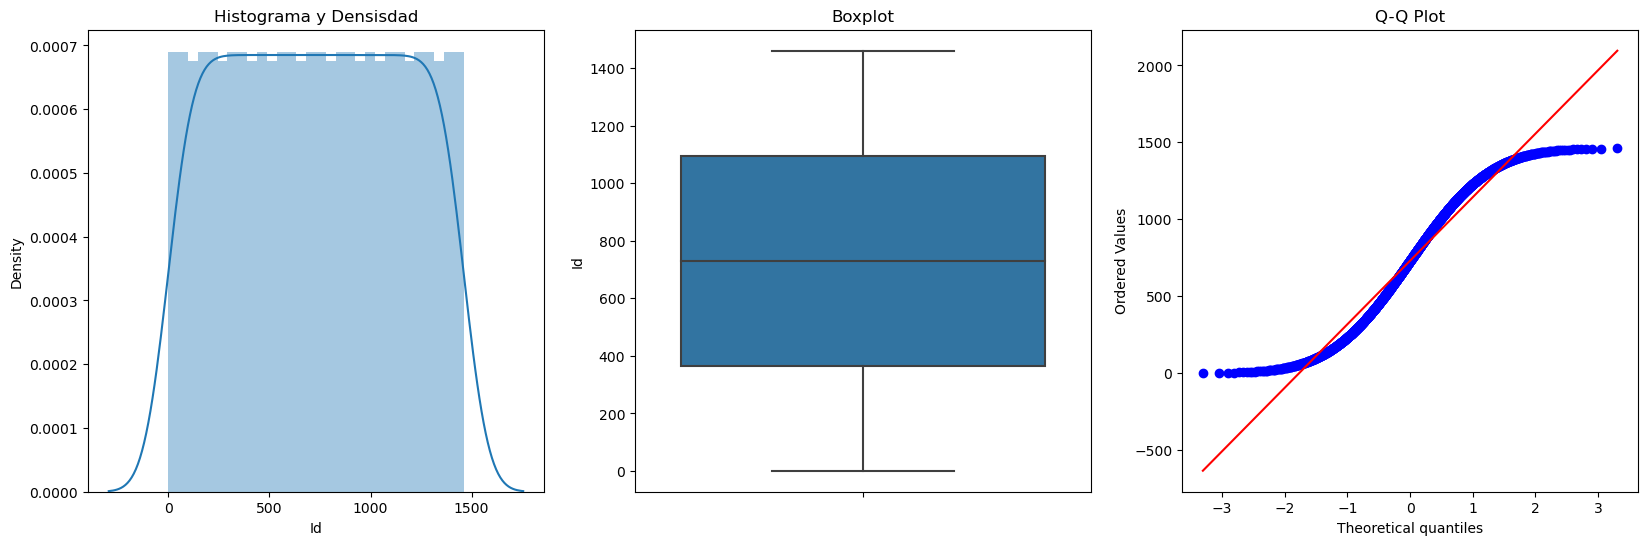

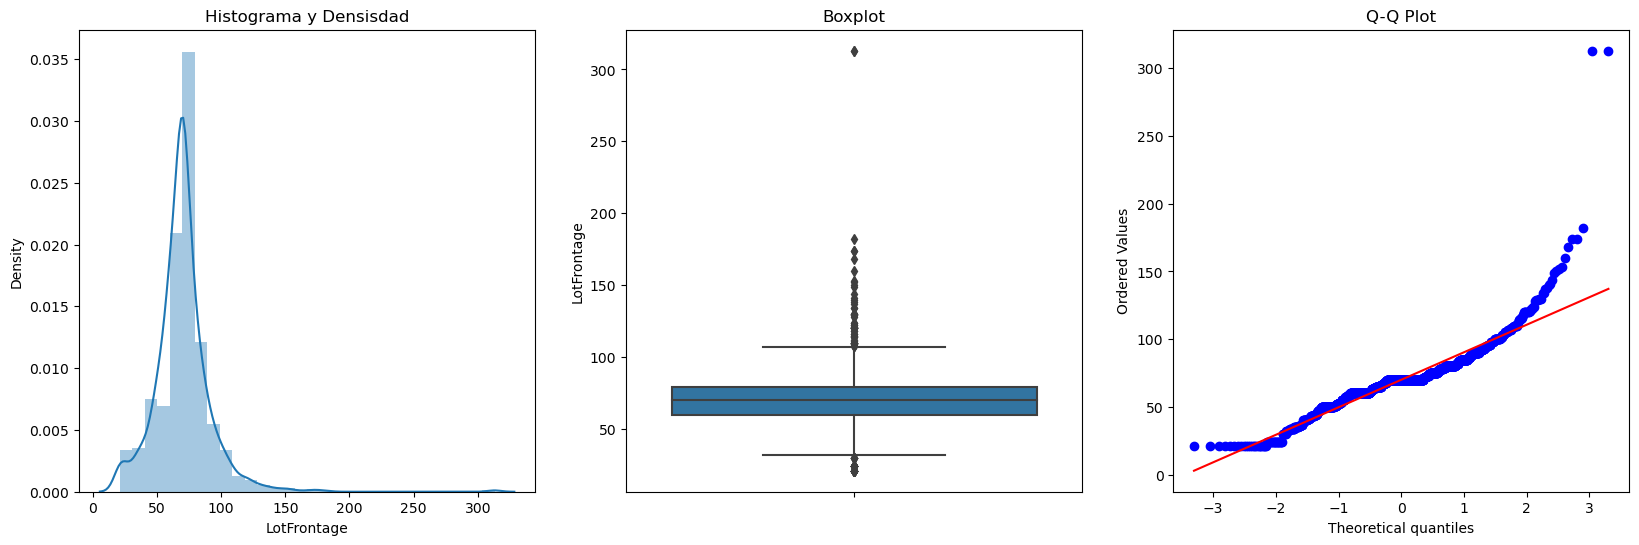

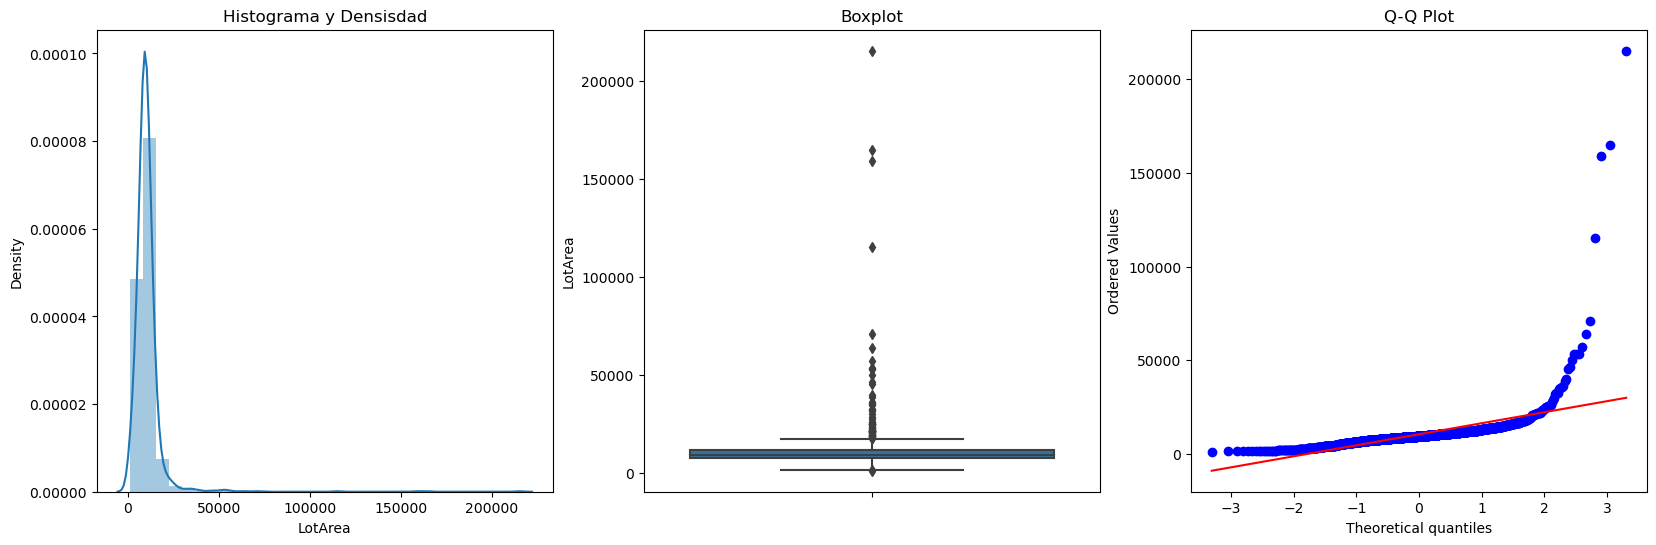

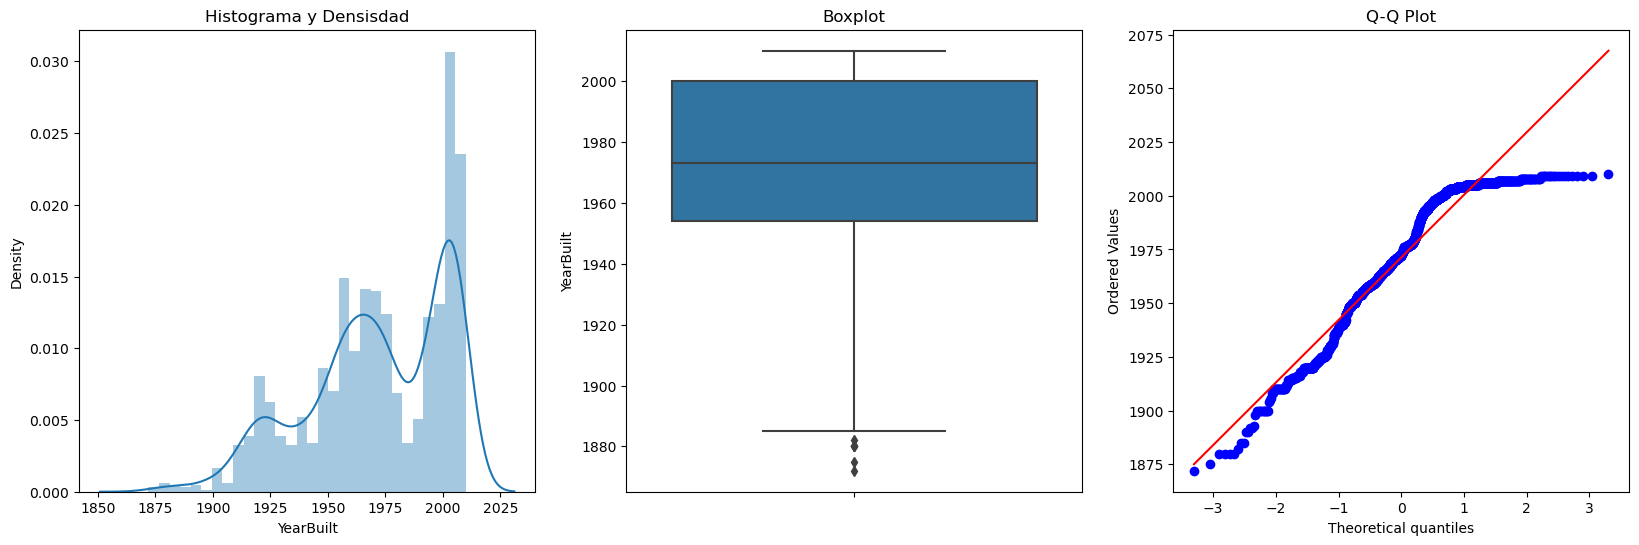

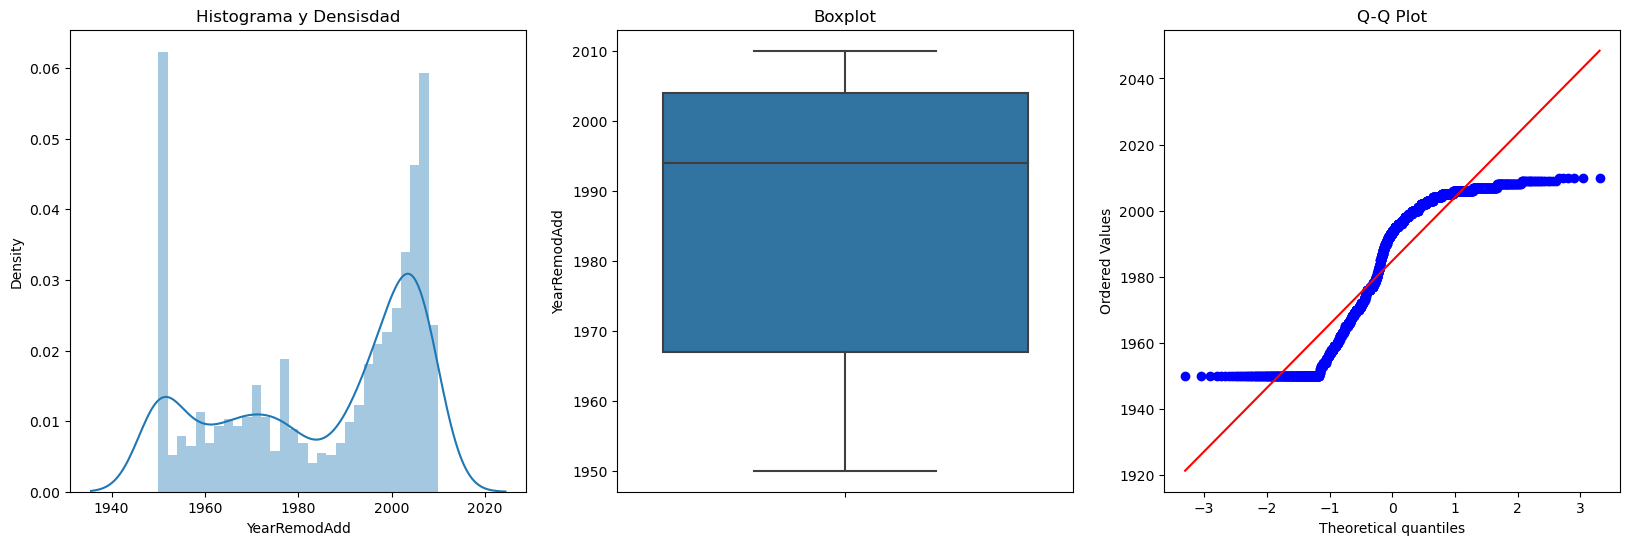

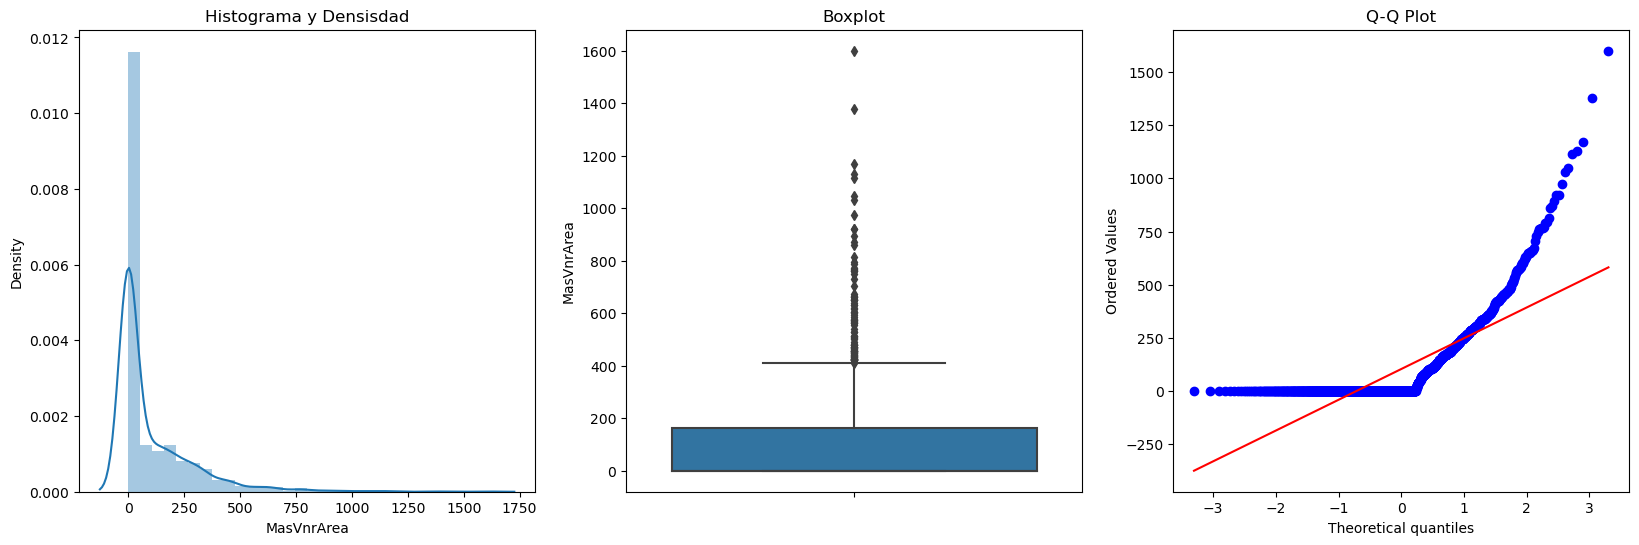

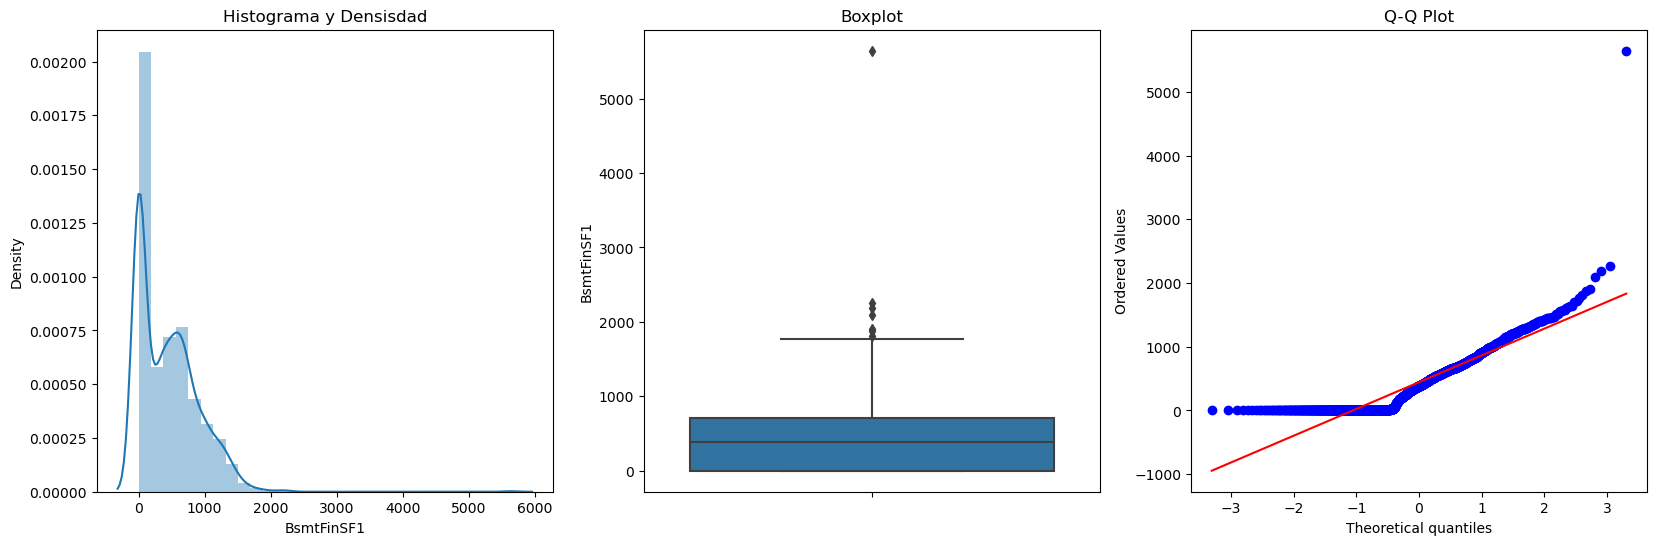

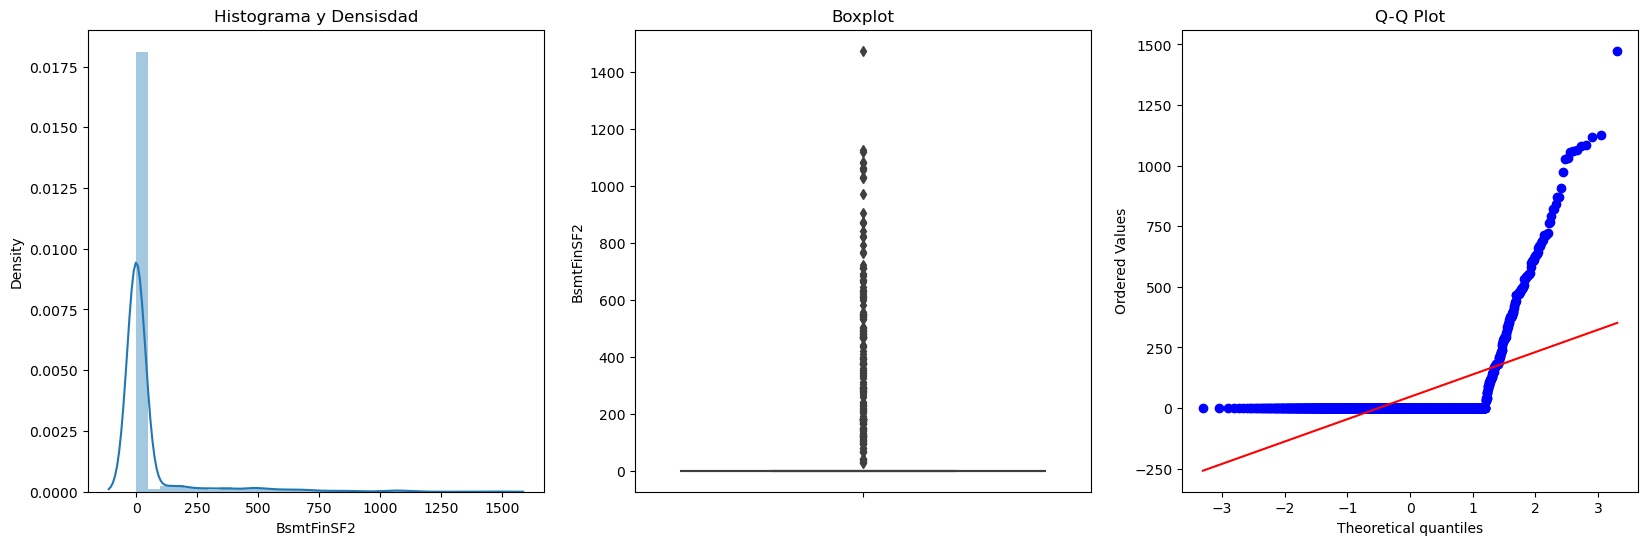

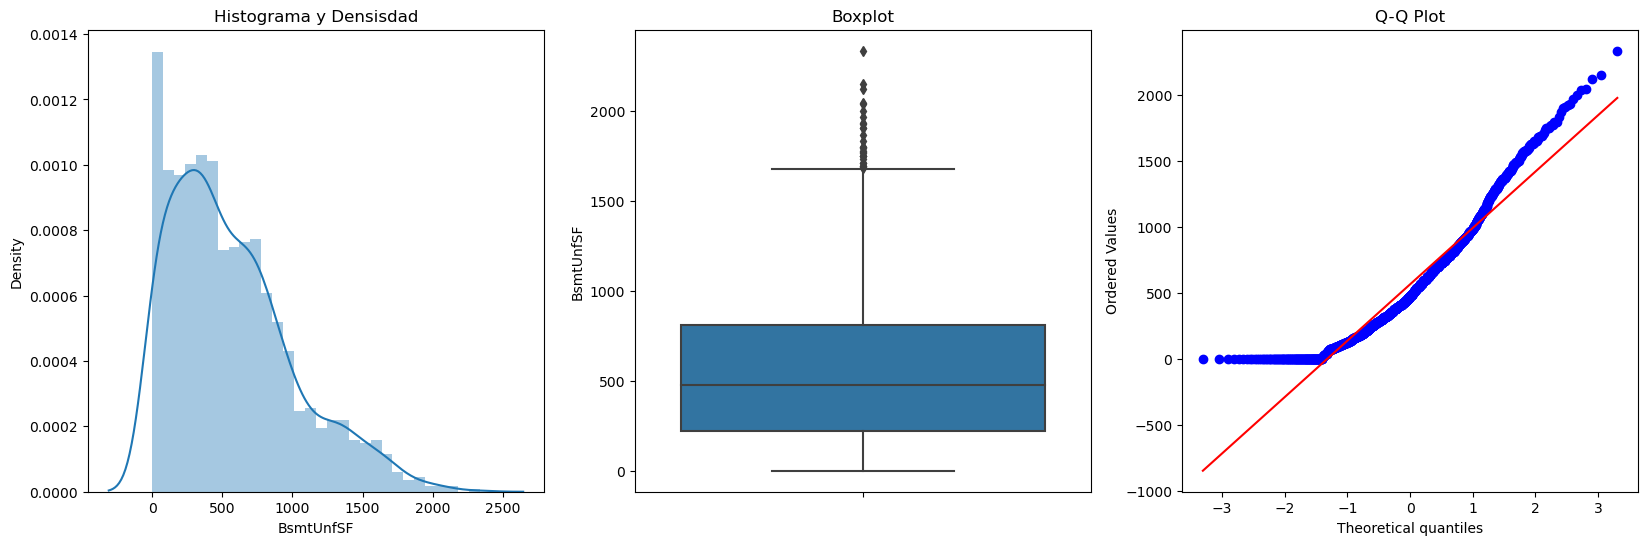

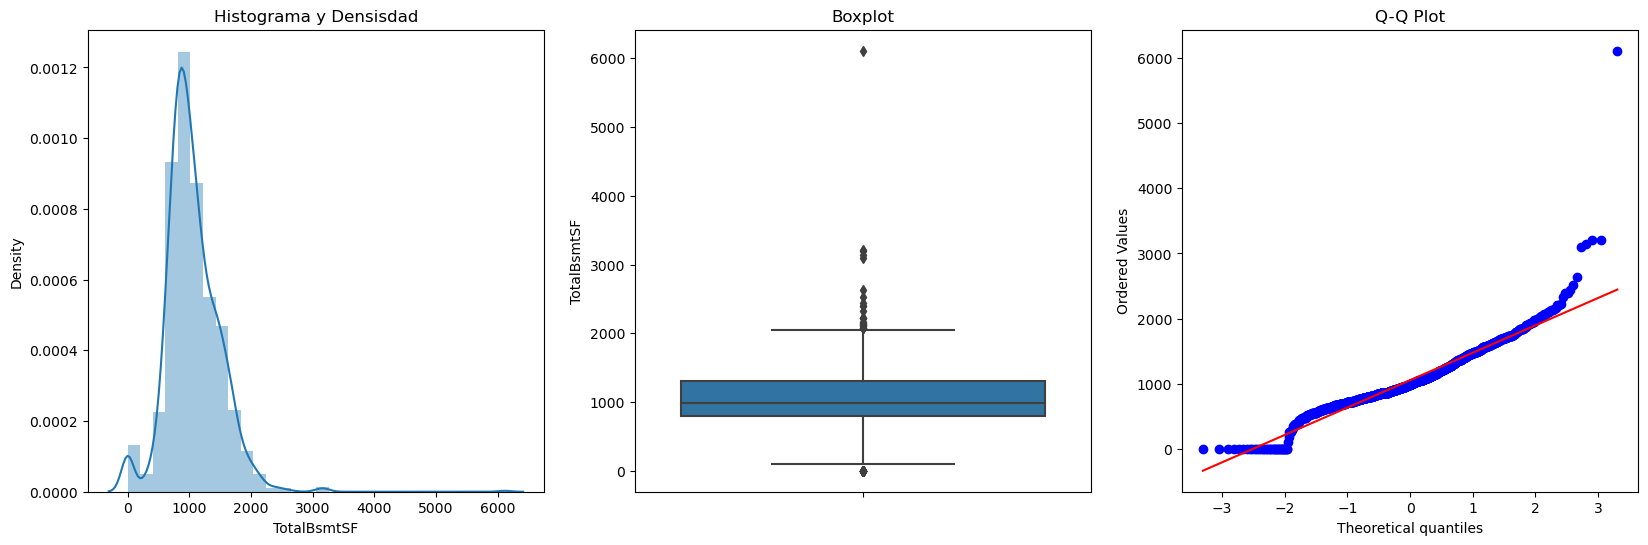

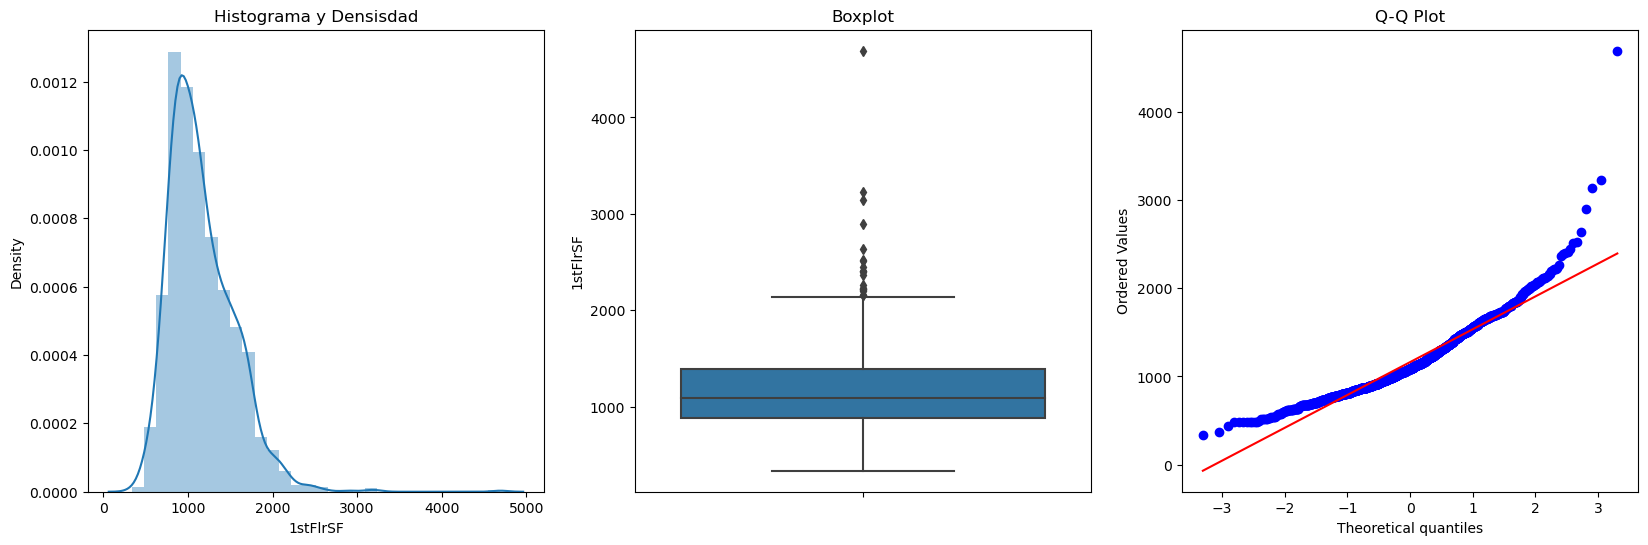

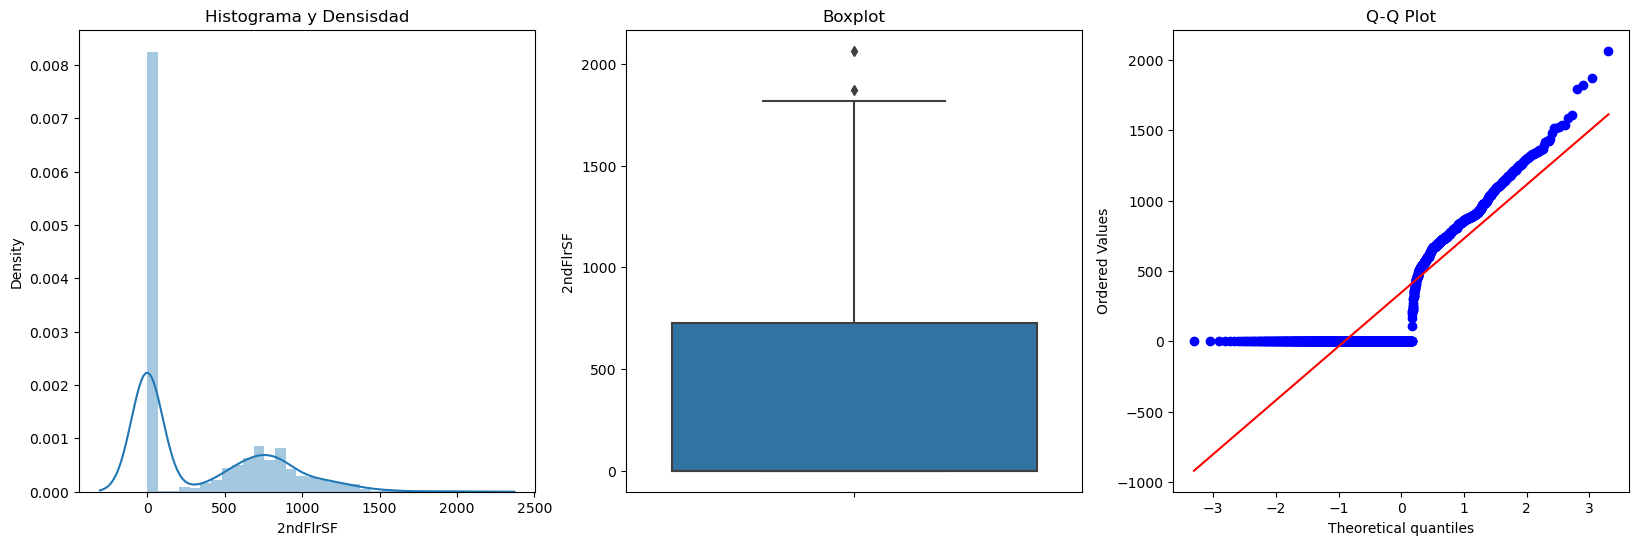

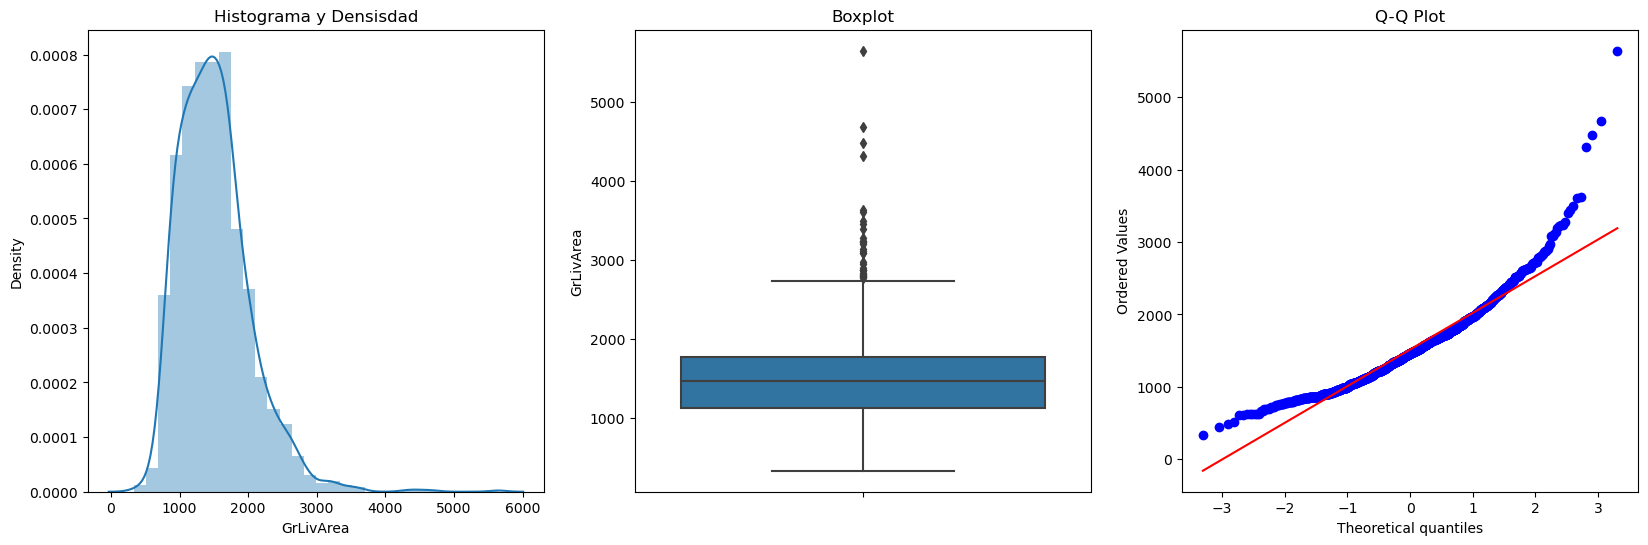

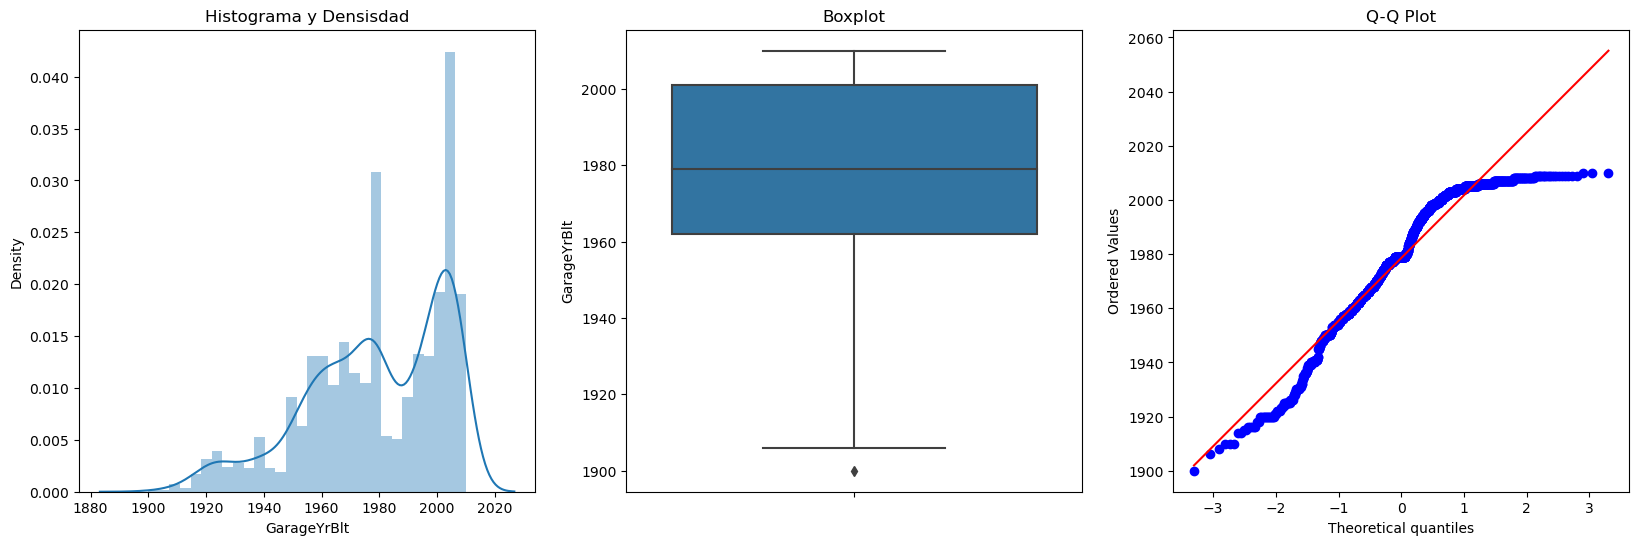

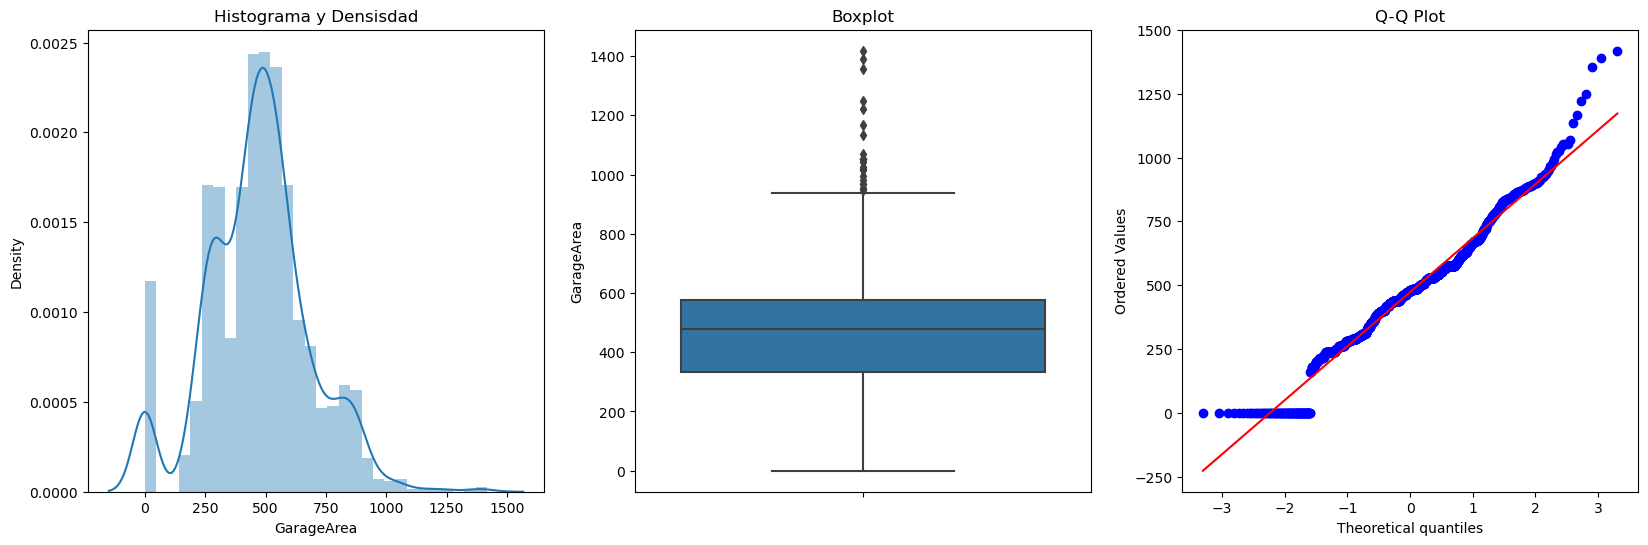

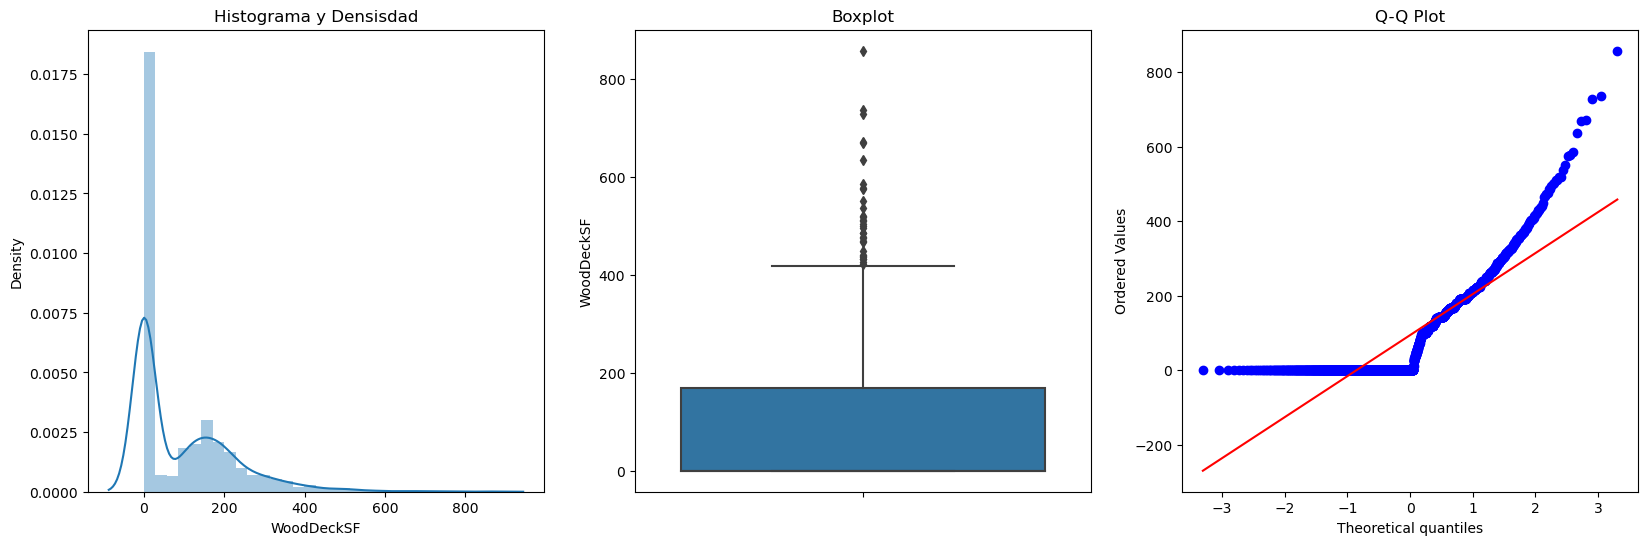

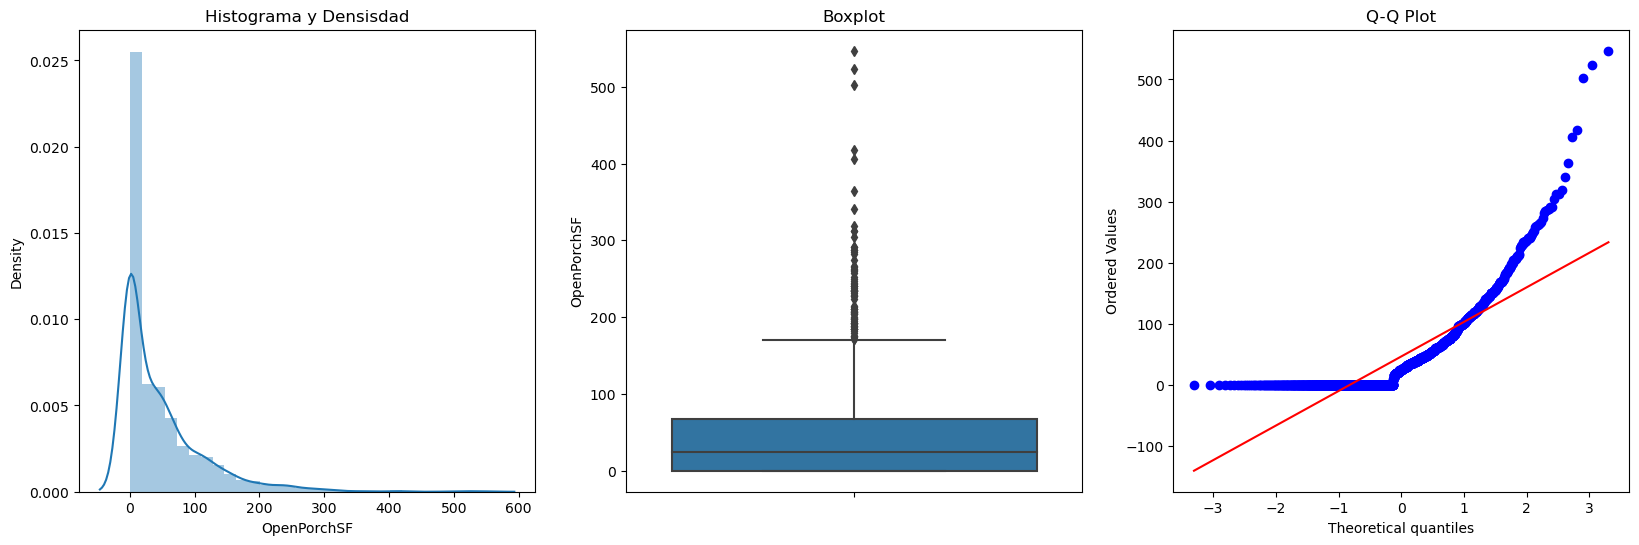

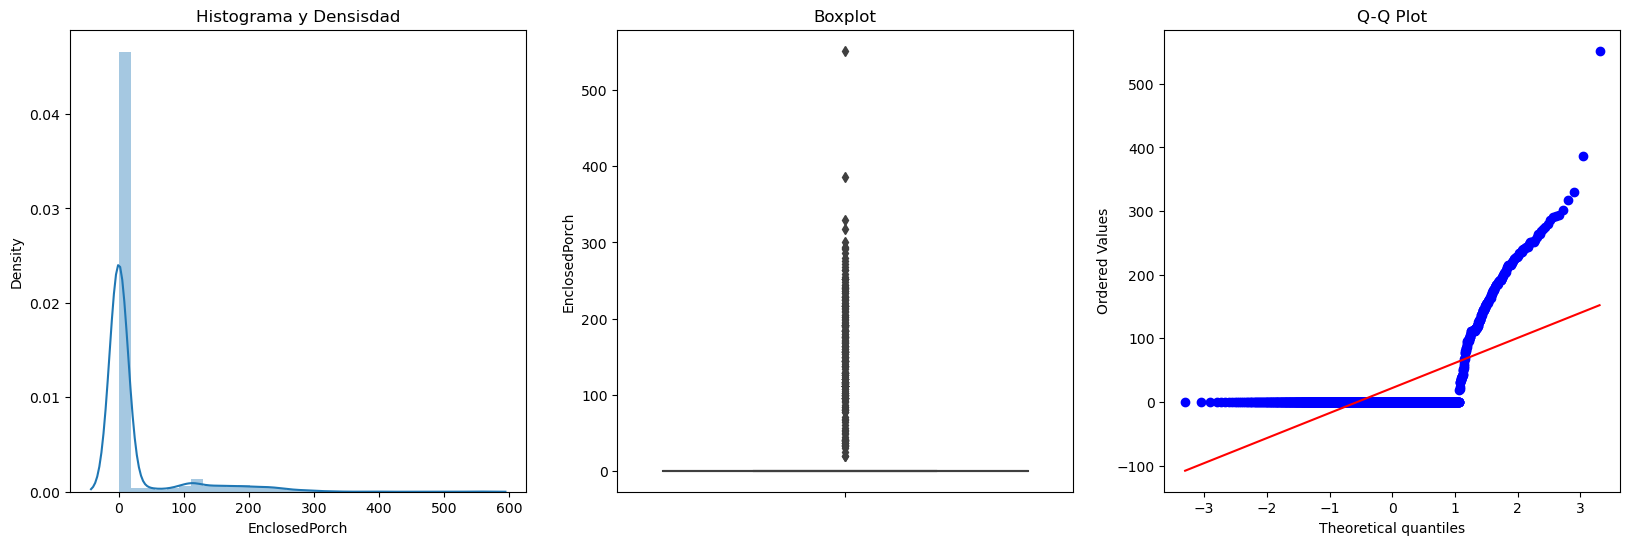

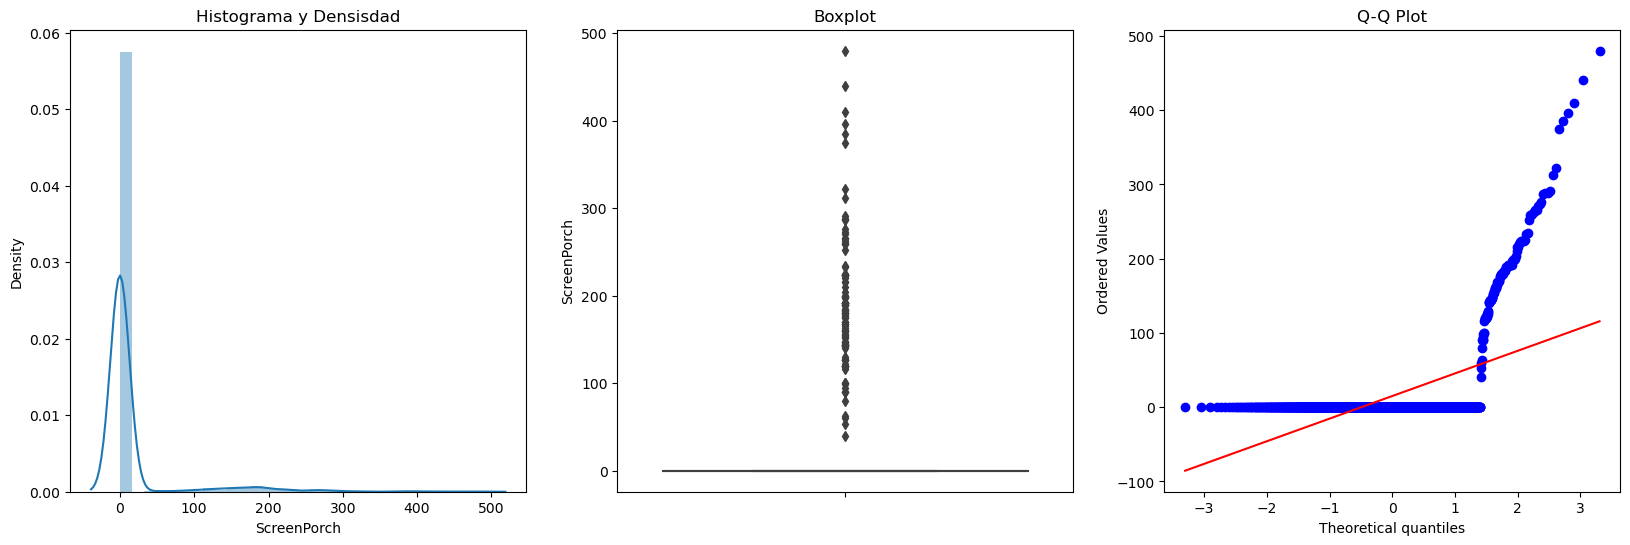

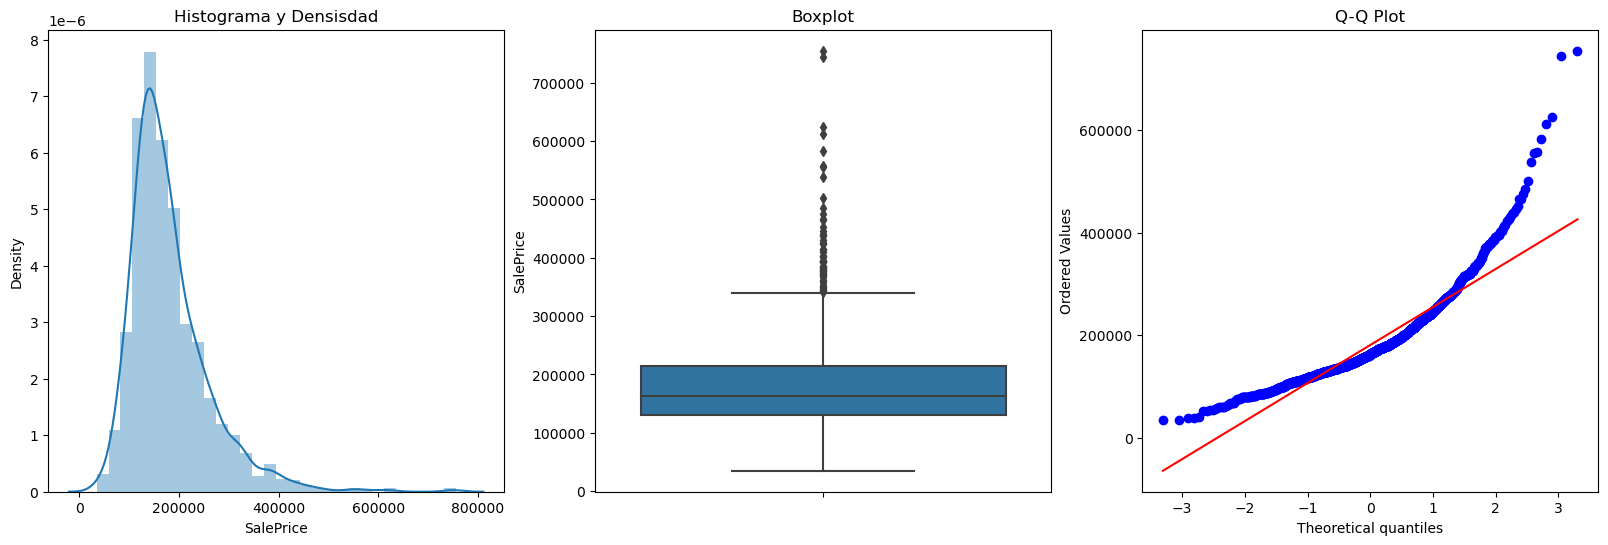

In [448]:
for col in continuas:
    plotDistBoxQQ(dataFinal, col)

In [450]:
for col in continuas:
    LI, LS = detectOutliersLimits(dataFinal, col)
    dataFinal[col] = np.where(dataFinal[col] > LS, LS,
    np.where(dataFinal[col] < LI, LI, dataFinal[col]))

C:\Users\Anthony\AppData\Local\Temp\ipykernel_9408\3224949875.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\Anthony\AppData\Local\Temp\ipykernel_9408\3224949875.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
C:\Users\Anthony\AppDa

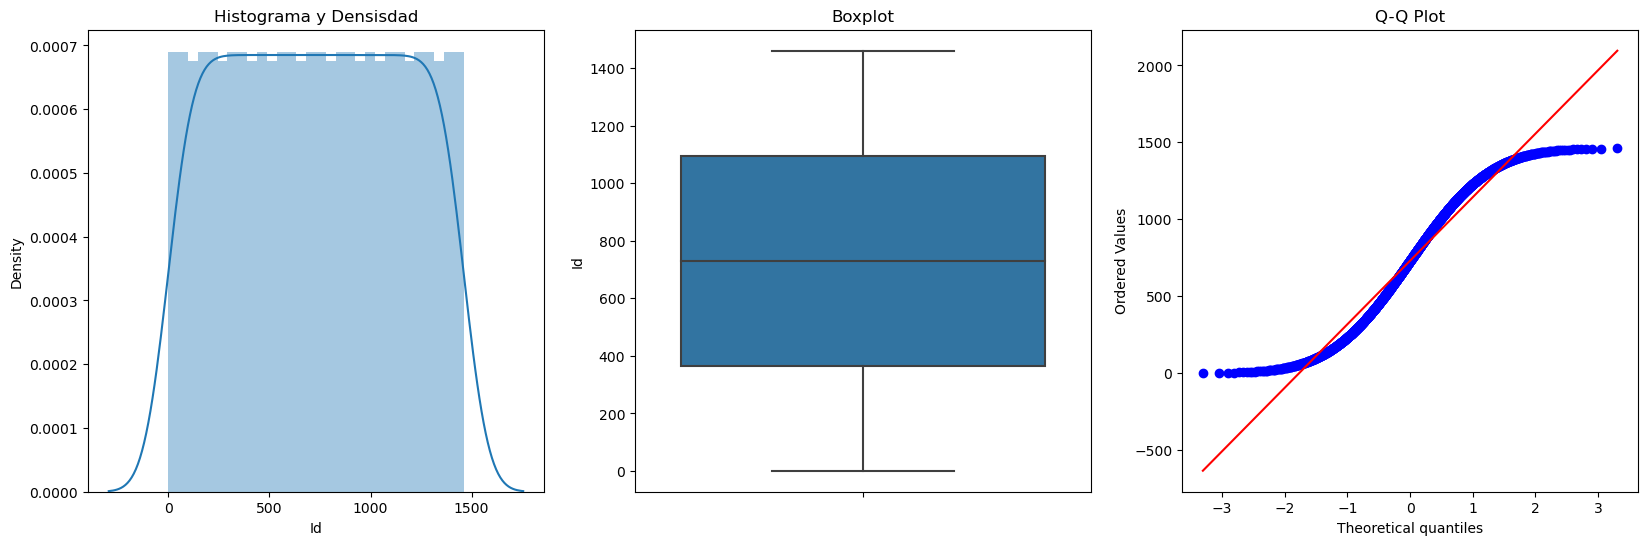

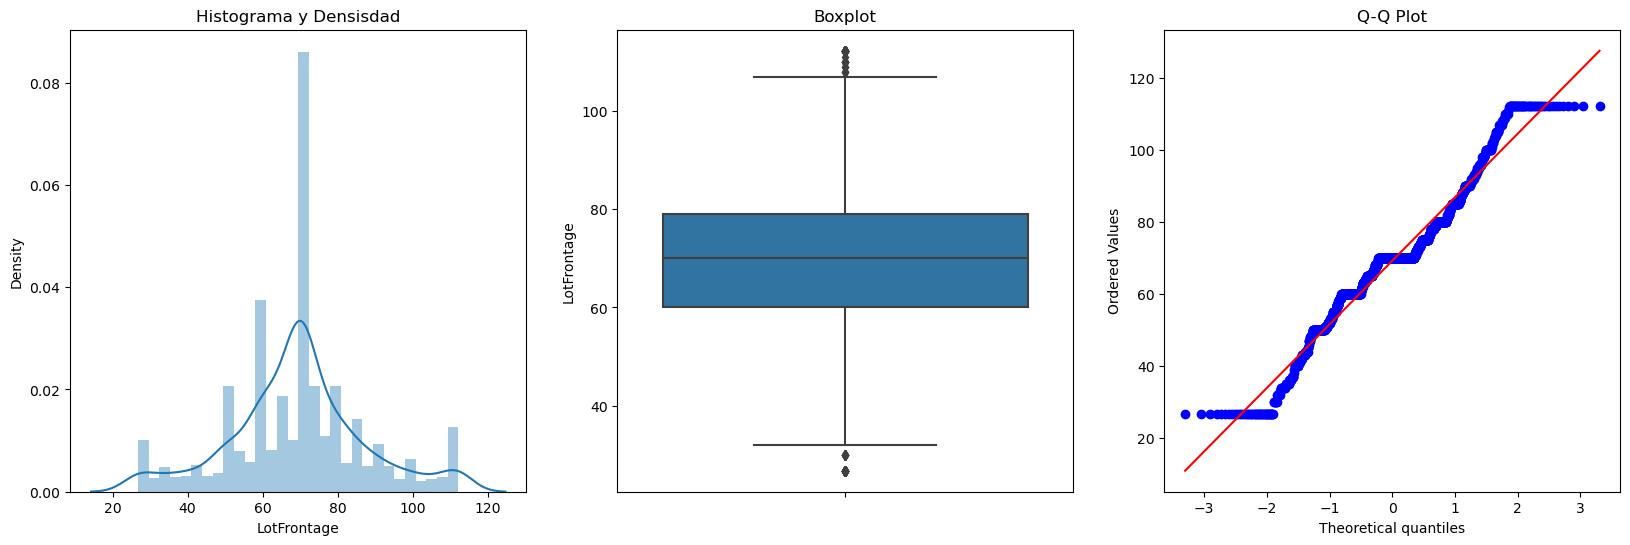

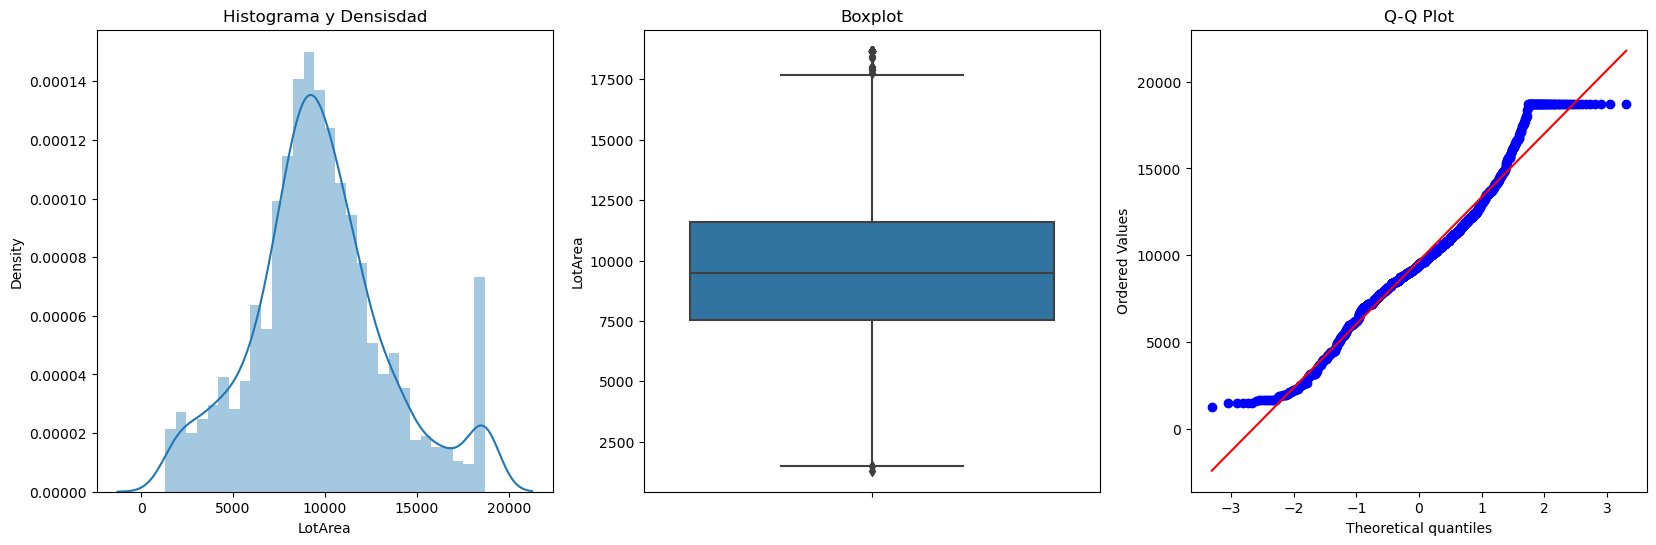

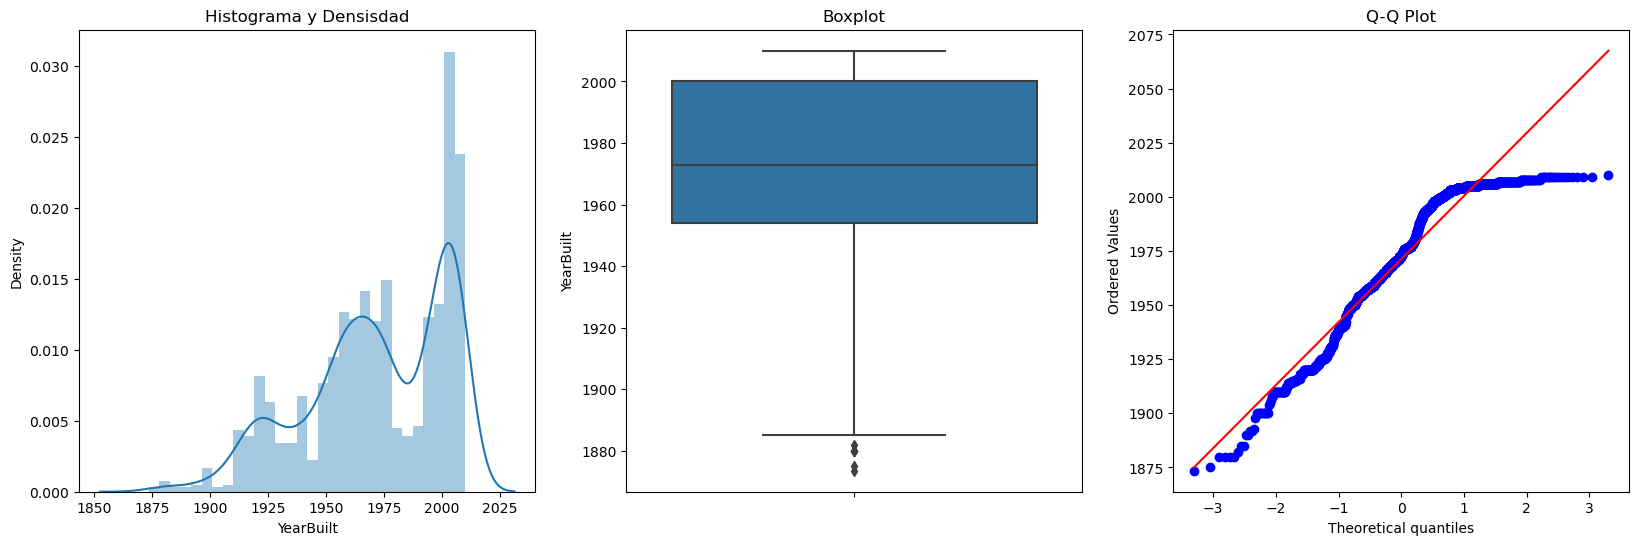

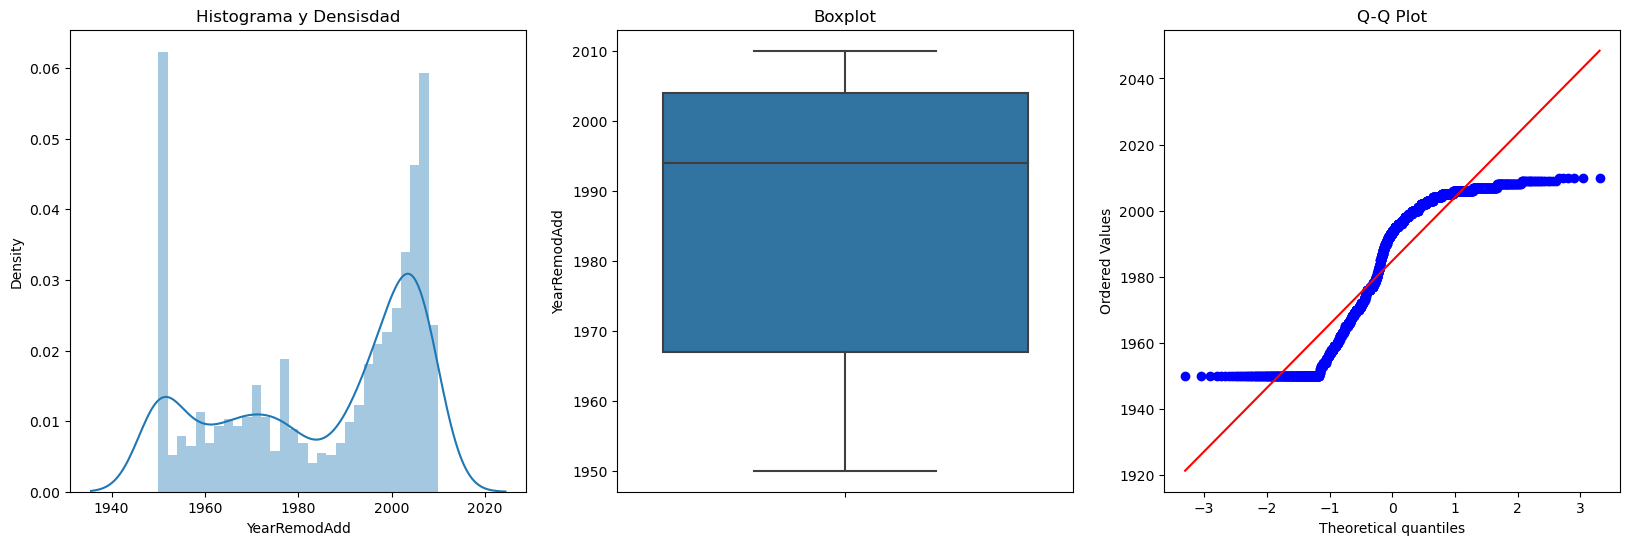

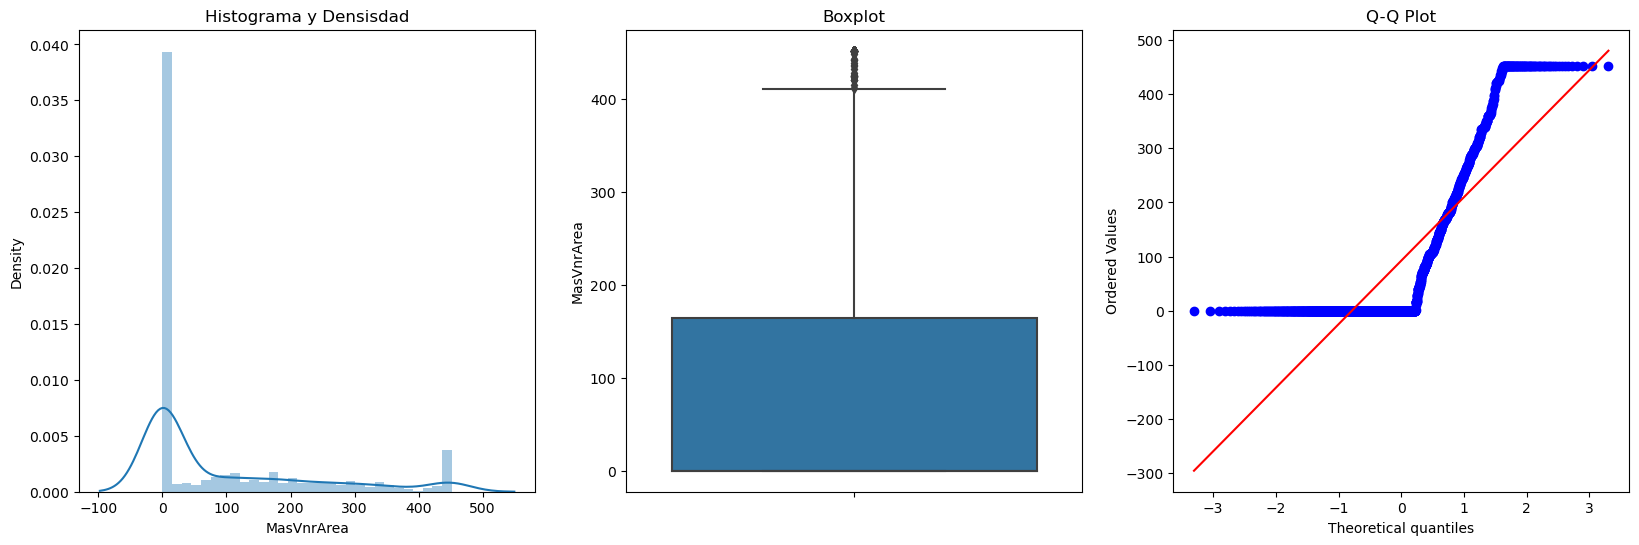

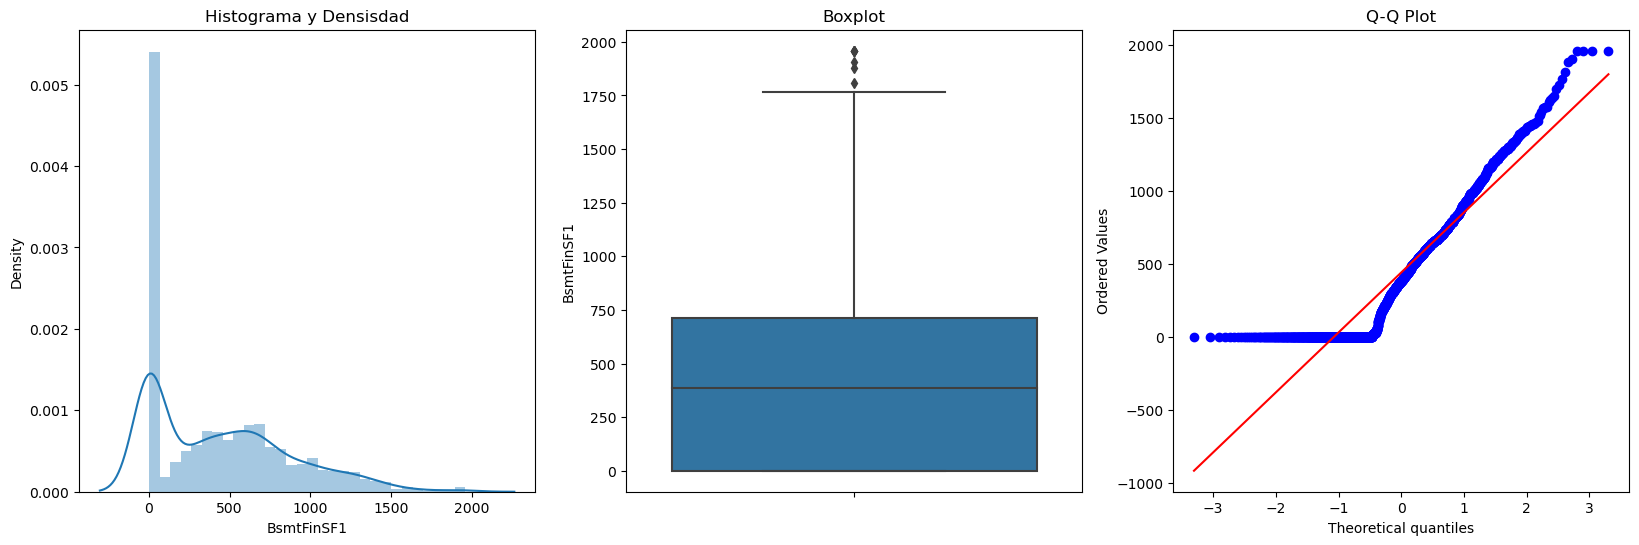

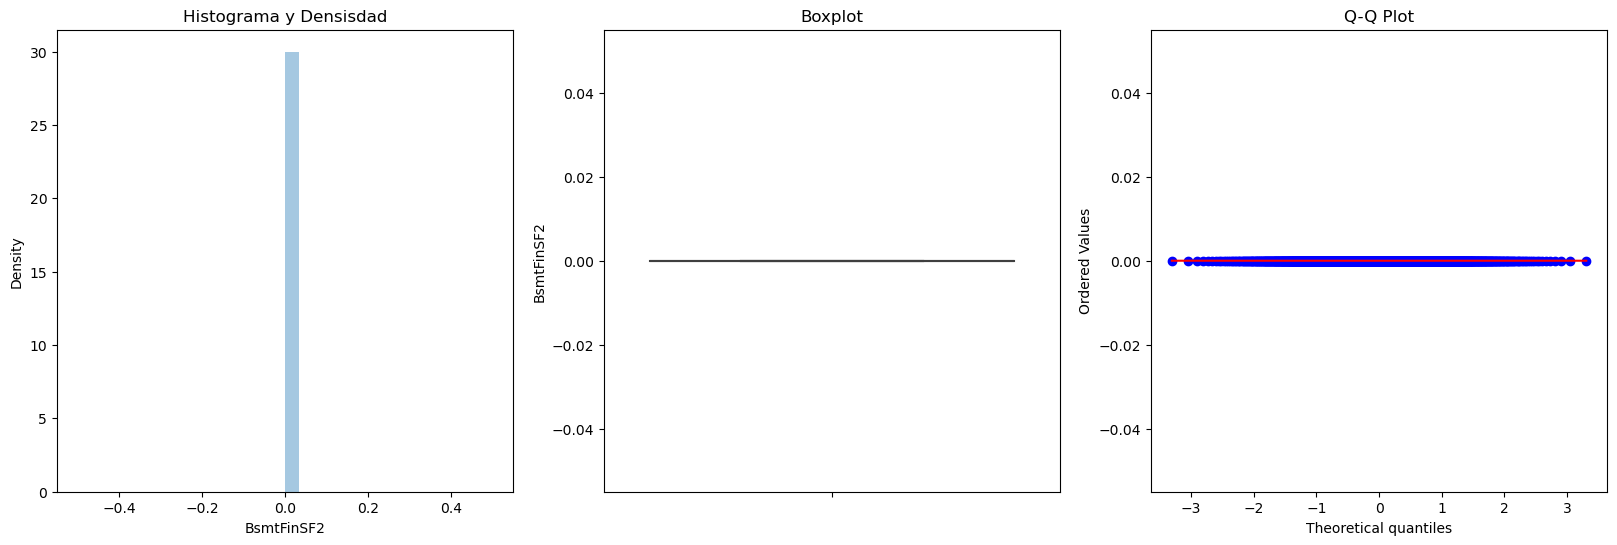

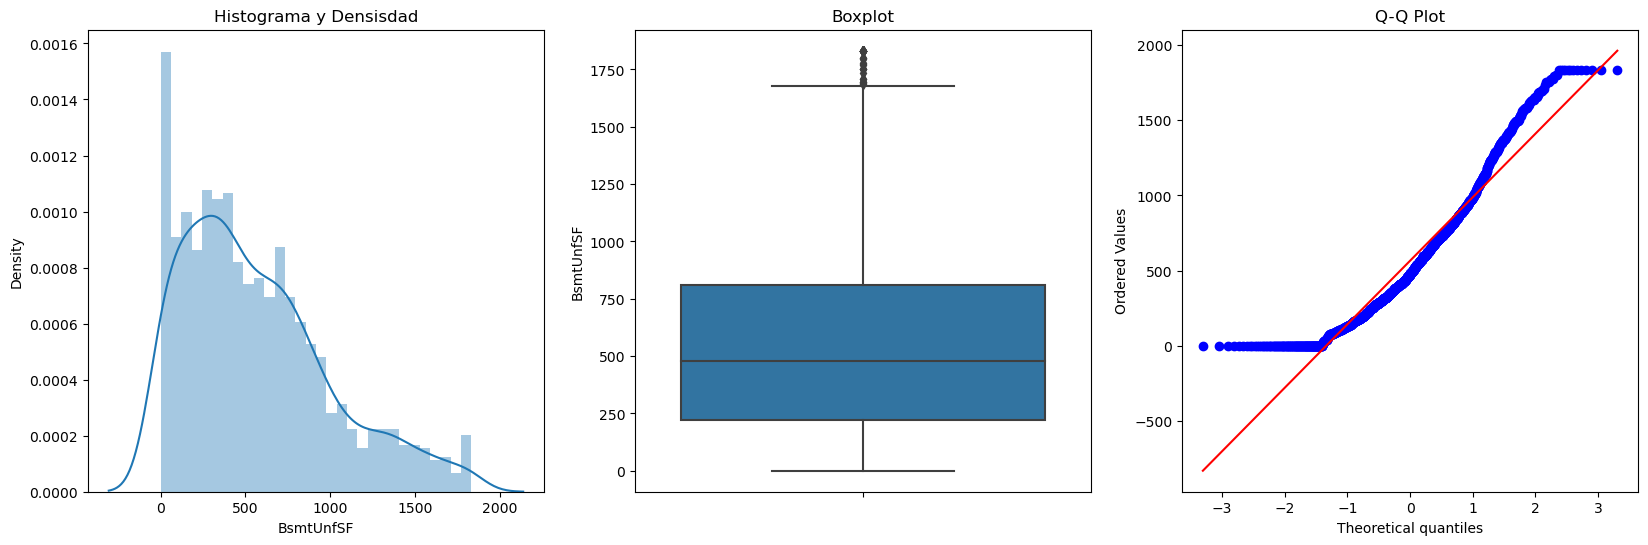

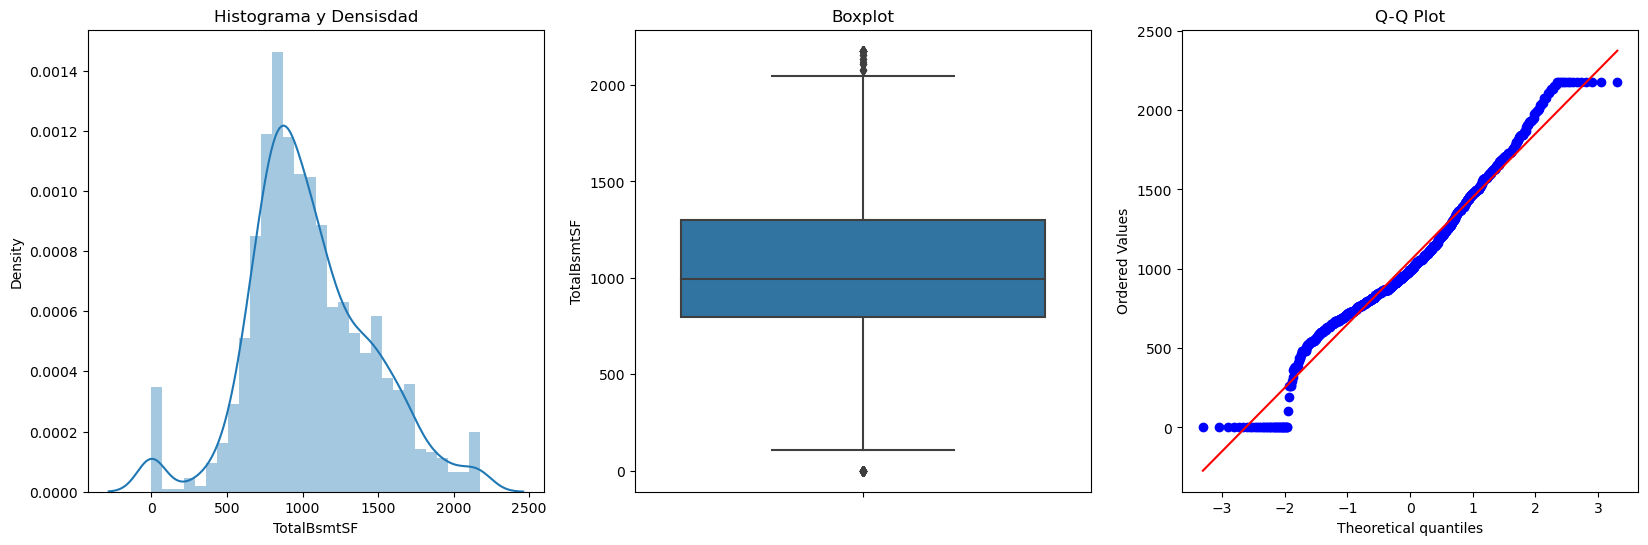

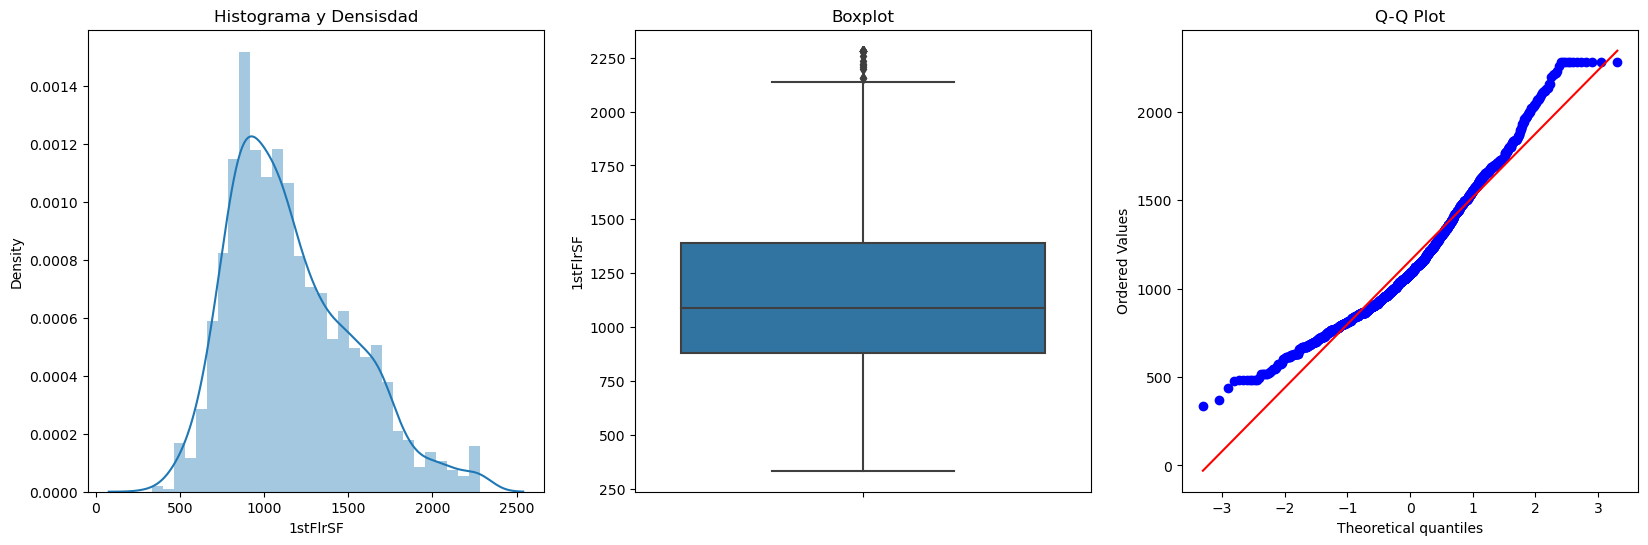

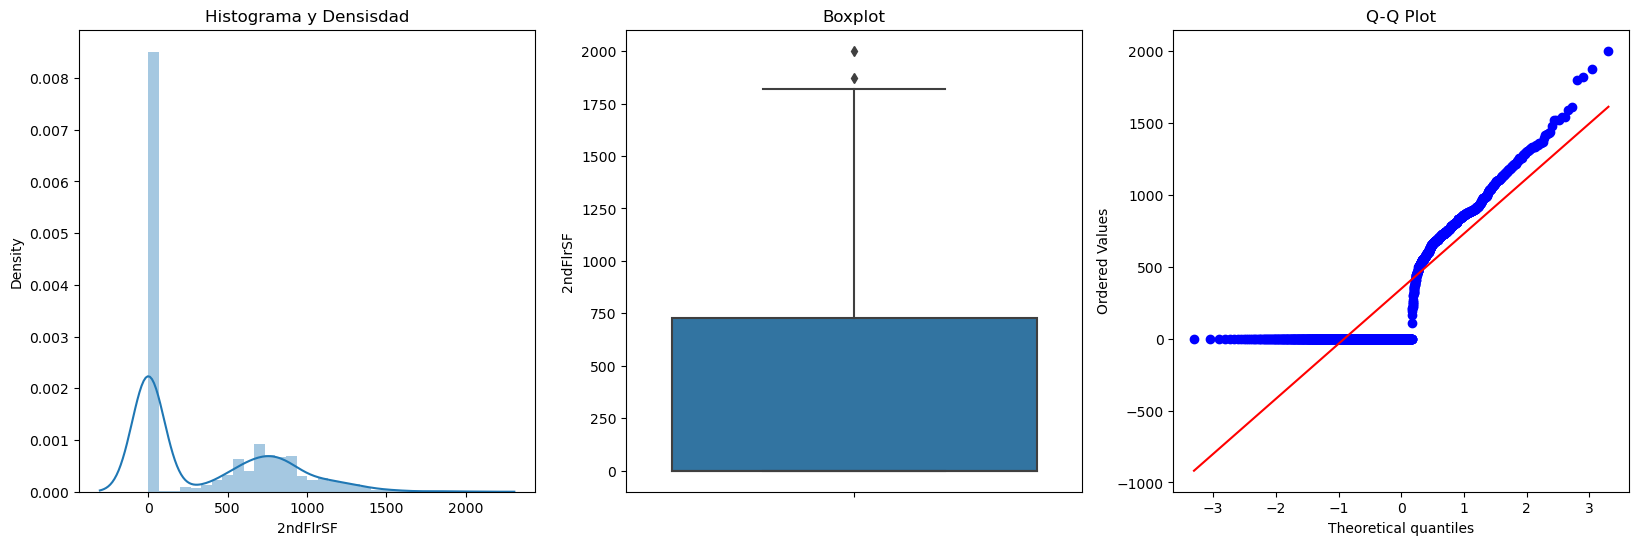

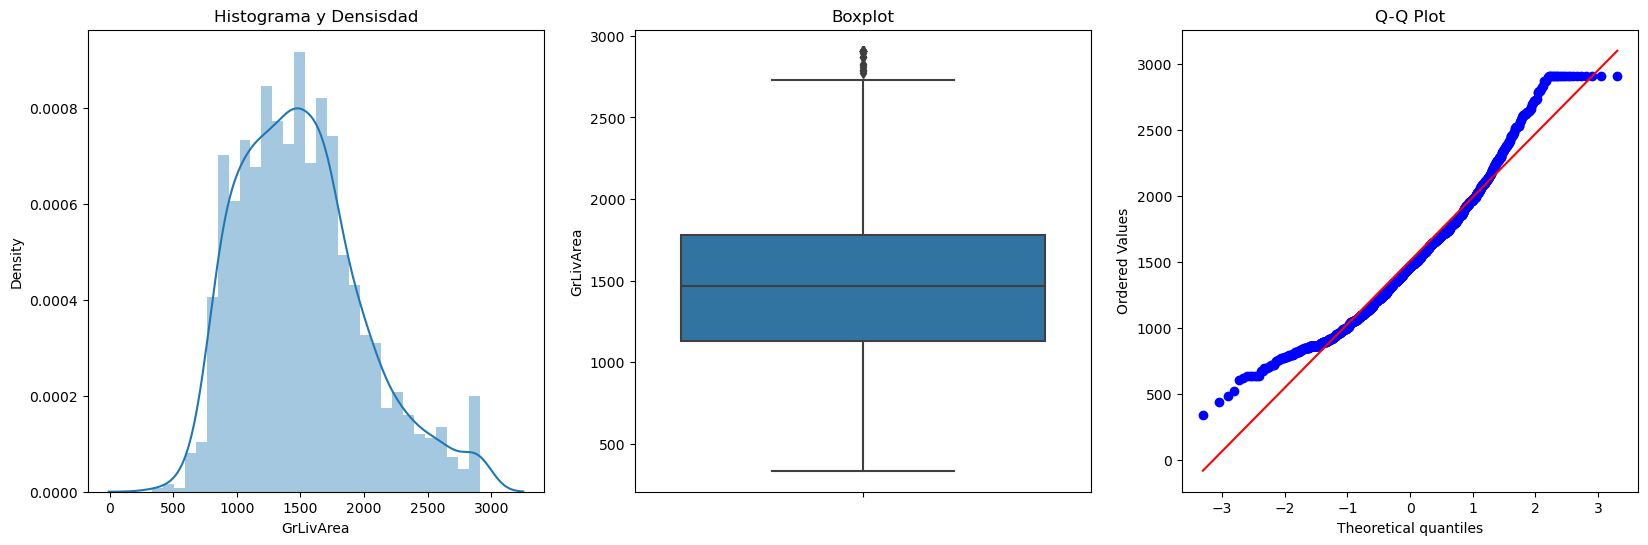

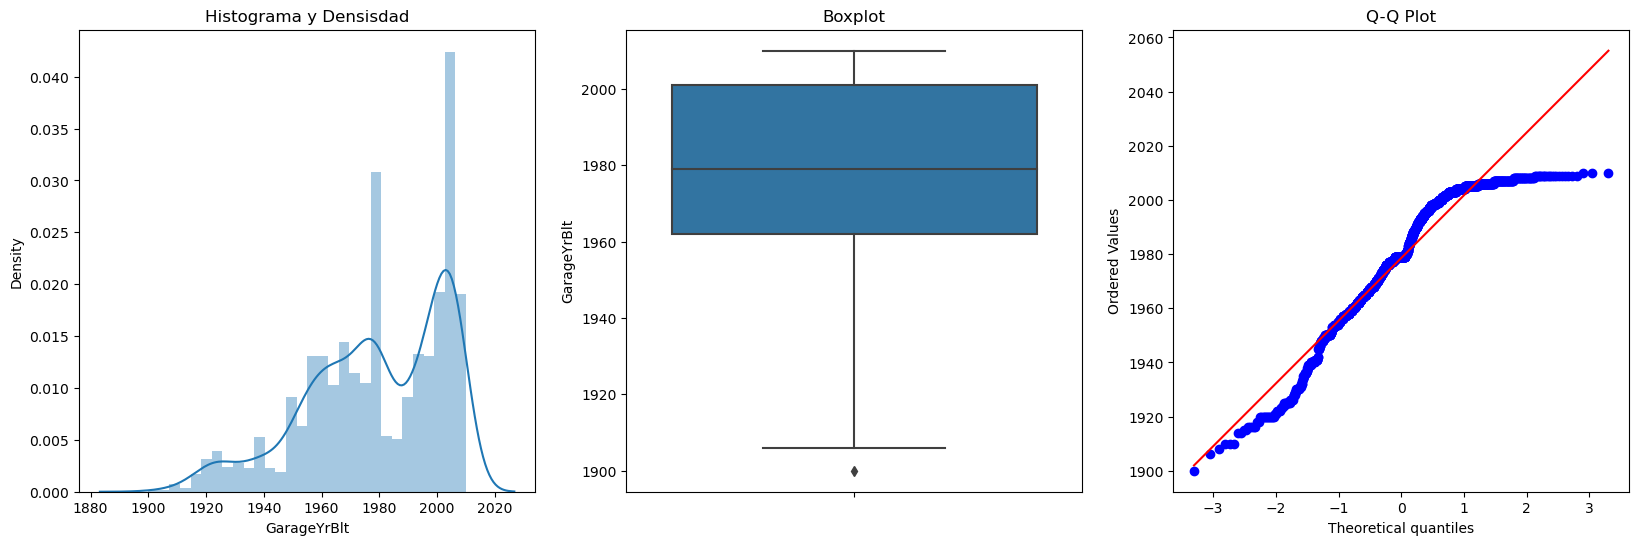

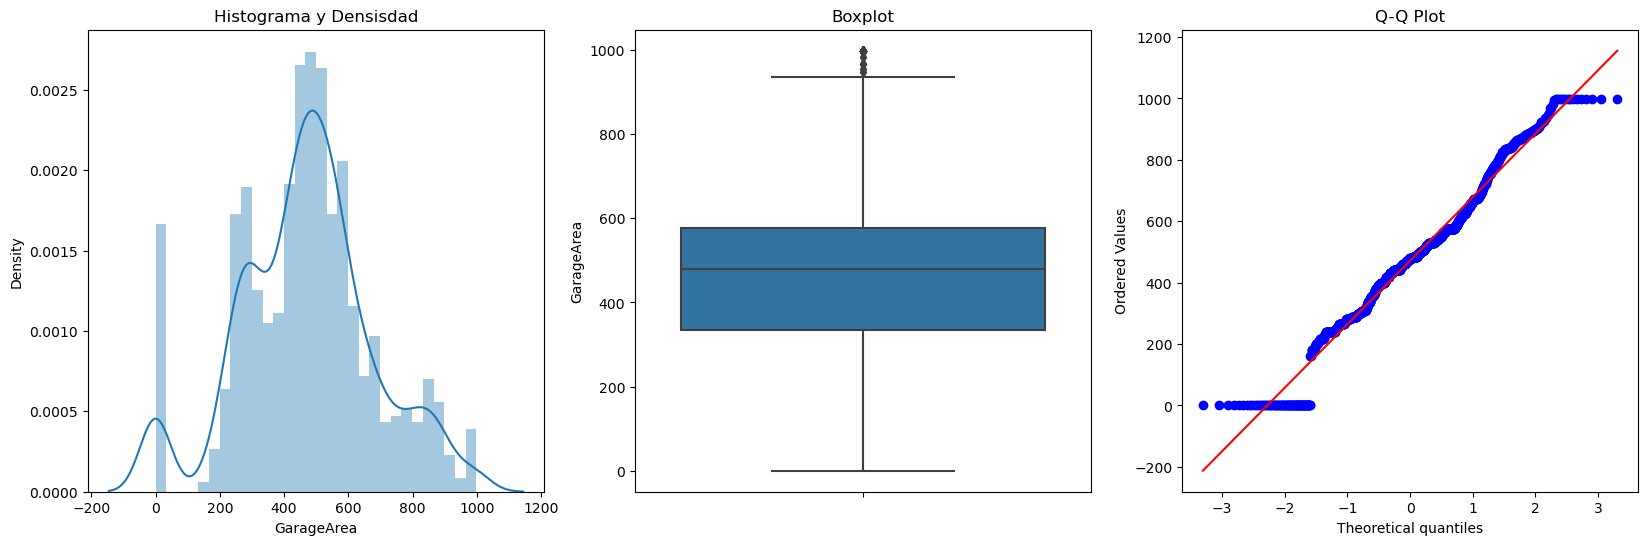

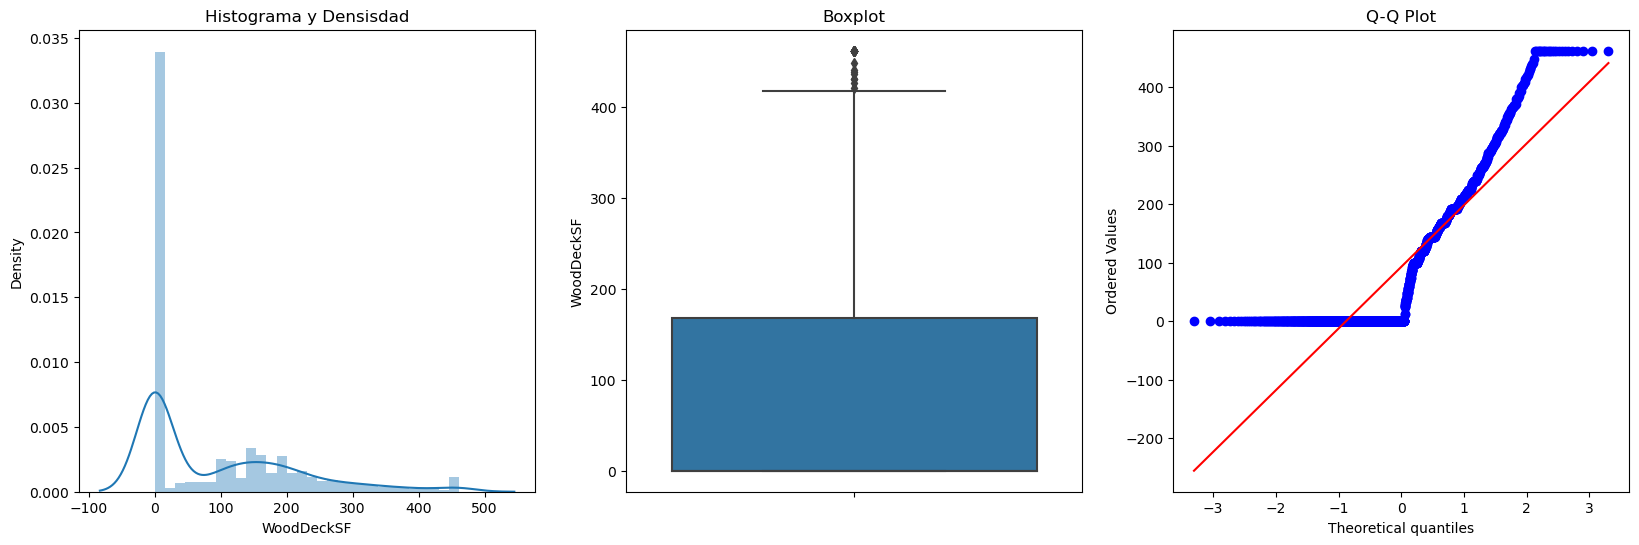

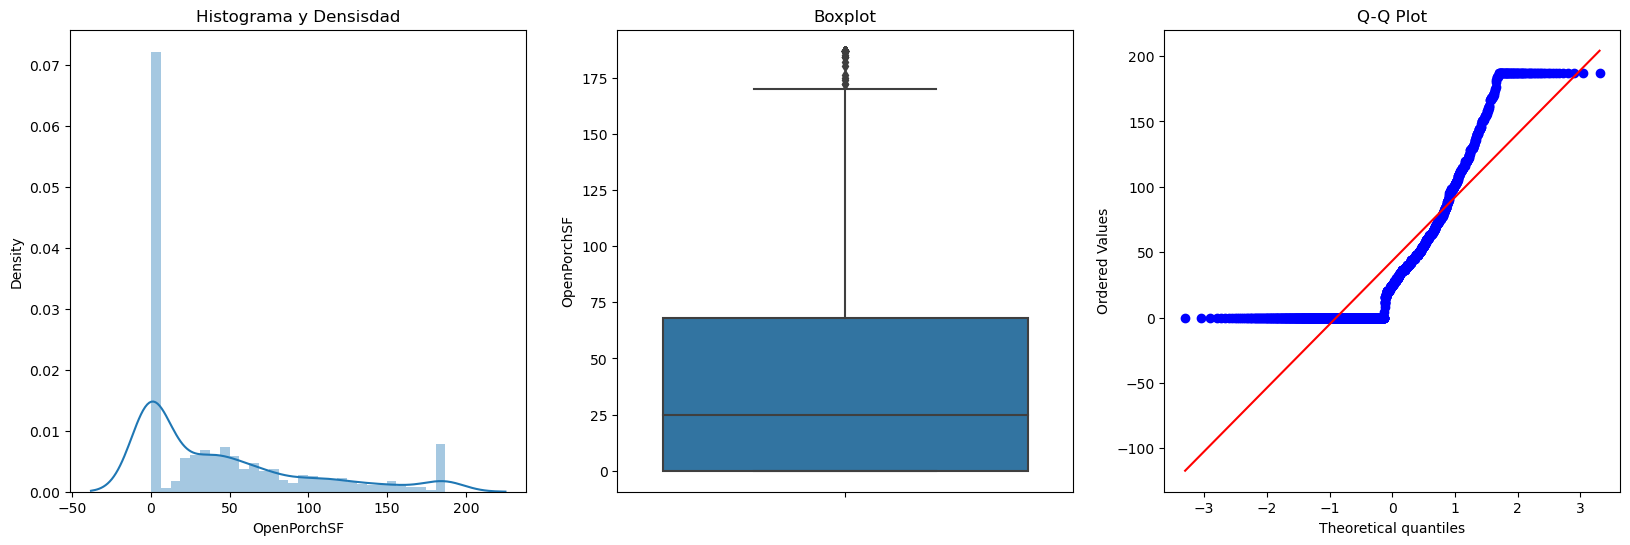

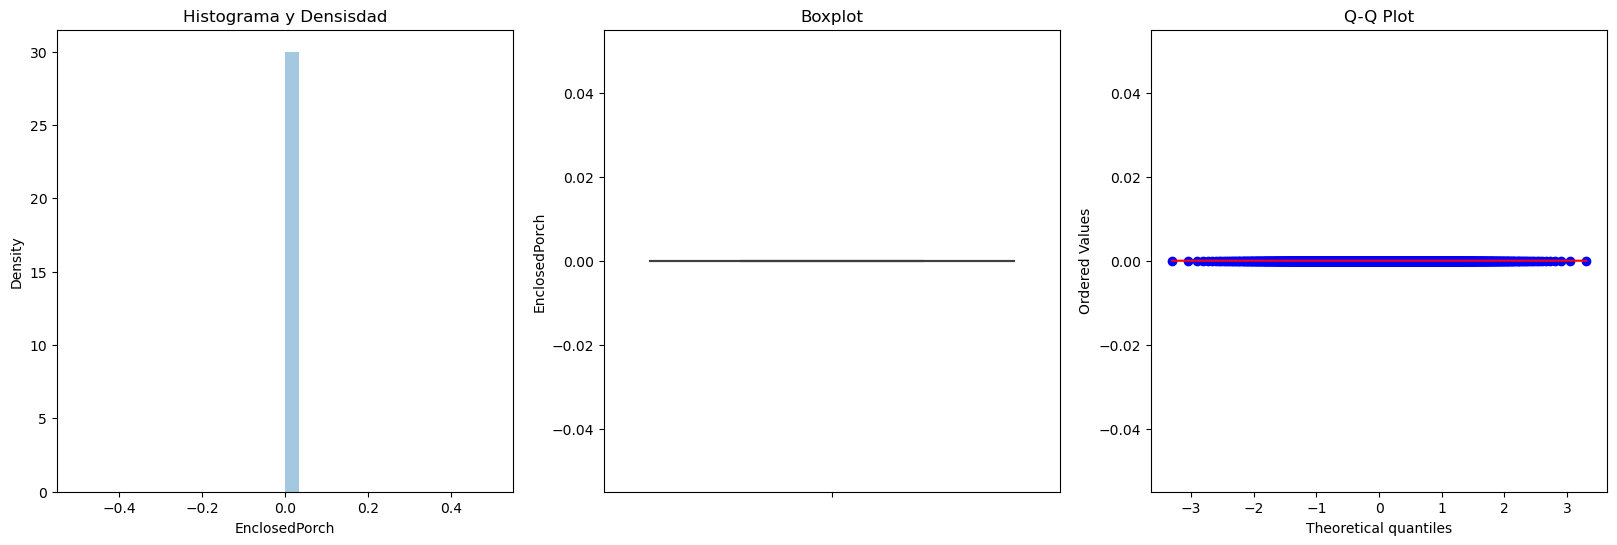

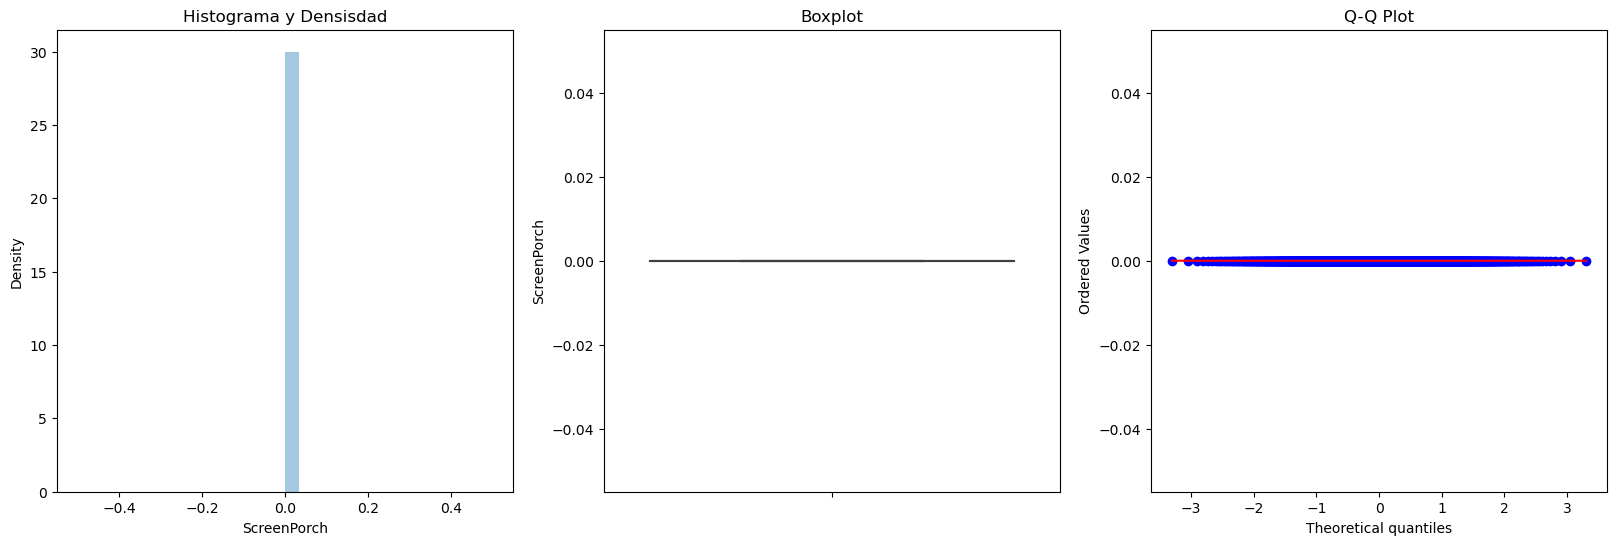

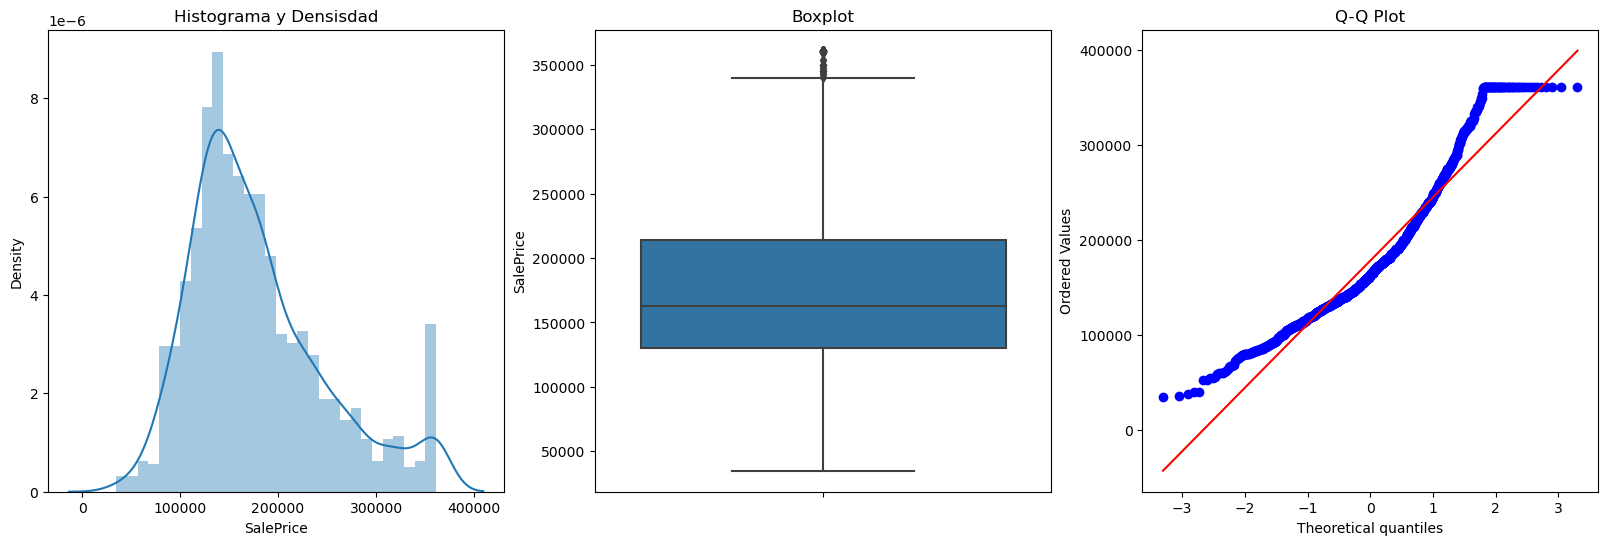

In [451]:
for col in continuas:
    plotDistBoxQQ(dataFinal, col)